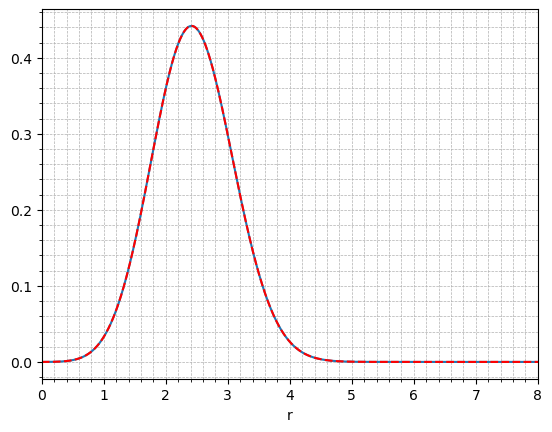

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 400                                                   # Truncation ordem

L0 = 1                                             # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r1 = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)  
r = np.flip(r1)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 2

sigma = 1

A0 = 0.09  # 0.08 -> disperses ; # 0.09-> disperses ; 

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,10,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))      


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Grades principais
plt.minorticks_on()  # Ativa grades menores
plt.show()




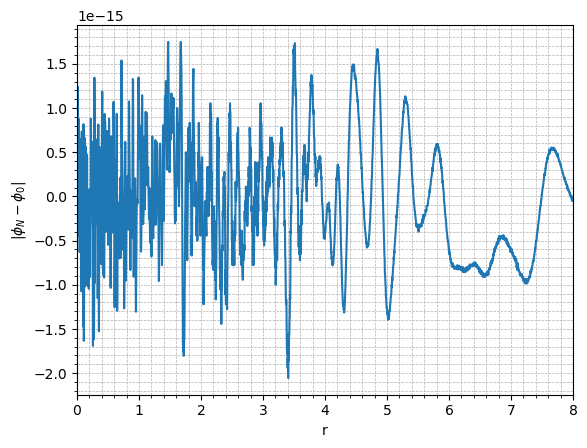

In [19]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.grid(which='both', linestyle='--', linewidth=0.5)  
plt.minorticks_on() 
plt.show()

In [20]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-18    # tolerance

n = 0
nf = 50

# Newton Raphson loop:
while n <= nf: 
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
#  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew
  n = n + 1

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


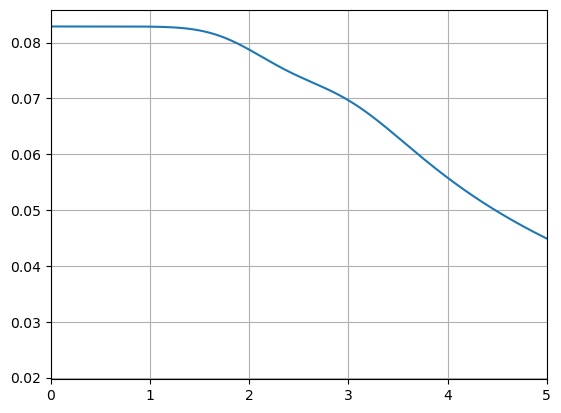

In [21]:
Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.grid()
plt.show()

In [22]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

Quadrature Integration

In [23]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  

#Alpha_0 = 1 + np.dot(al0, psi_0) 

In [24]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 10

filter1 = np.ones(N+1)
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [25]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 15

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
L2MC = []
phi_set = []
Madm_error = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)

 
while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**(1/2))    # L2 error of HC 
  
  # L2-error associated to the momentum constraint
  rqKrr = np.dot(ck0, rqSB1)  
  M = 2*rqChi*qKrr + rqKrr + 3/rq*qKrr + qPi*rqPhi*np.exp(4*qChi)
  L2MC.append((1/2*np.dot(M**2,wq_col))**1/2)    # L2 error of HC 

  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi_0)
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi_0)
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')

  # Error ADM mass:
  Madm = 2*np.dot(np.arange(1, 2*N + 2, 2), c0)
  Madm_pc = abs(Madm - M0)/M0 * 100  
  Madm_error.append(Madm_pc)  
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
    
#  if t > 9:
#    h=0.0001

  print(f't = {t}')
    
  # Evolution functions
  a0 = filter1*(a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4))
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = filter1*(c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4))  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
#  print(f'a0_max = {max(a0)}, b0_max = {max(b0)}')

out_a.close()
out_p.close() 

t1 = np.linspace(0, tf, len(Alpha_origin)) 

t = 0.0002
t = 0.0004
t = 0.0006000000000000001
t = 0.0008
t = 0.001
t = 0.0012000000000000001
t = 0.0014000000000000002
t = 0.0016000000000000003
t = 0.0018000000000000004
t = 0.0020000000000000005
t = 0.0022000000000000006
t = 0.0024000000000000007
t = 0.0026000000000000007
t = 0.002800000000000001
t = 0.003000000000000001
t = 0.003200000000000001
t = 0.003400000000000001
t = 0.003600000000000001
t = 0.0038000000000000013
t = 0.004000000000000001
t = 0.004200000000000001
t = 0.0044
t = 0.0046
t = 0.0048
t = 0.004999999999999999
t = 0.005199999999999999
t = 0.0053999999999999986
t = 0.005599999999999998
t = 0.005799999999999998
t = 0.0059999999999999975
t = 0.006199999999999997
t = 0.006399999999999997
t = 0.0065999999999999965
t = 0.006799999999999996
t = 0.006999999999999996
t = 0.0071999999999999955
t = 0.007399999999999995
t = 0.007599999999999995
t = 0.0077999999999999944
t = 0.007999999999999995
t = 0.008199999999999995
t = 0.008399999999999996
t = 0.008599999999999997
t = 0.008

t = 0.06919999999999993
t = 0.06939999999999993
t = 0.06959999999999994
t = 0.06979999999999995
t = 0.06999999999999995
t = 0.07019999999999996
t = 0.07039999999999996
t = 0.07059999999999997
t = 0.07079999999999997
t = 0.07099999999999998
t = 0.07119999999999999
t = 0.07139999999999999
t = 0.0716
t = 0.0718
t = 0.07200000000000001
t = 0.07220000000000001
t = 0.07240000000000002
t = 0.07260000000000003
t = 0.07280000000000003
t = 0.07300000000000004
t = 0.07320000000000004
t = 0.07340000000000005
t = 0.07360000000000005
t = 0.07380000000000006
t = 0.07400000000000007
t = 0.07420000000000007
t = 0.07440000000000008
t = 0.07460000000000008
t = 0.07480000000000009
t = 0.0750000000000001
t = 0.0752000000000001
t = 0.0754000000000001
t = 0.07560000000000011
t = 0.07580000000000012
t = 0.07600000000000012
t = 0.07620000000000013
t = 0.07640000000000013
t = 0.07660000000000014
t = 0.07680000000000015
t = 0.07700000000000015
t = 0.07720000000000016
t = 0.07740000000000016
t = 0.077600000000000

t = 0.13940000000000194
t = 0.13960000000000194
t = 0.13980000000000195
t = 0.14000000000000196
t = 0.14020000000000196
t = 0.14040000000000197
t = 0.14060000000000197
t = 0.14080000000000198
t = 0.14100000000000198
t = 0.141200000000002
t = 0.141400000000002
t = 0.141600000000002
t = 0.141800000000002
t = 0.142000000000002
t = 0.14220000000000202
t = 0.14240000000000202
t = 0.14260000000000203
t = 0.14280000000000204
t = 0.14300000000000204
t = 0.14320000000000205
t = 0.14340000000000205
t = 0.14360000000000206
t = 0.14380000000000207
t = 0.14400000000000207
t = 0.14420000000000208
t = 0.14440000000000208
t = 0.1446000000000021
t = 0.1448000000000021
t = 0.1450000000000021
t = 0.1452000000000021
t = 0.1454000000000021
t = 0.14560000000000212
t = 0.14580000000000212
t = 0.14600000000000213
t = 0.14620000000000213
t = 0.14640000000000214
t = 0.14660000000000215
t = 0.14680000000000215
t = 0.14700000000000216
t = 0.14720000000000216
t = 0.14740000000000217
t = 0.14760000000000217
t = 0.1

t = 0.20980000000000396
t = 0.21000000000000396
t = 0.21020000000000397
t = 0.21040000000000397
t = 0.21060000000000398
t = 0.21080000000000398
t = 0.211000000000004
t = 0.211200000000004
t = 0.211400000000004
t = 0.211600000000004
t = 0.211800000000004
t = 0.21200000000000402
t = 0.21220000000000402
t = 0.21240000000000403
t = 0.21260000000000404
t = 0.21280000000000404
t = 0.21300000000000405
t = 0.21320000000000405
t = 0.21340000000000406
t = 0.21360000000000406
t = 0.21380000000000407
t = 0.21400000000000408
t = 0.21420000000000408
t = 0.2144000000000041
t = 0.2146000000000041
t = 0.2148000000000041
t = 0.2150000000000041
t = 0.2152000000000041
t = 0.21540000000000412
t = 0.21560000000000412
t = 0.21580000000000413
t = 0.21600000000000413
t = 0.21620000000000414
t = 0.21640000000000414
t = 0.21660000000000415
t = 0.21680000000000416
t = 0.21700000000000416
t = 0.21720000000000417
t = 0.21740000000000417
t = 0.21760000000000418
t = 0.21780000000000418
t = 0.2180000000000042
t = 0.21

t = 0.28040000000000176
t = 0.28060000000000174
t = 0.2808000000000017
t = 0.2810000000000017
t = 0.28120000000000167
t = 0.28140000000000165
t = 0.2816000000000016
t = 0.2818000000000016
t = 0.2820000000000016
t = 0.28220000000000156
t = 0.28240000000000154
t = 0.2826000000000015
t = 0.2828000000000015
t = 0.2830000000000015
t = 0.28320000000000145
t = 0.28340000000000143
t = 0.2836000000000014
t = 0.2838000000000014
t = 0.28400000000000136
t = 0.28420000000000134
t = 0.2844000000000013
t = 0.2846000000000013
t = 0.2848000000000013
t = 0.28500000000000125
t = 0.28520000000000123
t = 0.2854000000000012
t = 0.2856000000000012
t = 0.28580000000000116
t = 0.28600000000000114
t = 0.2862000000000011
t = 0.2864000000000011
t = 0.2866000000000011
t = 0.28680000000000105
t = 0.28700000000000103
t = 0.287200000000001
t = 0.287400000000001
t = 0.28760000000000097
t = 0.28780000000000094
t = 0.2880000000000009
t = 0.2882000000000009
t = 0.2884000000000009
t = 0.28860000000000086
t = 0.28880000000

t = 0.3517999999999939
t = 0.3519999999999939
t = 0.35219999999999385
t = 0.35239999999999383
t = 0.3525999999999938
t = 0.3527999999999938
t = 0.35299999999999376
t = 0.35319999999999374
t = 0.3533999999999937
t = 0.3535999999999937
t = 0.3537999999999937
t = 0.35399999999999365
t = 0.35419999999999363
t = 0.3543999999999936
t = 0.3545999999999936
t = 0.35479999999999356
t = 0.35499999999999354
t = 0.3551999999999935
t = 0.3553999999999935
t = 0.3555999999999935
t = 0.35579999999999345
t = 0.35599999999999343
t = 0.3561999999999934
t = 0.3563999999999934
t = 0.35659999999999337
t = 0.35679999999999334
t = 0.3569999999999933
t = 0.3571999999999933
t = 0.3573999999999933
t = 0.35759999999999326
t = 0.35779999999999323
t = 0.3579999999999932
t = 0.3581999999999932
t = 0.35839999999999317
t = 0.35859999999999315
t = 0.3587999999999931
t = 0.3589999999999931
t = 0.3591999999999931
t = 0.35939999999999306
t = 0.35959999999999304
t = 0.359799999999993
t = 0.359999999999993
t = 0.360199999999

t = 0.4227999999999861
t = 0.42299999999998605
t = 0.42319999999998603
t = 0.423399999999986
t = 0.423599999999986
t = 0.42379999999998597
t = 0.42399999999998594
t = 0.4241999999999859
t = 0.4243999999999859
t = 0.4245999999999859
t = 0.42479999999998586
t = 0.42499999999998583
t = 0.4251999999999858
t = 0.4253999999999858
t = 0.42559999999998577
t = 0.42579999999998575
t = 0.4259999999999857
t = 0.4261999999999857
t = 0.4263999999999857
t = 0.42659999999998566
t = 0.42679999999998564
t = 0.4269999999999856
t = 0.4271999999999856
t = 0.42739999999998557
t = 0.42759999999998555
t = 0.4277999999999855
t = 0.4279999999999855
t = 0.4281999999999855
t = 0.42839999999998546
t = 0.42859999999998544
t = 0.4287999999999854
t = 0.4289999999999854
t = 0.42919999999998537
t = 0.42939999999998535
t = 0.4295999999999853
t = 0.4297999999999853
t = 0.4299999999999853
t = 0.43019999999998526
t = 0.43039999999998524
t = 0.4305999999999852
t = 0.4307999999999852
t = 0.4309999999999852
t = 0.431199999999

t = 0.4943999999999782
t = 0.49459999999997817
t = 0.49479999999997815
t = 0.4949999999999781
t = 0.4951999999999781
t = 0.4953999999999781
t = 0.49559999999997806
t = 0.49579999999997804
t = 0.495999999999978
t = 0.496199999999978
t = 0.49639999999997797
t = 0.49659999999997795
t = 0.4967999999999779
t = 0.4969999999999779
t = 0.4971999999999779
t = 0.49739999999997786
t = 0.49759999999997784
t = 0.4977999999999778
t = 0.4979999999999778
t = 0.49819999999997777
t = 0.49839999999997775
t = 0.4985999999999777
t = 0.4987999999999777
t = 0.4989999999999777
t = 0.49919999999997766
t = 0.49939999999997764
t = 0.4995999999999776
t = 0.4997999999999776
t = 0.4999999999999776
t = 0.5001999999999776
t = 0.5003999999999775
t = 0.5005999999999775
t = 0.5007999999999775
t = 0.5009999999999775
t = 0.5011999999999774
t = 0.5013999999999774
t = 0.5015999999999774
t = 0.5017999999999774
t = 0.5019999999999774
t = 0.5021999999999773
t = 0.5023999999999773
t = 0.5025999999999773
t = 0.5027999999999773
t

t = 0.5663999999999703
t = 0.5665999999999702
t = 0.5667999999999702
t = 0.5669999999999702
t = 0.5671999999999702
t = 0.5673999999999702
t = 0.5675999999999701
t = 0.5677999999999701
t = 0.5679999999999701
t = 0.5681999999999701
t = 0.56839999999997
t = 0.56859999999997
t = 0.56879999999997
t = 0.56899999999997
t = 0.56919999999997
t = 0.5693999999999699
t = 0.5695999999999699
t = 0.5697999999999699
t = 0.5699999999999699
t = 0.5701999999999698
t = 0.5703999999999698
t = 0.5705999999999698
t = 0.5707999999999698
t = 0.5709999999999698
t = 0.5711999999999697
t = 0.5713999999999697
t = 0.5715999999999697
t = 0.5717999999999697
t = 0.5719999999999696
t = 0.5721999999999696
t = 0.5723999999999696
t = 0.5725999999999696
t = 0.5727999999999696
t = 0.5729999999999695
t = 0.5731999999999695
t = 0.5733999999999695
t = 0.5735999999999695
t = 0.5737999999999694
t = 0.5739999999999694
t = 0.5741999999999694
t = 0.5743999999999694
t = 0.5745999999999694
t = 0.5747999999999693
t = 0.574999999999969

t = 0.6381999999999624
t = 0.6383999999999623
t = 0.6385999999999623
t = 0.6387999999999623
t = 0.6389999999999623
t = 0.6391999999999622
t = 0.6393999999999622
t = 0.6395999999999622
t = 0.6397999999999622
t = 0.6399999999999622
t = 0.6401999999999621
t = 0.6403999999999621
t = 0.6405999999999621
t = 0.6407999999999621
t = 0.640999999999962
t = 0.641199999999962
t = 0.641399999999962
t = 0.641599999999962
t = 0.641799999999962
t = 0.6419999999999619
t = 0.6421999999999619
t = 0.6423999999999619
t = 0.6425999999999619
t = 0.6427999999999618
t = 0.6429999999999618
t = 0.6431999999999618
t = 0.6433999999999618
t = 0.6435999999999618
t = 0.6437999999999617
t = 0.6439999999999617
t = 0.6441999999999617
t = 0.6443999999999617
t = 0.6445999999999616
t = 0.6447999999999616
t = 0.6449999999999616
t = 0.6451999999999616
t = 0.6453999999999616
t = 0.6455999999999615
t = 0.6457999999999615
t = 0.6459999999999615
t = 0.6461999999999615
t = 0.6463999999999614
t = 0.6465999999999614
t = 0.6467999999

t = 0.7103999999999544
t = 0.7105999999999544
t = 0.7107999999999544
t = 0.7109999999999543
t = 0.7111999999999543
t = 0.7113999999999543
t = 0.7115999999999543
t = 0.7117999999999542
t = 0.7119999999999542
t = 0.7121999999999542
t = 0.7123999999999542
t = 0.7125999999999542
t = 0.7127999999999541
t = 0.7129999999999541
t = 0.7131999999999541
t = 0.7133999999999541
t = 0.713599999999954
t = 0.713799999999954
t = 0.713999999999954
t = 0.714199999999954
t = 0.714399999999954
t = 0.7145999999999539
t = 0.7147999999999539
t = 0.7149999999999539
t = 0.7151999999999539
t = 0.7153999999999539
t = 0.7155999999999538
t = 0.7157999999999538
t = 0.7159999999999538
t = 0.7161999999999538
t = 0.7163999999999537
t = 0.7165999999999537
t = 0.7167999999999537
t = 0.7169999999999537
t = 0.7171999999999537
t = 0.7173999999999536
t = 0.7175999999999536
t = 0.7177999999999536
t = 0.7179999999999536
t = 0.7181999999999535
t = 0.7183999999999535
t = 0.7185999999999535
t = 0.7187999999999535
t = 0.7189999999

t = 0.7821999999999465
t = 0.7823999999999465
t = 0.7825999999999464
t = 0.7827999999999464
t = 0.7829999999999464
t = 0.7831999999999464
t = 0.7833999999999464
t = 0.7835999999999463
t = 0.7837999999999463
t = 0.7839999999999463
t = 0.7841999999999463
t = 0.7843999999999463
t = 0.7845999999999462
t = 0.7847999999999462
t = 0.7849999999999462
t = 0.7851999999999462
t = 0.7853999999999461
t = 0.7855999999999461
t = 0.7857999999999461
t = 0.7859999999999461
t = 0.786199999999946
t = 0.786399999999946
t = 0.786599999999946
t = 0.786799999999946
t = 0.786999999999946
t = 0.7871999999999459
t = 0.7873999999999459
t = 0.7875999999999459
t = 0.7877999999999459
t = 0.7879999999999459
t = 0.7881999999999458
t = 0.7883999999999458
t = 0.7885999999999458
t = 0.7887999999999458
t = 0.7889999999999457
t = 0.7891999999999457
t = 0.7893999999999457
t = 0.7895999999999457
t = 0.7897999999999457
t = 0.7899999999999456
t = 0.7901999999999456
t = 0.7903999999999456
t = 0.7905999999999456
t = 0.7907999999

t = 0.8539999999999386
t = 0.8541999999999386
t = 0.8543999999999385
t = 0.8545999999999385
t = 0.8547999999999385
t = 0.8549999999999385
t = 0.8551999999999385
t = 0.8553999999999384
t = 0.8555999999999384
t = 0.8557999999999384
t = 0.8559999999999384
t = 0.8561999999999383
t = 0.8563999999999383
t = 0.8565999999999383
t = 0.8567999999999383
t = 0.8569999999999383
t = 0.8571999999999382
t = 0.8573999999999382
t = 0.8575999999999382
t = 0.8577999999999382
t = 0.8579999999999381
t = 0.8581999999999381
t = 0.8583999999999381
t = 0.8585999999999381
t = 0.8587999999999381
t = 0.858999999999938
t = 0.859199999999938
t = 0.859399999999938
t = 0.859599999999938
t = 0.859799999999938
t = 0.8599999999999379
t = 0.8601999999999379
t = 0.8603999999999379
t = 0.8605999999999379
t = 0.8607999999999378
t = 0.8609999999999378
t = 0.8611999999999378
t = 0.8613999999999378
t = 0.8615999999999377
t = 0.8617999999999377
t = 0.8619999999999377
t = 0.8621999999999377
t = 0.8623999999999377
t = 0.8625999999

t = 0.9259999999999307
t = 0.9261999999999306
t = 0.9263999999999306
t = 0.9265999999999306
t = 0.9267999999999306
t = 0.9269999999999305
t = 0.9271999999999305
t = 0.9273999999999305
t = 0.9275999999999305
t = 0.9277999999999305
t = 0.9279999999999304
t = 0.9281999999999304
t = 0.9283999999999304
t = 0.9285999999999304
t = 0.9287999999999303
t = 0.9289999999999303
t = 0.9291999999999303
t = 0.9293999999999303
t = 0.9295999999999303
t = 0.9297999999999302
t = 0.9299999999999302
t = 0.9301999999999302
t = 0.9303999999999302
t = 0.9305999999999301
t = 0.9307999999999301
t = 0.9309999999999301
t = 0.9311999999999301
t = 0.9313999999999301
t = 0.93159999999993
t = 0.93179999999993
t = 0.93199999999993
t = 0.93219999999993
t = 0.93239999999993
t = 0.9325999999999299
t = 0.9327999999999299
t = 0.9329999999999299
t = 0.9331999999999299
t = 0.9333999999999298
t = 0.9335999999999298
t = 0.9337999999999298
t = 0.9339999999999298
t = 0.9341999999999298
t = 0.9343999999999297
t = 0.934599999999929

t = 0.9983999999999227
t = 0.9985999999999227
t = 0.9987999999999226
t = 0.9989999999999226
t = 0.9991999999999226
t = 0.9993999999999226
t = 0.9995999999999226
t = 0.9997999999999225
t = 0.9999999999999225
t = 1.0001999999999225
t = 1.0003999999999225
t = 1.0005999999999224
t = 1.0007999999999224
t = 1.0009999999999224
t = 1.0011999999999224
t = 1.0013999999999224
t = 1.0015999999999223
t = 1.0017999999999223
t = 1.0019999999999223
t = 1.0021999999999223
t = 1.0023999999999222
t = 1.0025999999999222
t = 1.0027999999999222
t = 1.0029999999999222
t = 1.0031999999999222
t = 1.0033999999999221
t = 1.003599999999922
t = 1.003799999999922
t = 1.003999999999922
t = 1.004199999999922
t = 1.004399999999922
t = 1.004599999999922
t = 1.004799999999922
t = 1.004999999999922
t = 1.005199999999922
t = 1.005399999999922
t = 1.005599999999922
t = 1.0057999999999219
t = 1.0059999999999218
t = 1.0061999999999218
t = 1.0063999999999218
t = 1.0065999999999218
t = 1.0067999999999218
t = 1.0069999999999217

t = 1.0711999999999147
t = 1.0713999999999146
t = 1.0715999999999146
t = 1.0717999999999146
t = 1.0719999999999146
t = 1.0721999999999146
t = 1.0723999999999145
t = 1.0725999999999145
t = 1.0727999999999145
t = 1.0729999999999145
t = 1.0731999999999144
t = 1.0733999999999144
t = 1.0735999999999144
t = 1.0737999999999144
t = 1.0739999999999144
t = 1.0741999999999143
t = 1.0743999999999143
t = 1.0745999999999143
t = 1.0747999999999143
t = 1.0749999999999142
t = 1.0751999999999142
t = 1.0753999999999142
t = 1.0755999999999142
t = 1.0757999999999142
t = 1.0759999999999141
t = 1.0761999999999141
t = 1.076399999999914
t = 1.076599999999914
t = 1.076799999999914
t = 1.076999999999914
t = 1.077199999999914
t = 1.077399999999914
t = 1.077599999999914
t = 1.077799999999914
t = 1.077999999999914
t = 1.078199999999914
t = 1.0783999999999139
t = 1.0785999999999138
t = 1.0787999999999138
t = 1.0789999999999138
t = 1.0791999999999138
t = 1.0793999999999138
t = 1.0795999999999137
t = 1.079799999999913

t = 1.1433999999999067
t = 1.1435999999999067
t = 1.1437999999999067
t = 1.1439999999999066
t = 1.1441999999999066
t = 1.1443999999999066
t = 1.1445999999999066
t = 1.1447999999999066
t = 1.1449999999999065
t = 1.1451999999999065
t = 1.1453999999999065
t = 1.1455999999999065
t = 1.1457999999999064
t = 1.1459999999999064
t = 1.1461999999999064
t = 1.1463999999999064
t = 1.1465999999999064
t = 1.1467999999999063
t = 1.1469999999999063
t = 1.1471999999999063
t = 1.1473999999999063
t = 1.1475999999999063
t = 1.1477999999999062
t = 1.1479999999999062
t = 1.1481999999999062
t = 1.1483999999999062
t = 1.1485999999999061
t = 1.1487999999999061
t = 1.148999999999906
t = 1.149199999999906
t = 1.149399999999906
t = 1.149599999999906
t = 1.149799999999906
t = 1.149999999999906
t = 1.150199999999906
t = 1.150399999999906
t = 1.150599999999906
t = 1.150799999999906
t = 1.1509999999999059
t = 1.1511999999999059
t = 1.1513999999999058
t = 1.1515999999999058
t = 1.1517999999999058
t = 1.151999999999905

t = 1.2157999999998987
t = 1.2159999999998987
t = 1.2161999999998987
t = 1.2163999999998987
t = 1.2165999999998987
t = 1.2167999999998986
t = 1.2169999999998986
t = 1.2171999999998986
t = 1.2173999999998986
t = 1.2175999999998985
t = 1.2177999999998985
t = 1.2179999999998985
t = 1.2181999999998985
t = 1.2183999999998985
t = 1.2185999999998984
t = 1.2187999999998984
t = 1.2189999999998984
t = 1.2191999999998984
t = 1.2193999999998983
t = 1.2195999999998983
t = 1.2197999999998983
t = 1.2199999999998983
t = 1.2201999999998983
t = 1.2203999999998982
t = 1.2205999999998982
t = 1.2207999999998982
t = 1.2209999999998982
t = 1.2211999999998981
t = 1.2213999999998981
t = 1.221599999999898
t = 1.221799999999898
t = 1.221999999999898
t = 1.222199999999898
t = 1.222399999999898
t = 1.222599999999898
t = 1.222799999999898
t = 1.222999999999898
t = 1.223199999999898
t = 1.223399999999898
t = 1.2235999999998979
t = 1.2237999999998979
t = 1.2239999999998978
t = 1.2241999999998978
t = 1.224399999999897

t = 1.2877999999998908
t = 1.2879999999998908
t = 1.2881999999998908
t = 1.2883999999998907
t = 1.2885999999998907
t = 1.2887999999998907
t = 1.2889999999998907
t = 1.2891999999998907
t = 1.2893999999998906
t = 1.2895999999998906
t = 1.2897999999998906
t = 1.2899999999998906
t = 1.2901999999998905
t = 1.2903999999998905
t = 1.2905999999998905
t = 1.2907999999998905
t = 1.2909999999998905
t = 1.2911999999998904
t = 1.2913999999998904
t = 1.2915999999998904
t = 1.2917999999998904
t = 1.2919999999998903
t = 1.2921999999998903
t = 1.2923999999998903
t = 1.2925999999998903
t = 1.2927999999998903
t = 1.2929999999998902
t = 1.2931999999998902
t = 1.2933999999998902
t = 1.2935999999998902
t = 1.2937999999998901
t = 1.2939999999998901
t = 1.29419999999989
t = 1.29439999999989
t = 1.29459999999989
t = 1.29479999999989
t = 1.29499999999989
t = 1.29519999999989
t = 1.29539999999989
t = 1.29559999999989
t = 1.29579999999989
t = 1.29599999999989
t = 1.2961999999998899
t = 1.2963999999998899
t = 1.29

t = 1.3601999999998828
t = 1.3603999999998828
t = 1.3605999999998828
t = 1.3607999999998828
t = 1.3609999999998827
t = 1.3611999999998827
t = 1.3613999999998827
t = 1.3615999999998827
t = 1.3617999999998827
t = 1.3619999999998826
t = 1.3621999999998826
t = 1.3623999999998826
t = 1.3625999999998826
t = 1.3627999999998825
t = 1.3629999999998825
t = 1.3631999999998825
t = 1.3633999999998825
t = 1.3635999999998825
t = 1.3637999999998824
t = 1.3639999999998824
t = 1.3641999999998824
t = 1.3643999999998824
t = 1.3645999999998824
t = 1.3647999999998823
t = 1.3649999999998823
t = 1.3651999999998823
t = 1.3653999999998823
t = 1.3655999999998822
t = 1.3657999999998822
t = 1.3659999999998822
t = 1.3661999999998822
t = 1.3663999999998822
t = 1.3665999999998821
t = 1.366799999999882
t = 1.366999999999882
t = 1.367199999999882
t = 1.367399999999882
t = 1.367599999999882
t = 1.367799999999882
t = 1.367999999999882
t = 1.368199999999882
t = 1.368399999999882
t = 1.368599999999882
t = 1.368799999999881

t = 1.4323999999998749
t = 1.4325999999998749
t = 1.4327999999998748
t = 1.4329999999998748
t = 1.4331999999998748
t = 1.4333999999998748
t = 1.4335999999998748
t = 1.4337999999998747
t = 1.4339999999998747
t = 1.4341999999998747
t = 1.4343999999998747
t = 1.4345999999998746
t = 1.4347999999998746
t = 1.4349999999998746
t = 1.4351999999998746
t = 1.4353999999998746
t = 1.4355999999998745
t = 1.4357999999998745
t = 1.4359999999998745
t = 1.4361999999998745
t = 1.4363999999998744
t = 1.4365999999998744
t = 1.4367999999998744
t = 1.4369999999998744
t = 1.4371999999998744
t = 1.4373999999998743
t = 1.4375999999998743
t = 1.4377999999998743
t = 1.4379999999998743
t = 1.4381999999998742
t = 1.4383999999998742
t = 1.4385999999998742
t = 1.4387999999998742
t = 1.4389999999998742
t = 1.4391999999998741
t = 1.4393999999998741
t = 1.439599999999874
t = 1.439799999999874
t = 1.439999999999874
t = 1.440199999999874
t = 1.440399999999874
t = 1.440599999999874
t = 1.440799999999874
t = 1.440999999999

t = 1.504599999999867
t = 1.504799999999867
t = 1.5049999999998669
t = 1.5051999999998669
t = 1.5053999999998668
t = 1.5055999999998668
t = 1.5057999999998668
t = 1.5059999999998668
t = 1.5061999999998668
t = 1.5063999999998667
t = 1.5065999999998667
t = 1.5067999999998667
t = 1.5069999999998667
t = 1.5071999999998666
t = 1.5073999999998666
t = 1.5075999999998666
t = 1.5077999999998666
t = 1.5079999999998666
t = 1.5081999999998665
t = 1.5083999999998665
t = 1.5085999999998665
t = 1.5087999999998665
t = 1.5089999999998664
t = 1.5091999999998664
t = 1.5093999999998664
t = 1.5095999999998664
t = 1.5097999999998664
t = 1.5099999999998663
t = 1.5101999999998663
t = 1.5103999999998663
t = 1.5105999999998663
t = 1.5107999999998662
t = 1.5109999999998662
t = 1.5111999999998662
t = 1.5113999999998662
t = 1.5115999999998662
t = 1.5117999999998661
t = 1.5119999999998661
t = 1.512199999999866
t = 1.512399999999866
t = 1.512599999999866
t = 1.512799999999866
t = 1.512999999999866
t = 1.513199999999

t = 1.577399999999859
t = 1.577599999999859
t = 1.5777999999998589
t = 1.5779999999998588
t = 1.5781999999998588
t = 1.5783999999998588
t = 1.5785999999998588
t = 1.5787999999998588
t = 1.5789999999998587
t = 1.5791999999998587
t = 1.5793999999998587
t = 1.5795999999998587
t = 1.5797999999998587
t = 1.5799999999998586
t = 1.5801999999998586
t = 1.5803999999998586
t = 1.5805999999998586
t = 1.5807999999998585
t = 1.5809999999998585
t = 1.5811999999998585
t = 1.5813999999998585
t = 1.5815999999998585
t = 1.5817999999998584
t = 1.5819999999998584
t = 1.5821999999998584
t = 1.5823999999998584
t = 1.5825999999998583
t = 1.5827999999998583
t = 1.5829999999998583
t = 1.5831999999998583
t = 1.5833999999998583
t = 1.5835999999998582
t = 1.5837999999998582
t = 1.5839999999998582
t = 1.5841999999998582
t = 1.5843999999998581
t = 1.5845999999998581
t = 1.584799999999858
t = 1.584999999999858
t = 1.585199999999858
t = 1.585399999999858
t = 1.585599999999858
t = 1.585799999999858
t = 1.5859999999998

t = 1.649799999999851
t = 1.649999999999851
t = 1.650199999999851
t = 1.6503999999998509
t = 1.6505999999998509
t = 1.6507999999998508
t = 1.6509999999998508
t = 1.6511999999998508
t = 1.6513999999998508
t = 1.6515999999998507
t = 1.6517999999998507
t = 1.6519999999998507
t = 1.6521999999998507
t = 1.6523999999998507
t = 1.6525999999998506
t = 1.6527999999998506
t = 1.6529999999998506
t = 1.6531999999998506
t = 1.6533999999998505
t = 1.6535999999998505
t = 1.6537999999998505
t = 1.6539999999998505
t = 1.6541999999998505
t = 1.6543999999998504
t = 1.6545999999998504
t = 1.6547999999998504
t = 1.6549999999998504
t = 1.6551999999998503
t = 1.6553999999998503
t = 1.6555999999998503
t = 1.6557999999998503
t = 1.6559999999998503
t = 1.6561999999998502
t = 1.6563999999998502
t = 1.6565999999998502
t = 1.6567999999998502
t = 1.6569999999998501
t = 1.6571999999998501
t = 1.65739999999985
t = 1.65759999999985
t = 1.65779999999985
t = 1.65799999999985
t = 1.65819999999985
t = 1.65839999999985
t =

t = 1.721999999999843
t = 1.722199999999843
t = 1.722399999999843
t = 1.722599999999843
t = 1.722799999999843
t = 1.7229999999998429
t = 1.7231999999998429
t = 1.7233999999998428
t = 1.7235999999998428
t = 1.7237999999998428
t = 1.7239999999998428
t = 1.7241999999998427
t = 1.7243999999998427
t = 1.7245999999998427
t = 1.7247999999998427
t = 1.7249999999998427
t = 1.7251999999998426
t = 1.7253999999998426
t = 1.7255999999998426
t = 1.7257999999998426
t = 1.7259999999998425
t = 1.7261999999998425
t = 1.7263999999998425
t = 1.7265999999998425
t = 1.7267999999998425
t = 1.7269999999998424
t = 1.7271999999998424
t = 1.7273999999998424
t = 1.7275999999998424
t = 1.7277999999998424
t = 1.7279999999998423
t = 1.7281999999998423
t = 1.7283999999998423
t = 1.7285999999998423
t = 1.7287999999998422
t = 1.7289999999998422
t = 1.7291999999998422
t = 1.7293999999998422
t = 1.7295999999998422
t = 1.7297999999998421
t = 1.729999999999842
t = 1.730199999999842
t = 1.730399999999842
t = 1.7305999999998

t = 1.794999999999835
t = 1.795199999999835
t = 1.795399999999835
t = 1.7955999999998349
t = 1.7957999999998349
t = 1.7959999999998348
t = 1.7961999999998348
t = 1.7963999999998348
t = 1.7965999999998348
t = 1.7967999999998348
t = 1.7969999999998347
t = 1.7971999999998347
t = 1.7973999999998347
t = 1.7975999999998347
t = 1.7977999999998346
t = 1.7979999999998346
t = 1.7981999999998346
t = 1.7983999999998346
t = 1.7985999999998346
t = 1.7987999999998345
t = 1.7989999999998345
t = 1.7991999999998345
t = 1.7993999999998345
t = 1.7995999999998344
t = 1.7997999999998344
t = 1.7999999999998344
t = 1.8001999999998344
t = 1.8003999999998344
t = 1.8005999999998343
t = 1.8007999999998343
t = 1.8009999999998343
t = 1.8011999999998343
t = 1.8013999999998342
t = 1.8015999999998342
t = 1.8017999999998342
t = 1.8019999999998342
t = 1.8021999999998342
t = 1.8023999999998341
t = 1.8025999999998341
t = 1.802799999999834
t = 1.802999999999834
t = 1.803199999999834
t = 1.803399999999834
t = 1.803599999999

t = 1.867199999999827
t = 1.867399999999827
t = 1.867599999999827
t = 1.867799999999827
t = 1.867999999999827
t = 1.8681999999998269
t = 1.8683999999998269
t = 1.8685999999998268
t = 1.8687999999998268
t = 1.8689999999998268
t = 1.8691999999998268
t = 1.8693999999998268
t = 1.8695999999998267
t = 1.8697999999998267
t = 1.8699999999998267
t = 1.8701999999998267
t = 1.8703999999998266
t = 1.8705999999998266
t = 1.8707999999998266
t = 1.8709999999998266
t = 1.8711999999998266
t = 1.8713999999998265
t = 1.8715999999998265
t = 1.8717999999998265
t = 1.8719999999998265
t = 1.8721999999998264
t = 1.8723999999998264
t = 1.8725999999998264
t = 1.8727999999998264
t = 1.8729999999998264
t = 1.8731999999998263
t = 1.8733999999998263
t = 1.8735999999998263
t = 1.8737999999998263
t = 1.8739999999998262
t = 1.8741999999998262
t = 1.8743999999998262
t = 1.8745999999998262
t = 1.8747999999998262
t = 1.8749999999998261
t = 1.8751999999998261
t = 1.875399999999826
t = 1.875599999999826
t = 1.875799999999

t = 1.939199999999819
t = 1.939399999999819
t = 1.939599999999819
t = 1.939799999999819
t = 1.939999999999819
t = 1.940199999999819
t = 1.940399999999819
t = 1.940599999999819
t = 1.940799999999819
t = 1.9409999999998189
t = 1.9411999999998188
t = 1.9413999999998188
t = 1.9415999999998188
t = 1.9417999999998188
t = 1.9419999999998188
t = 1.9421999999998187
t = 1.9423999999998187
t = 1.9425999999998187
t = 1.9427999999998187
t = 1.9429999999998186
t = 1.9431999999998186
t = 1.9433999999998186
t = 1.9435999999998186
t = 1.9437999999998186
t = 1.9439999999998185
t = 1.9441999999998185
t = 1.9443999999998185
t = 1.9445999999998185
t = 1.9447999999998185
t = 1.9449999999998184
t = 1.9451999999998184
t = 1.9453999999998184
t = 1.9455999999998184
t = 1.9457999999998183
t = 1.9459999999998183
t = 1.9461999999998183
t = 1.9463999999998183
t = 1.9465999999998183
t = 1.9467999999998182
t = 1.9469999999998182
t = 1.9471999999998182
t = 1.9473999999998182
t = 1.9475999999998181
t = 1.94779999999981

t = 2.0113999999998113
t = 2.0115999999998113
t = 2.0117999999998113
t = 2.0119999999998113
t = 2.0121999999998113
t = 2.0123999999998112
t = 2.012599999999811
t = 2.012799999999811
t = 2.012999999999811
t = 2.013199999999811
t = 2.013399999999811
t = 2.013599999999811
t = 2.013799999999811
t = 2.013999999999811
t = 2.014199999999811
t = 2.014399999999811
t = 2.014599999999811
t = 2.014799999999811
t = 2.014999999999811
t = 2.015199999999811
t = 2.015399999999811
t = 2.015599999999811
t = 2.015799999999811
t = 2.015999999999811
t = 2.016199999999811
t = 2.016399999999811
t = 2.0165999999998108
t = 2.0167999999998107
t = 2.0169999999998107
t = 2.0171999999998107
t = 2.0173999999998107
t = 2.0175999999998107
t = 2.0177999999998106
t = 2.0179999999998106
t = 2.0181999999998106
t = 2.0183999999998106
t = 2.0185999999998105
t = 2.0187999999998105
t = 2.0189999999998105
t = 2.0191999999998105
t = 2.0193999999998105
t = 2.0195999999998104
t = 2.0197999999998104
t = 2.0199999999998104
t = 2.02

t = 2.0843999999998033
t = 2.0845999999998033
t = 2.0847999999998033
t = 2.0849999999998032
t = 2.085199999999803
t = 2.085399999999803
t = 2.085599999999803
t = 2.085799999999803
t = 2.085999999999803
t = 2.086199999999803
t = 2.086399999999803
t = 2.086599999999803
t = 2.086799999999803
t = 2.086999999999803
t = 2.087199999999803
t = 2.087399999999803
t = 2.087599999999803
t = 2.087799999999803
t = 2.087999999999803
t = 2.088199999999803
t = 2.088399999999803
t = 2.088599999999803
t = 2.088799999999803
t = 2.088999999999803
t = 2.0891999999998028
t = 2.0893999999998027
t = 2.0895999999998027
t = 2.0897999999998027
t = 2.0899999999998027
t = 2.0901999999998027
t = 2.0903999999998026
t = 2.0905999999998026
t = 2.0907999999998026
t = 2.0909999999998026
t = 2.0911999999998026
t = 2.0913999999998025
t = 2.0915999999998025
t = 2.0917999999998025
t = 2.0919999999998025
t = 2.0921999999998024
t = 2.0923999999998024
t = 2.0925999999998024
t = 2.0927999999998024
t = 2.0929999999998024
t = 2.09

t = 2.1573999999997953
t = 2.1575999999997952
t = 2.157799999999795
t = 2.157999999999795
t = 2.158199999999795
t = 2.158399999999795
t = 2.158599999999795
t = 2.158799999999795
t = 2.158999999999795
t = 2.159199999999795
t = 2.159399999999795
t = 2.159599999999795
t = 2.159799999999795
t = 2.159999999999795
t = 2.160199999999795
t = 2.160399999999795
t = 2.160599999999795
t = 2.160799999999795
t = 2.160999999999795
t = 2.161199999999795
t = 2.161399999999795
t = 2.161599999999795
t = 2.1617999999997948
t = 2.1619999999997948
t = 2.1621999999997947
t = 2.1623999999997947
t = 2.1625999999997947
t = 2.1627999999997947
t = 2.1629999999997946
t = 2.1631999999997946
t = 2.1633999999997946
t = 2.1635999999997946
t = 2.1637999999997946
t = 2.1639999999997945
t = 2.1641999999997945
t = 2.1643999999997945
t = 2.1645999999997945
t = 2.1647999999997944
t = 2.1649999999997944
t = 2.1651999999997944
t = 2.1653999999997944
t = 2.1655999999997944
t = 2.1657999999997943
t = 2.1659999999997943
t = 2.16

t = 2.230399999999787
t = 2.230599999999787
t = 2.230799999999787
t = 2.230999999999787
t = 2.231199999999787
t = 2.231399999999787
t = 2.231599999999787
t = 2.231799999999787
t = 2.231999999999787
t = 2.232199999999787
t = 2.232399999999787
t = 2.232599999999787
t = 2.232799999999787
t = 2.232999999999787
t = 2.233199999999787
t = 2.233399999999787
t = 2.233599999999787
t = 2.233799999999787
t = 2.233999999999787
t = 2.234199999999787
t = 2.234399999999787
t = 2.2345999999997868
t = 2.2347999999997867
t = 2.2349999999997867
t = 2.2351999999997867
t = 2.2353999999997867
t = 2.2355999999997866
t = 2.2357999999997866
t = 2.2359999999997866
t = 2.2361999999997866
t = 2.2363999999997866
t = 2.2365999999997865
t = 2.2367999999997865
t = 2.2369999999997865
t = 2.2371999999997865
t = 2.2373999999997864
t = 2.2375999999997864
t = 2.2377999999997864
t = 2.2379999999997864
t = 2.2381999999997864
t = 2.2383999999997863
t = 2.2385999999997863
t = 2.2387999999997863
t = 2.2389999999997863
t = 2.239

t = 2.303399999999779
t = 2.303599999999779
t = 2.303799999999779
t = 2.303999999999779
t = 2.304199999999779
t = 2.304399999999779
t = 2.304599999999779
t = 2.304799999999779
t = 2.304999999999779
t = 2.305199999999779
t = 2.305399999999779
t = 2.305599999999779
t = 2.305799999999779
t = 2.305999999999779
t = 2.306199999999779
t = 2.306399999999779
t = 2.306599999999779
t = 2.306799999999779
t = 2.306999999999779
t = 2.3071999999997788
t = 2.3073999999997787
t = 2.3075999999997787
t = 2.3077999999997787
t = 2.3079999999997787
t = 2.3081999999997787
t = 2.3083999999997786
t = 2.3085999999997786
t = 2.3087999999997786
t = 2.3089999999997786
t = 2.3091999999997785
t = 2.3093999999997785
t = 2.3095999999997785
t = 2.3097999999997785
t = 2.3099999999997785
t = 2.3101999999997784
t = 2.3103999999997784
t = 2.3105999999997784
t = 2.3107999999997784
t = 2.3109999999997783
t = 2.3111999999997783
t = 2.3113999999997783
t = 2.3115999999997783
t = 2.3117999999997783
t = 2.3119999999997782
t = 2.3

t = 2.376399999999771
t = 2.376599999999771
t = 2.376799999999771
t = 2.376999999999771
t = 2.377199999999771
t = 2.377399999999771
t = 2.377599999999771
t = 2.377799999999771
t = 2.377999999999771
t = 2.378199999999771
t = 2.378399999999771
t = 2.378599999999771
t = 2.378799999999771
t = 2.378999999999771
t = 2.379199999999771
t = 2.379399999999771
t = 2.379599999999771
t = 2.3797999999997708
t = 2.3799999999997707
t = 2.3801999999997707
t = 2.3803999999997707
t = 2.3805999999997707
t = 2.3807999999997707
t = 2.3809999999997706
t = 2.3811999999997706
t = 2.3813999999997706
t = 2.3815999999997706
t = 2.3817999999997705
t = 2.3819999999997705
t = 2.3821999999997705
t = 2.3823999999997705
t = 2.3825999999997705
t = 2.3827999999997704
t = 2.3829999999997704
t = 2.3831999999997704
t = 2.3833999999997704
t = 2.3835999999997703
t = 2.3837999999997703
t = 2.3839999999997703
t = 2.3841999999997703
t = 2.3843999999997703
t = 2.3845999999997702
t = 2.38479999999977
t = 2.38499999999977
t = 2.385

t = 2.449399999999763
t = 2.449599999999763
t = 2.449799999999763
t = 2.449999999999763
t = 2.450199999999763
t = 2.450399999999763
t = 2.450599999999763
t = 2.450799999999763
t = 2.450999999999763
t = 2.451199999999763
t = 2.451399999999763
t = 2.451599999999763
t = 2.451799999999763
t = 2.451999999999763
t = 2.452199999999763
t = 2.4523999999997628
t = 2.4525999999997627
t = 2.4527999999997627
t = 2.4529999999997627
t = 2.4531999999997627
t = 2.4533999999997627
t = 2.4535999999997626
t = 2.4537999999997626
t = 2.4539999999997626
t = 2.4541999999997626
t = 2.4543999999997625
t = 2.4545999999997625
t = 2.4547999999997625
t = 2.4549999999997625
t = 2.4551999999997625
t = 2.4553999999997624
t = 2.4555999999997624
t = 2.4557999999997624
t = 2.4559999999997624
t = 2.4561999999997624
t = 2.4563999999997623
t = 2.4565999999997623
t = 2.4567999999997623
t = 2.4569999999997623
t = 2.4571999999997622
t = 2.457399999999762
t = 2.457599999999762
t = 2.457799999999762
t = 2.457999999999762
t = 2.4

t = 2.522399999999755
t = 2.522599999999755
t = 2.522799999999755
t = 2.522999999999755
t = 2.523199999999755
t = 2.523399999999755
t = 2.523599999999755
t = 2.523799999999755
t = 2.523999999999755
t = 2.524199999999755
t = 2.524399999999755
t = 2.524599999999755
t = 2.524799999999755
t = 2.5249999999997548
t = 2.5251999999997548
t = 2.5253999999997547
t = 2.5255999999997547
t = 2.5257999999997547
t = 2.5259999999997547
t = 2.5261999999997546
t = 2.5263999999997546
t = 2.5265999999997546
t = 2.5267999999997546
t = 2.5269999999997546
t = 2.5271999999997545
t = 2.5273999999997545
t = 2.5275999999997545
t = 2.5277999999997545
t = 2.5279999999997544
t = 2.5281999999997544
t = 2.5283999999997544
t = 2.5285999999997544
t = 2.5287999999997544
t = 2.5289999999997543
t = 2.5291999999997543
t = 2.5293999999997543
t = 2.5295999999997543
t = 2.5297999999997542
t = 2.5299999999997542
t = 2.530199999999754
t = 2.530399999999754
t = 2.530599999999754
t = 2.530799999999754
t = 2.530999999999754
t = 2.

t = 2.595399999999747
t = 2.595599999999747
t = 2.595799999999747
t = 2.595999999999747
t = 2.596199999999747
t = 2.596399999999747
t = 2.596599999999747
t = 2.596799999999747
t = 2.596999999999747
t = 2.597199999999747
t = 2.597399999999747
t = 2.597599999999747
t = 2.5977999999997468
t = 2.5979999999997467
t = 2.5981999999997467
t = 2.5983999999997467
t = 2.5985999999997467
t = 2.5987999999997466
t = 2.5989999999997466
t = 2.5991999999997466
t = 2.5993999999997466
t = 2.5995999999997466
t = 2.5997999999997465
t = 2.5999999999997465
t = 2.6001999999997465
t = 2.6003999999997465
t = 2.6005999999997464
t = 2.6007999999997464
t = 2.6009999999997464
t = 2.6011999999997464
t = 2.6013999999997464
t = 2.6015999999997463
t = 2.6017999999997463
t = 2.6019999999997463
t = 2.6021999999997463
t = 2.6023999999997462
t = 2.6025999999997462
t = 2.602799999999746
t = 2.602999999999746
t = 2.603199999999746
t = 2.603399999999746
t = 2.603599999999746
t = 2.603799999999746
t = 2.603999999999746
t = 2.6

t = 2.668399999999739
t = 2.668599999999739
t = 2.668799999999739
t = 2.668999999999739
t = 2.669199999999739
t = 2.669399999999739
t = 2.669599999999739
t = 2.669799999999739
t = 2.669999999999739
t = 2.670199999999739
t = 2.6703999999997388
t = 2.6705999999997387
t = 2.6707999999997387
t = 2.6709999999997387
t = 2.6711999999997387
t = 2.6713999999997387
t = 2.6715999999997386
t = 2.6717999999997386
t = 2.6719999999997386
t = 2.6721999999997386
t = 2.6723999999997385
t = 2.6725999999997385
t = 2.6727999999997385
t = 2.6729999999997385
t = 2.6731999999997385
t = 2.6733999999997384
t = 2.6735999999997384
t = 2.6737999999997384
t = 2.6739999999997384
t = 2.6741999999997383
t = 2.6743999999997383
t = 2.6745999999997383
t = 2.6747999999997383
t = 2.6749999999997383
t = 2.6751999999997382
t = 2.675399999999738
t = 2.675599999999738
t = 2.675799999999738
t = 2.675999999999738
t = 2.676199999999738
t = 2.676399999999738
t = 2.676599999999738
t = 2.676799999999738
t = 2.676999999999738
t = 2.6

t = 2.741799999999731
t = 2.741999999999731
t = 2.742199999999731
t = 2.742399999999731
t = 2.742599999999731
t = 2.742799999999731
t = 2.7429999999997308
t = 2.7431999999997307
t = 2.7433999999997307
t = 2.7435999999997307
t = 2.7437999999997307
t = 2.7439999999997307
t = 2.7441999999997306
t = 2.7443999999997306
t = 2.7445999999997306
t = 2.7447999999997306
t = 2.7449999999997305
t = 2.7451999999997305
t = 2.7453999999997305
t = 2.7455999999997305
t = 2.7457999999997305
t = 2.7459999999997304
t = 2.7461999999997304
t = 2.7463999999997304
t = 2.7465999999997304
t = 2.7467999999997303
t = 2.7469999999997303
t = 2.7471999999997303
t = 2.7473999999997303
t = 2.7475999999997303
t = 2.7477999999997302
t = 2.74799999999973
t = 2.74819999999973
t = 2.74839999999973
t = 2.74859999999973
t = 2.74879999999973
t = 2.74899999999973
t = 2.74919999999973
t = 2.74939999999973
t = 2.74959999999973
t = 2.74979999999973
t = 2.74999999999973
t = 2.75019999999973
t = 2.75039999999973
t = 2.75059999999973

t = 2.814799999999723
t = 2.814999999999723
t = 2.815199999999723
t = 2.815399999999723
t = 2.8155999999997228
t = 2.8157999999997227
t = 2.8159999999997227
t = 2.8161999999997227
t = 2.8163999999997227
t = 2.8165999999997227
t = 2.8167999999997226
t = 2.8169999999997226
t = 2.8171999999997226
t = 2.8173999999997226
t = 2.8175999999997225
t = 2.8177999999997225
t = 2.8179999999997225
t = 2.8181999999997225
t = 2.8183999999997225
t = 2.8185999999997224
t = 2.8187999999997224
t = 2.8189999999997224
t = 2.8191999999997224
t = 2.8193999999997224
t = 2.8195999999997223
t = 2.8197999999997223
t = 2.8199999999997223
t = 2.8201999999997223
t = 2.8203999999997222
t = 2.820599999999722
t = 2.820799999999722
t = 2.820999999999722
t = 2.821199999999722
t = 2.821399999999722
t = 2.821599999999722
t = 2.821799999999722
t = 2.821999999999722
t = 2.822199999999722
t = 2.822399999999722
t = 2.822599999999722
t = 2.822799999999722
t = 2.822999999999722
t = 2.823199999999722
t = 2.823399999999722
t = 2.8

t = 2.8883999999997148
t = 2.8885999999997147
t = 2.8887999999997147
t = 2.8889999999997147
t = 2.8891999999997147
t = 2.8893999999997146
t = 2.8895999999997146
t = 2.8897999999997146
t = 2.8899999999997146
t = 2.8901999999997146
t = 2.8903999999997145
t = 2.8905999999997145
t = 2.8907999999997145
t = 2.8909999999997145
t = 2.8911999999997144
t = 2.8913999999997144
t = 2.8915999999997144
t = 2.8917999999997144
t = 2.8919999999997144
t = 2.8921999999997143
t = 2.8923999999997143
t = 2.8925999999997143
t = 2.8927999999997143
t = 2.8929999999997142
t = 2.8931999999997142
t = 2.893399999999714
t = 2.893599999999714
t = 2.893799999999714
t = 2.893999999999714
t = 2.894199999999714
t = 2.894399999999714
t = 2.894599999999714
t = 2.894799999999714
t = 2.894999999999714
t = 2.895199999999714
t = 2.895399999999714
t = 2.895599999999714
t = 2.895799999999714
t = 2.895999999999714
t = 2.896199999999714
t = 2.896399999999714
t = 2.896599999999714
t = 2.896799999999714
t = 2.896999999999714
t = 2.8

t = 2.9617999999997067
t = 2.9619999999997066
t = 2.9621999999997066
t = 2.9623999999997066
t = 2.9625999999997066
t = 2.9627999999997066
t = 2.9629999999997065
t = 2.9631999999997065
t = 2.9633999999997065
t = 2.9635999999997065
t = 2.9637999999997064
t = 2.9639999999997064
t = 2.9641999999997064
t = 2.9643999999997064
t = 2.9645999999997064
t = 2.9647999999997063
t = 2.9649999999997063
t = 2.9651999999997063
t = 2.9653999999997063
t = 2.9655999999997062
t = 2.9657999999997062
t = 2.965999999999706
t = 2.966199999999706
t = 2.966399999999706
t = 2.966599999999706
t = 2.966799999999706
t = 2.966999999999706
t = 2.967199999999706
t = 2.967399999999706
t = 2.967599999999706
t = 2.967799999999706
t = 2.967999999999706
t = 2.968199999999706
t = 2.968399999999706
t = 2.968599999999706
t = 2.968799999999706
t = 2.968999999999706
t = 2.969199999999706
t = 2.969399999999706
t = 2.969599999999706
t = 2.969799999999706
t = 2.9699999999997058
t = 2.9701999999997057
t = 2.9703999999997057
t = 2.97

t = 3.0347999999996986
t = 3.0349999999996986
t = 3.0351999999996986
t = 3.0353999999996986
t = 3.0355999999996985
t = 3.0357999999996985
t = 3.0359999999996985
t = 3.0361999999996985
t = 3.0363999999996985
t = 3.0365999999996984
t = 3.0367999999996984
t = 3.0369999999996984
t = 3.0371999999996984
t = 3.0373999999996983
t = 3.0375999999996983
t = 3.0377999999996983
t = 3.0379999999996983
t = 3.0381999999996983
t = 3.0383999999996982
t = 3.038599999999698
t = 3.038799999999698
t = 3.038999999999698
t = 3.039199999999698
t = 3.039399999999698
t = 3.039599999999698
t = 3.039799999999698
t = 3.039999999999698
t = 3.040199999999698
t = 3.040399999999698
t = 3.040599999999698
t = 3.040799999999698
t = 3.040999999999698
t = 3.041199999999698
t = 3.041399999999698
t = 3.041599999999698
t = 3.041799999999698
t = 3.041999999999698
t = 3.042199999999698
t = 3.042399999999698
t = 3.0425999999996978
t = 3.0427999999996977
t = 3.0429999999996977
t = 3.0431999999996977
t = 3.0433999999996977
t = 3.04

t = 3.1079999999996906
t = 3.1081999999996905
t = 3.1083999999996905
t = 3.1085999999996905
t = 3.1087999999996905
t = 3.1089999999996905
t = 3.1091999999996904
t = 3.1093999999996904
t = 3.1095999999996904
t = 3.1097999999996904
t = 3.1099999999996903
t = 3.1101999999996903
t = 3.1103999999996903
t = 3.1105999999996903
t = 3.1107999999996903
t = 3.1109999999996902
t = 3.11119999999969
t = 3.11139999999969
t = 3.11159999999969
t = 3.11179999999969
t = 3.11199999999969
t = 3.11219999999969
t = 3.11239999999969
t = 3.11259999999969
t = 3.11279999999969
t = 3.11299999999969
t = 3.11319999999969
t = 3.11339999999969
t = 3.11359999999969
t = 3.11379999999969
t = 3.11399999999969
t = 3.11419999999969
t = 3.11439999999969
t = 3.11459999999969
t = 3.11479999999969
t = 3.11499999999969
t = 3.1151999999996898
t = 3.1153999999996898
t = 3.1155999999996897
t = 3.1157999999996897
t = 3.1159999999996897
t = 3.1161999999996897
t = 3.1163999999996896
t = 3.1165999999996896
t = 3.1167999999996896
t = 3

t = 3.1809999999996825
t = 3.1811999999996825
t = 3.1813999999996825
t = 3.1815999999996825
t = 3.1817999999996824
t = 3.1819999999996824
t = 3.1821999999996824
t = 3.1823999999996824
t = 3.1825999999996823
t = 3.1827999999996823
t = 3.1829999999996823
t = 3.1831999999996823
t = 3.1833999999996823
t = 3.1835999999996822
t = 3.183799999999682
t = 3.183999999999682
t = 3.184199999999682
t = 3.184399999999682
t = 3.184599999999682
t = 3.184799999999682
t = 3.184999999999682
t = 3.185199999999682
t = 3.185399999999682
t = 3.185599999999682
t = 3.185799999999682
t = 3.185999999999682
t = 3.186199999999682
t = 3.186399999999682
t = 3.186599999999682
t = 3.186799999999682
t = 3.186999999999682
t = 3.187199999999682
t = 3.187399999999682
t = 3.187599999999682
t = 3.1877999999996818
t = 3.1879999999996818
t = 3.1881999999996817
t = 3.1883999999996817
t = 3.1885999999996817
t = 3.1887999999996817
t = 3.1889999999996816
t = 3.1891999999996816
t = 3.1893999999996816
t = 3.1895999999996816
t = 3.18

t = 3.2539999999996745
t = 3.2541999999996745
t = 3.2543999999996744
t = 3.2545999999996744
t = 3.2547999999996744
t = 3.2549999999996744
t = 3.2551999999996744
t = 3.2553999999996743
t = 3.2555999999996743
t = 3.2557999999996743
t = 3.2559999999996743
t = 3.2561999999996742
t = 3.256399999999674
t = 3.256599999999674
t = 3.256799999999674
t = 3.256999999999674
t = 3.257199999999674
t = 3.257399999999674
t = 3.257599999999674
t = 3.257799999999674
t = 3.257999999999674
t = 3.258199999999674
t = 3.258399999999674
t = 3.258599999999674
t = 3.258799999999674
t = 3.258999999999674
t = 3.259199999999674
t = 3.259399999999674
t = 3.259599999999674
t = 3.259799999999674
t = 3.259999999999674
t = 3.260199999999674
t = 3.260399999999674
t = 3.2605999999996738
t = 3.2607999999996737
t = 3.2609999999996737
t = 3.2611999999996737
t = 3.2613999999996737
t = 3.2615999999996736
t = 3.2617999999996736
t = 3.2619999999996736
t = 3.2621999999996736
t = 3.2623999999996736
t = 3.2625999999996735
t = 3.262

t = 3.3269999999996664
t = 3.3271999999996664
t = 3.3273999999996664
t = 3.3275999999996664
t = 3.3277999999996664
t = 3.3279999999996663
t = 3.3281999999996663
t = 3.3283999999996663
t = 3.3285999999996663
t = 3.3287999999996662
t = 3.3289999999996662
t = 3.329199999999666
t = 3.329399999999666
t = 3.329599999999666
t = 3.329799999999666
t = 3.329999999999666
t = 3.330199999999666
t = 3.330399999999666
t = 3.330599999999666
t = 3.330799999999666
t = 3.330999999999666
t = 3.331199999999666
t = 3.331399999999666
t = 3.331599999999666
t = 3.331799999999666
t = 3.331999999999666
t = 3.332199999999666
t = 3.332399999999666
t = 3.332599999999666
t = 3.332799999999666
t = 3.332999999999666
t = 3.3331999999996658
t = 3.3333999999996657
t = 3.3335999999996657
t = 3.3337999999996657
t = 3.3339999999996657
t = 3.3341999999996657
t = 3.3343999999996656
t = 3.3345999999996656
t = 3.3347999999996656
t = 3.3349999999996656
t = 3.3351999999996655
t = 3.3353999999996655
t = 3.3355999999996655
t = 3.33

t = 3.3999999999996584
t = 3.4001999999996584
t = 3.4003999999996584
t = 3.4005999999996583
t = 3.4007999999996583
t = 3.4009999999996583
t = 3.4011999999996583
t = 3.4013999999996583
t = 3.4015999999996582
t = 3.401799999999658
t = 3.401999999999658
t = 3.402199999999658
t = 3.402399999999658
t = 3.402599999999658
t = 3.402799999999658
t = 3.402999999999658
t = 3.403199999999658
t = 3.403399999999658
t = 3.403599999999658
t = 3.403799999999658
t = 3.403999999999658
t = 3.404199999999658
t = 3.404399999999658
t = 3.404599999999658
t = 3.404799999999658
t = 3.404999999999658
t = 3.405199999999658
t = 3.405399999999658
t = 3.405599999999658
t = 3.4057999999996578
t = 3.4059999999996577
t = 3.4061999999996577
t = 3.4063999999996577
t = 3.4065999999996577
t = 3.4067999999996577
t = 3.4069999999996576
t = 3.4071999999996576
t = 3.4073999999996576
t = 3.4075999999996576
t = 3.4077999999996575
t = 3.4079999999996575
t = 3.4081999999996575
t = 3.4083999999996575
t = 3.4085999999996575
t = 3.40

t = 3.4733999999996503
t = 3.4735999999996503
t = 3.4737999999996503
t = 3.4739999999996503
t = 3.4741999999996502
t = 3.47439999999965
t = 3.47459999999965
t = 3.47479999999965
t = 3.47499999999965
t = 3.47519999999965
t = 3.47539999999965
t = 3.47559999999965
t = 3.47579999999965
t = 3.47599999999965
t = 3.47619999999965
t = 3.47639999999965
t = 3.47659999999965
t = 3.47679999999965
t = 3.47699999999965
t = 3.47719999999965
t = 3.47739999999965
t = 3.47759999999965
t = 3.47779999999965
t = 3.47799999999965
t = 3.47819999999965
t = 3.4783999999996498
t = 3.4785999999996498
t = 3.4787999999996497
t = 3.4789999999996497
t = 3.4791999999996497
t = 3.4793999999996497
t = 3.4795999999996496
t = 3.4797999999996496
t = 3.4799999999996496
t = 3.4801999999996496
t = 3.4803999999996496
t = 3.4805999999996495
t = 3.4807999999996495
t = 3.4809999999996495
t = 3.4811999999996495
t = 3.4813999999996494
t = 3.4815999999996494
t = 3.4817999999996494
t = 3.4819999999996494
t = 3.4821999999996494
t = 3

t = 3.5465999999996423
t = 3.5467999999996422
t = 3.546999999999642
t = 3.547199999999642
t = 3.547399999999642
t = 3.547599999999642
t = 3.547799999999642
t = 3.547999999999642
t = 3.548199999999642
t = 3.548399999999642
t = 3.548599999999642
t = 3.548799999999642
t = 3.548999999999642
t = 3.549199999999642
t = 3.549399999999642
t = 3.549599999999642
t = 3.549799999999642
t = 3.549999999999642
t = 3.550199999999642
t = 3.550399999999642
t = 3.550599999999642
t = 3.550799999999642
t = 3.5509999999996418
t = 3.5511999999996418
t = 3.5513999999996417
t = 3.5515999999996417
t = 3.5517999999996417
t = 3.5519999999996417
t = 3.5521999999996416
t = 3.5523999999996416
t = 3.5525999999996416
t = 3.5527999999996416
t = 3.5529999999996416
t = 3.5531999999996415
t = 3.5533999999996415
t = 3.5535999999996415
t = 3.5537999999996415
t = 3.5539999999996414
t = 3.5541999999996414
t = 3.5543999999996414
t = 3.5545999999996414
t = 3.5547999999996414
t = 3.5549999999996413
t = 3.5551999999996413
t = 3.55

t = 3.620599999999634
t = 3.620799999999634
t = 3.620999999999634
t = 3.621199999999634
t = 3.621399999999634
t = 3.621599999999634
t = 3.621799999999634
t = 3.621999999999634
t = 3.622199999999634
t = 3.622399999999634
t = 3.622599999999634
t = 3.622799999999634
t = 3.622999999999634
t = 3.623199999999634
t = 3.623399999999634
t = 3.623599999999634
t = 3.6237999999996338
t = 3.6239999999996337
t = 3.6241999999996337
t = 3.6243999999996337
t = 3.6245999999996337
t = 3.6247999999996336
t = 3.6249999999996336
t = 3.6251999999996336
t = 3.6253999999996336
t = 3.6255999999996336
t = 3.6257999999996335
t = 3.6259999999996335
t = 3.6261999999996335
t = 3.6263999999996335
t = 3.6265999999996335
t = 3.6267999999996334
t = 3.6269999999996334
t = 3.6271999999996334
t = 3.6273999999996334
t = 3.6275999999996333
t = 3.6277999999996333
t = 3.6279999999996333
t = 3.6281999999996333
t = 3.6283999999996333
t = 3.6285999999996332
t = 3.628799999999633
t = 3.628999999999633
t = 3.629199999999633
t = 3.6

t = 3.693599999999626
t = 3.693799999999626
t = 3.693999999999626
t = 3.694199999999626
t = 3.694399999999626
t = 3.694599999999626
t = 3.694799999999626
t = 3.694999999999626
t = 3.695199999999626
t = 3.695399999999626
t = 3.695599999999626
t = 3.695799999999626
t = 3.695999999999626
t = 3.696199999999626
t = 3.6963999999996258
t = 3.6965999999996257
t = 3.6967999999996257
t = 3.6969999999996257
t = 3.6971999999996257
t = 3.6973999999996257
t = 3.6975999999996256
t = 3.6977999999996256
t = 3.6979999999996256
t = 3.6981999999996256
t = 3.6983999999996255
t = 3.6985999999996255
t = 3.6987999999996255
t = 3.6989999999996255
t = 3.6991999999996255
t = 3.6993999999996254
t = 3.6995999999996254
t = 3.6997999999996254
t = 3.6999999999996254
t = 3.7001999999996253
t = 3.7003999999996253
t = 3.7005999999996253
t = 3.7007999999996253
t = 3.7009999999996253
t = 3.7011999999996252
t = 3.701399999999625
t = 3.701599999999625
t = 3.701799999999625
t = 3.701999999999625
t = 3.702199999999625
t = 3.7

t = 3.766999999999618
t = 3.767199999999618
t = 3.767399999999618
t = 3.767599999999618
t = 3.767799999999618
t = 3.767999999999618
t = 3.768199999999618
t = 3.768399999999618
t = 3.768599999999618
t = 3.768799999999618
t = 3.7689999999996178
t = 3.7691999999996177
t = 3.7693999999996177
t = 3.7695999999996177
t = 3.7697999999996177
t = 3.7699999999996177
t = 3.7701999999996176
t = 3.7703999999996176
t = 3.7705999999996176
t = 3.7707999999996176
t = 3.7709999999996175
t = 3.7711999999996175
t = 3.7713999999996175
t = 3.7715999999996175
t = 3.7717999999996175
t = 3.7719999999996174
t = 3.7721999999996174
t = 3.7723999999996174
t = 3.7725999999996174
t = 3.7727999999996173
t = 3.7729999999996173
t = 3.7731999999996173
t = 3.7733999999996173
t = 3.7735999999996173
t = 3.7737999999996172
t = 3.773999999999617
t = 3.774199999999617
t = 3.774399999999617
t = 3.774599999999617
t = 3.774799999999617
t = 3.774999999999617
t = 3.775199999999617
t = 3.775399999999617
t = 3.775599999999617
t = 3.7

t = 3.84059999999961
t = 3.84079999999961
t = 3.84099999999961
t = 3.84119999999961
t = 3.84139999999961
t = 3.8415999999996098
t = 3.8417999999996097
t = 3.8419999999996097
t = 3.8421999999996097
t = 3.8423999999996097
t = 3.8425999999996097
t = 3.8427999999996096
t = 3.8429999999996096
t = 3.8431999999996096
t = 3.8433999999996096
t = 3.8435999999996096
t = 3.8437999999996095
t = 3.8439999999996095
t = 3.8441999999996095
t = 3.8443999999996095
t = 3.8445999999996094
t = 3.8447999999996094
t = 3.8449999999996094
t = 3.8451999999996094
t = 3.8453999999996094
t = 3.8455999999996093
t = 3.8457999999996093
t = 3.8459999999996093
t = 3.8461999999996093
t = 3.8463999999996092
t = 3.846599999999609
t = 3.846799999999609
t = 3.846999999999609
t = 3.847199999999609
t = 3.847399999999609
t = 3.847599999999609
t = 3.847799999999609
t = 3.847999999999609
t = 3.848199999999609
t = 3.848399999999609
t = 3.848599999999609
t = 3.848799999999609
t = 3.848999999999609
t = 3.849199999999609
t = 3.849399

t = 3.913399999999602
t = 3.913599999999602
t = 3.913799999999602
t = 3.913999999999602
t = 3.9141999999996018
t = 3.9143999999996018
t = 3.9145999999996017
t = 3.9147999999996017
t = 3.9149999999996017
t = 3.9151999999996017
t = 3.9153999999996016
t = 3.9155999999996016
t = 3.9157999999996016
t = 3.9159999999996016
t = 3.9161999999996016
t = 3.9163999999996015
t = 3.9165999999996015
t = 3.9167999999996015
t = 3.9169999999996015
t = 3.9171999999996014
t = 3.9173999999996014
t = 3.9175999999996014
t = 3.9177999999996014
t = 3.9179999999996014
t = 3.9181999999996013
t = 3.9183999999996013
t = 3.9185999999996013
t = 3.9187999999996013
t = 3.9189999999996012
t = 3.9191999999996012
t = 3.919399999999601
t = 3.919599999999601
t = 3.919799999999601
t = 3.919999999999601
t = 3.920199999999601
t = 3.920399999999601
t = 3.920599999999601
t = 3.920799999999601
t = 3.920999999999601
t = 3.921199999999601
t = 3.921399999999601
t = 3.921599999999601
t = 3.921799999999601
t = 3.921999999999601
t = 3.

t = 3.9873999999995937
t = 3.9875999999995937
t = 3.9877999999995937
t = 3.9879999999995936
t = 3.9881999999995936
t = 3.9883999999995936
t = 3.9885999999995936
t = 3.9887999999995936
t = 3.9889999999995935
t = 3.9891999999995935
t = 3.9893999999995935
t = 3.9895999999995935
t = 3.9897999999995934
t = 3.9899999999995934
t = 3.9901999999995934
t = 3.9903999999995934
t = 3.9905999999995934
t = 3.9907999999995933
t = 3.9909999999995933
t = 3.9911999999995933
t = 3.9913999999995933
t = 3.9915999999995933
t = 3.9917999999995932
t = 3.991999999999593
t = 3.992199999999593
t = 3.992399999999593
t = 3.992599999999593
t = 3.992799999999593
t = 3.992999999999593
t = 3.993199999999593
t = 3.993399999999593
t = 3.993599999999593
t = 3.993799999999593
t = 3.993999999999593
t = 3.994199999999593
t = 3.994399999999593
t = 3.994599999999593
t = 3.994799999999593
t = 3.994999999999593
t = 3.995199999999593
t = 3.995399999999593
t = 3.995599999999593
t = 3.995799999999593
t = 3.9959999999995928
t = 3.99

t = 4.062399999999724
t = 4.062599999999724
t = 4.062799999999725
t = 4.062999999999725
t = 4.063199999999726
t = 4.063399999999726
t = 4.0635999999997265
t = 4.063799999999727
t = 4.063999999999727
t = 4.064199999999728
t = 4.064399999999728
t = 4.064599999999729
t = 4.064799999999729
t = 4.0649999999997295
t = 4.06519999999973
t = 4.06539999999973
t = 4.065599999999731
t = 4.065799999999731
t = 4.065999999999732
t = 4.066199999999732
t = 4.0663999999997325
t = 4.066599999999733
t = 4.066799999999733
t = 4.066999999999734
t = 4.067199999999734
t = 4.067399999999735
t = 4.067599999999735
t = 4.067799999999735
t = 4.067999999999736
t = 4.068199999999736
t = 4.068399999999737
t = 4.068599999999737
t = 4.0687999999997375
t = 4.068999999999738
t = 4.069199999999738
t = 4.069399999999739
t = 4.069599999999739
t = 4.06979999999974
t = 4.06999999999974
t = 4.0701999999997405
t = 4.070399999999741
t = 4.070599999999741
t = 4.070799999999742
t = 4.070999999999742
t = 4.071199999999743
t = 4.071

t = 4.138399999999884
t = 4.138599999999885
t = 4.138799999999885
t = 4.138999999999886
t = 4.139199999999886
t = 4.1393999999998865
t = 4.139599999999887
t = 4.139799999999887
t = 4.139999999999888
t = 4.140199999999888
t = 4.140399999999889
t = 4.140599999999889
t = 4.1407999999998895
t = 4.14099999999989
t = 4.14119999999989
t = 4.141399999999891
t = 4.141599999999891
t = 4.141799999999892
t = 4.141999999999892
t = 4.142199999999892
t = 4.142399999999893
t = 4.142599999999893
t = 4.142799999999894
t = 4.142999999999894
t = 4.1431999999998945
t = 4.143399999999895
t = 4.143599999999895
t = 4.143799999999896
t = 4.143999999999896
t = 4.144199999999897
t = 4.144399999999897
t = 4.1445999999998975
t = 4.144799999999898
t = 4.144999999999898
t = 4.145199999999899
t = 4.145399999999899
t = 4.1455999999999
t = 4.1457999999999
t = 4.1459999999999
t = 4.146199999999901
t = 4.146399999999901
t = 4.146599999999902
t = 4.146799999999902
t = 4.1469999999999025
t = 4.147199999999903
t = 4.1473999

t = 4.213400000000043
t = 4.213600000000043
t = 4.2138000000000435
t = 4.214000000000044
t = 4.214200000000044
t = 4.214400000000045
t = 4.214600000000045
t = 4.214800000000046
t = 4.215000000000046
t = 4.2152000000000465
t = 4.215400000000047
t = 4.215600000000047
t = 4.215800000000048
t = 4.216000000000048
t = 4.216200000000049
t = 4.216400000000049
t = 4.216600000000049
t = 4.21680000000005
t = 4.21700000000005
t = 4.217200000000051
t = 4.217400000000051
t = 4.2176000000000515
t = 4.217800000000052
t = 4.218000000000052
t = 4.218200000000053
t = 4.218400000000053
t = 4.218600000000054
t = 4.218800000000054
t = 4.2190000000000545
t = 4.219200000000055
t = 4.219400000000055
t = 4.219600000000056
t = 4.219800000000056
t = 4.220000000000057
t = 4.220200000000057
t = 4.220400000000057
t = 4.220600000000058
t = 4.220800000000058
t = 4.221000000000059
t = 4.221200000000059
t = 4.2214000000000595
t = 4.22160000000006
t = 4.22180000000006
t = 4.222000000000061
t = 4.222200000000061
t = 4.222

t = 4.288400000000201
t = 4.288600000000201
t = 4.288800000000202
t = 4.289000000000202
t = 4.289200000000203
t = 4.289400000000203
t = 4.2896000000002035
t = 4.289800000000204
t = 4.290000000000204
t = 4.290200000000205
t = 4.290400000000205
t = 4.290600000000206
t = 4.290800000000206
t = 4.291000000000206
t = 4.291200000000207
t = 4.291400000000207
t = 4.291600000000208
t = 4.291800000000208
t = 4.2920000000002085
t = 4.292200000000209
t = 4.292400000000209
t = 4.29260000000021
t = 4.29280000000021
t = 4.293000000000211
t = 4.293200000000211
t = 4.2934000000002115
t = 4.293600000000212
t = 4.293800000000212
t = 4.294000000000213
t = 4.294200000000213
t = 4.294400000000214
t = 4.294600000000214
t = 4.2948000000002144
t = 4.295000000000215
t = 4.295200000000215
t = 4.295400000000216
t = 4.295600000000216
t = 4.295800000000217
t = 4.296000000000217
t = 4.296200000000217
t = 4.296400000000218
t = 4.296600000000218
t = 4.296800000000219
t = 4.297000000000219
t = 4.2972000000002195
t = 4.2

t = 4.363200000000359
t = 4.363400000000359
t = 4.36360000000036
t = 4.36380000000036
t = 4.3640000000003605
t = 4.364200000000361
t = 4.364400000000361
t = 4.364600000000362
t = 4.364800000000362
t = 4.365000000000363
t = 4.365200000000363
t = 4.365400000000363
t = 4.365600000000364
t = 4.365800000000364
t = 4.366000000000365
t = 4.366200000000365
t = 4.3664000000003655
t = 4.366600000000366
t = 4.366800000000366
t = 4.367000000000367
t = 4.367200000000367
t = 4.367400000000368
t = 4.367600000000368
t = 4.3678000000003685
t = 4.368000000000369
t = 4.368200000000369
t = 4.36840000000037
t = 4.36860000000037
t = 4.368800000000371
t = 4.369000000000371
t = 4.3692000000003715
t = 4.369400000000372
t = 4.369600000000372
t = 4.369800000000373
t = 4.370000000000373
t = 4.370200000000374
t = 4.370400000000374
t = 4.370600000000374
t = 4.370800000000375
t = 4.371000000000375
t = 4.371200000000376
t = 4.371400000000376
t = 4.3716000000003765
t = 4.371800000000377
t = 4.372000000000377
t = 4.372

t = 4.438200000000517
t = 4.4384000000005175
t = 4.438600000000518
t = 4.438800000000518
t = 4.439000000000519
t = 4.439200000000519
t = 4.43940000000052
t = 4.43960000000052
t = 4.43980000000052
t = 4.440000000000521
t = 4.440200000000521
t = 4.440400000000522
t = 4.440600000000522
t = 4.4408000000005226
t = 4.441000000000523
t = 4.441200000000523
t = 4.441400000000524
t = 4.441600000000524
t = 4.441800000000525
t = 4.442000000000525
t = 4.4422000000005255
t = 4.442400000000526
t = 4.442600000000526
t = 4.442800000000527
t = 4.443000000000527
t = 4.443200000000528
t = 4.443400000000528
t = 4.4436000000005285
t = 4.443800000000529
t = 4.444000000000529
t = 4.44420000000053
t = 4.44440000000053
t = 4.444600000000531
t = 4.444800000000531
t = 4.445000000000531
t = 4.445200000000532
t = 4.445400000000532
t = 4.445600000000533
t = 4.445800000000533
t = 4.4460000000005335
t = 4.446200000000534
t = 4.446400000000534
t = 4.446600000000535
t = 4.446800000000535
t = 4.447000000000536
t = 4.4472

t = 4.513200000000675
t = 4.513400000000676
t = 4.513600000000676
t = 4.513800000000677
t = 4.514000000000677
t = 4.5142000000006774
t = 4.514400000000678
t = 4.514600000000678
t = 4.514800000000679
t = 4.515000000000679
t = 4.51520000000068
t = 4.51540000000068
t = 4.51560000000068
t = 4.515800000000681
t = 4.516000000000681
t = 4.516200000000682
t = 4.516400000000682
t = 4.5166000000006825
t = 4.516800000000683
t = 4.517000000000683
t = 4.517200000000684
t = 4.517400000000684
t = 4.517600000000685
t = 4.517800000000685
t = 4.5180000000006855
t = 4.518200000000686
t = 4.518400000000686
t = 4.518600000000687
t = 4.518800000000687
t = 4.519000000000688
t = 4.519200000000688
t = 4.519400000000688
t = 4.519600000000689
t = 4.519800000000689
t = 4.52000000000069
t = 4.52020000000069
t = 4.5204000000006905
t = 4.520600000000691
t = 4.520800000000691
t = 4.521000000000692
t = 4.521200000000692
t = 4.521400000000693
t = 4.521600000000693
t = 4.5218000000006935
t = 4.522000000000694
t = 4.5222

t = 4.5886000000008345
t = 4.588800000000835
t = 4.589000000000835
t = 4.589200000000836
t = 4.589400000000836
t = 4.589600000000837
t = 4.589800000000837
t = 4.590000000000837
t = 4.590200000000838
t = 4.590400000000838
t = 4.590600000000839
t = 4.590800000000839
t = 4.5910000000008395
t = 4.59120000000084
t = 4.59140000000084
t = 4.591600000000841
t = 4.591800000000841
t = 4.592000000000842
t = 4.592200000000842
t = 4.5924000000008425
t = 4.592600000000843
t = 4.592800000000843
t = 4.593000000000844
t = 4.593200000000844
t = 4.593400000000845
t = 4.593600000000845
t = 4.593800000000845
t = 4.594000000000846
t = 4.594200000000846
t = 4.594400000000847
t = 4.594600000000847
t = 4.5948000000008475
t = 4.595000000000848
t = 4.595200000000848
t = 4.595400000000849
t = 4.595600000000849
t = 4.59580000000085
t = 4.59600000000085
t = 4.5962000000008505
t = 4.596400000000851
t = 4.596600000000851
t = 4.596800000000852
t = 4.597000000000852
t = 4.597200000000853
t = 4.597400000000853
t = 4.597

t = 4.663800000000993
t = 4.664000000000994
t = 4.664200000000994
t = 4.664400000000994
t = 4.664600000000995
t = 4.664800000000995
t = 4.665000000000996
t = 4.665200000000996
t = 4.6654000000009965
t = 4.665600000000997
t = 4.665800000000997
t = 4.666000000000998
t = 4.666200000000998
t = 4.666400000000999
t = 4.666600000000999
t = 4.6668000000009995
t = 4.667000000001
t = 4.667200000001
t = 4.667400000001001
t = 4.667600000001001
t = 4.667800000001002
t = 4.668000000001002
t = 4.668200000001002
t = 4.668400000001003
t = 4.668600000001003
t = 4.668800000001004
t = 4.669000000001004
t = 4.6692000000010045
t = 4.669400000001005
t = 4.669600000001005
t = 4.669800000001006
t = 4.670000000001006
t = 4.670200000001007
t = 4.670400000001007
t = 4.6706000000010075
t = 4.670800000001008
t = 4.671000000001008
t = 4.671200000001009
t = 4.671400000001009
t = 4.67160000000101
t = 4.67180000000101
t = 4.6720000000010105
t = 4.672200000001011
t = 4.672400000001011
t = 4.672600000001012
t = 4.6728000

t = 4.739600000001153
t = 4.7398000000011535
t = 4.740000000001154
t = 4.740200000001154
t = 4.740400000001155
t = 4.740600000001155
t = 4.740800000001156
t = 4.741000000001156
t = 4.7412000000011565
t = 4.741400000001157
t = 4.741600000001157
t = 4.741800000001158
t = 4.742000000001158
t = 4.742200000001159
t = 4.742400000001159
t = 4.742600000001159
t = 4.74280000000116
t = 4.74300000000116
t = 4.743200000001161
t = 4.743400000001161
t = 4.7436000000011616
t = 4.743800000001162
t = 4.744000000001162
t = 4.744200000001163
t = 4.744400000001163
t = 4.744600000001164
t = 4.744800000001164
t = 4.7450000000011645
t = 4.745200000001165
t = 4.745400000001165
t = 4.745600000001166
t = 4.745800000001166
t = 4.746000000001167
t = 4.746200000001167
t = 4.7464000000011675
t = 4.746600000001168
t = 4.746800000001168
t = 4.747000000001169
t = 4.747200000001169
t = 4.74740000000117
t = 4.74760000000117
t = 4.74780000000117
t = 4.748000000001171
t = 4.748200000001171
t = 4.748400000001172
t = 4.7486

t = 4.814400000001311
t = 4.814600000001311
t = 4.814800000001312
t = 4.815000000001312
t = 4.815200000001313
t = 4.815400000001313
t = 4.8156000000013135
t = 4.815800000001314
t = 4.816000000001314
t = 4.816200000001315
t = 4.816400000001315
t = 4.816600000001316
t = 4.816800000001316
t = 4.8170000000013165
t = 4.817200000001317
t = 4.817400000001317
t = 4.817600000001318
t = 4.817800000001318
t = 4.818000000001319
t = 4.818200000001319
t = 4.818400000001319
t = 4.81860000000132
t = 4.81880000000132
t = 4.819000000001321
t = 4.819200000001321
t = 4.8194000000013215
t = 4.819600000001322
t = 4.819800000001322
t = 4.820000000001323
t = 4.820200000001323
t = 4.820400000001324
t = 4.820600000001324
t = 4.8208000000013245
t = 4.821000000001325
t = 4.821200000001325
t = 4.821400000001326
t = 4.821600000001326
t = 4.821800000001327
t = 4.822000000001327
t = 4.822200000001327
t = 4.822400000001328
t = 4.822600000001328
t = 4.822800000001329
t = 4.823000000001329
t = 4.8232000000013295
t = 4.8

t = 4.88980000000147
t = 4.8900000000014705
t = 4.890200000001471
t = 4.890400000001471
t = 4.890600000001472
t = 4.890800000001472
t = 4.891000000001473
t = 4.891200000001473
t = 4.8914000000014735
t = 4.891600000001474
t = 4.891800000001474
t = 4.892000000001475
t = 4.892200000001475
t = 4.892400000001476
t = 4.892600000001476
t = 4.892800000001476
t = 4.893000000001477
t = 4.893200000001477
t = 4.893400000001478
t = 4.893600000001478
t = 4.8938000000014785
t = 4.894000000001479
t = 4.894200000001479
t = 4.89440000000148
t = 4.89460000000148
t = 4.894800000001481
t = 4.895000000001481
t = 4.8952000000014815
t = 4.895400000001482
t = 4.895600000001482
t = 4.895800000001483
t = 4.896000000001483
t = 4.896200000001484
t = 4.896400000001484
t = 4.896600000001484
t = 4.896800000001485
t = 4.897000000001485
t = 4.897200000001486
t = 4.897400000001486
t = 4.8976000000014865
t = 4.897800000001487
t = 4.898000000001487
t = 4.898200000001488
t = 4.898400000001488
t = 4.898600000001489
t = 4.89

t = 4.96540000000163
t = 4.96560000000163
t = 4.9658000000016305
t = 4.966000000001631
t = 4.966200000001631
t = 4.966400000001632
t = 4.966600000001632
t = 4.966800000001633
t = 4.967000000001633
t = 4.967200000001633
t = 4.967400000001634
t = 4.967600000001634
t = 4.967800000001635
t = 4.968000000001635
t = 4.9682000000016355
t = 4.968400000001636
t = 4.968600000001636
t = 4.968800000001637
t = 4.969000000001637
t = 4.969200000001638
t = 4.969400000001638
t = 4.9696000000016385
t = 4.969800000001639
t = 4.970000000001639
t = 4.97020000000164
t = 4.97040000000164
t = 4.970600000001641
t = 4.970800000001641
t = 4.971000000001641
t = 4.971200000001642
t = 4.971400000001642
t = 4.971600000001643
t = 4.971800000001643
t = 4.9720000000016435
t = 4.972200000001644
t = 4.972400000001644
t = 4.972600000001645
t = 4.972800000001645
t = 4.973000000001646
t = 4.973200000001646
t = 4.9734000000016465
t = 4.973600000001647
t = 4.973800000001647
t = 4.974000000001648
t = 4.974200000001648
t = 4.974

t = 5.040400000001788
t = 5.040600000001788
t = 5.040800000001789
t = 5.041000000001789
t = 5.04120000000179
t = 5.04140000000179
t = 5.04160000000179
t = 5.041800000001791
t = 5.042000000001791
t = 5.042200000001792
t = 5.042400000001792
t = 5.0426000000017925
t = 5.042800000001793
t = 5.043000000001793
t = 5.043200000001794
t = 5.043400000001794
t = 5.043600000001795
t = 5.043800000001795
t = 5.0440000000017955
t = 5.044200000001796
t = 5.044400000001796
t = 5.044600000001797
t = 5.044800000001797
t = 5.045000000001798
t = 5.045200000001798
t = 5.0454000000017984
t = 5.045600000001799
t = 5.045800000001799
t = 5.0460000000018
t = 5.0462000000018
t = 5.046400000001801
t = 5.046600000001801
t = 5.046800000001801
t = 5.047000000001802
t = 5.047200000001802
t = 5.047400000001803
t = 5.047600000001803
t = 5.0478000000018035
t = 5.048000000001804
t = 5.048200000001804
t = 5.048400000001805
t = 5.048600000001805
t = 5.048800000001806
t = 5.049000000001806
t = 5.0492000000018065
t = 5.049400

t = 5.116200000001948
t = 5.116400000001948
t = 5.116600000001949
t = 5.116800000001949
t = 5.1170000000019495
t = 5.11720000000195
t = 5.11740000000195
t = 5.117600000001951
t = 5.117800000001951
t = 5.118000000001952
t = 5.118200000001952
t = 5.1184000000019525
t = 5.118600000001953
t = 5.118800000001953
t = 5.119000000001954
t = 5.119200000001954
t = 5.119400000001955
t = 5.119600000001955
t = 5.1198000000019555
t = 5.120000000001956
t = 5.120200000001956
t = 5.120400000001957
t = 5.120600000001957
t = 5.120800000001958
t = 5.121000000001958
t = 5.121200000001958
t = 5.121400000001959
t = 5.121600000001959
t = 5.12180000000196
t = 5.12200000000196
t = 5.1222000000019605
t = 5.122400000001961
t = 5.122600000001961
t = 5.122800000001962
t = 5.123000000001962
t = 5.123200000001963
t = 5.123400000001963
t = 5.1236000000019635
t = 5.123800000001964
t = 5.124000000001964
t = 5.124200000001965
t = 5.124400000001965
t = 5.124600000001966
t = 5.124800000001966
t = 5.125000000001966
t = 5.125

t = 5.191800000002107
t = 5.192000000002108
t = 5.192200000002108
t = 5.192400000002109
t = 5.192600000002109
t = 5.1928000000021095
t = 5.19300000000211
t = 5.19320000000211
t = 5.193400000002111
t = 5.193600000002111
t = 5.193800000002112
t = 5.194000000002112
t = 5.1942000000021125
t = 5.194400000002113
t = 5.194600000002113
t = 5.194800000002114
t = 5.195000000002114
t = 5.195200000002115
t = 5.195400000002115
t = 5.195600000002115
t = 5.195800000002116
t = 5.196000000002116
t = 5.196200000002117
t = 5.196400000002117
t = 5.1966000000021175
t = 5.196800000002118
t = 5.197000000002118
t = 5.197200000002119
t = 5.197400000002119
t = 5.19760000000212
t = 5.19780000000212
t = 5.1980000000021205
t = 5.198200000002121
t = 5.198400000002121
t = 5.198600000002122
t = 5.198800000002122
t = 5.199000000002123
t = 5.199200000002123
t = 5.199400000002123
t = 5.199600000002124
t = 5.199800000002124
t = 5.200000000002125
t = 5.200200000002125
t = 5.2004000000021255
t = 5.200600000002126
t = 5.200

t = 5.266800000002266
t = 5.267000000002266
t = 5.2672000000022665
t = 5.267400000002267
t = 5.267600000002267
t = 5.267800000002268
t = 5.268000000002268
t = 5.268200000002269
t = 5.268400000002269
t = 5.2686000000022695
t = 5.26880000000227
t = 5.26900000000227
t = 5.269200000002271
t = 5.269400000002271
t = 5.269600000002272
t = 5.269800000002272
t = 5.270000000002272
t = 5.270200000002273
t = 5.270400000002273
t = 5.270600000002274
t = 5.270800000002274
t = 5.2710000000022745
t = 5.271200000002275
t = 5.271400000002275
t = 5.271600000002276
t = 5.271800000002276
t = 5.272000000002277
t = 5.272200000002277
t = 5.2724000000022775
t = 5.272600000002278
t = 5.272800000002278
t = 5.273000000002279
t = 5.273200000002279
t = 5.27340000000228
t = 5.27360000000228
t = 5.27380000000228
t = 5.274000000002281
t = 5.274200000002281
t = 5.274400000002282
t = 5.274600000002282
t = 5.2748000000022826
t = 5.275000000002283
t = 5.275200000002283
t = 5.275400000002284
t = 5.275600000002284
t = 5.2758

t = 5.342800000002426
t = 5.3430000000024265
t = 5.343200000002427
t = 5.343400000002427
t = 5.343600000002428
t = 5.343800000002428
t = 5.344000000002429
t = 5.344200000002429
t = 5.344400000002429
t = 5.34460000000243
t = 5.34480000000243
t = 5.345000000002431
t = 5.345200000002431
t = 5.3454000000024315
t = 5.345600000002432
t = 5.345800000002432
t = 5.346000000002433
t = 5.346200000002433
t = 5.346400000002434
t = 5.346600000002434
t = 5.3468000000024345
t = 5.347000000002435
t = 5.347200000002435
t = 5.347400000002436
t = 5.347600000002436
t = 5.347800000002437
t = 5.348000000002437
t = 5.3482000000024374
t = 5.348400000002438
t = 5.348600000002438
t = 5.348800000002439
t = 5.349000000002439
t = 5.34920000000244
t = 5.34940000000244
t = 5.34960000000244
t = 5.349800000002441
t = 5.350000000002441
t = 5.350200000002442
t = 5.350400000002442
t = 5.3506000000024425
t = 5.350800000002443
t = 5.351000000002443
t = 5.351200000002444
t = 5.351400000002444
t = 5.351600000002445
t = 5.3518

t = 5.4174000000025835
t = 5.417600000002584
t = 5.417800000002584
t = 5.418000000002585
t = 5.418200000002585
t = 5.418400000002586
t = 5.418600000002586
t = 5.418800000002586
t = 5.419000000002587
t = 5.419200000002587
t = 5.419400000002588
t = 5.419600000002588
t = 5.4198000000025885
t = 5.420000000002589
t = 5.420200000002589
t = 5.42040000000259
t = 5.42060000000259
t = 5.420800000002591
t = 5.421000000002591
t = 5.4212000000025915
t = 5.421400000002592
t = 5.421600000002592
t = 5.421800000002593
t = 5.422000000002593
t = 5.422200000002594
t = 5.422400000002594
t = 5.4226000000025945
t = 5.422800000002595
t = 5.423000000002595
t = 5.423200000002596
t = 5.423400000002596
t = 5.423600000002597
t = 5.423800000002597
t = 5.424000000002597
t = 5.424200000002598
t = 5.424400000002598
t = 5.424600000002599
t = 5.424800000002599
t = 5.4250000000025995
t = 5.4252000000026
t = 5.4254000000026
t = 5.425600000002601
t = 5.425800000002601
t = 5.426000000002602
t = 5.426200000002602
t = 5.42640

t = 5.492000000002741
t = 5.492200000002741
t = 5.492400000002742
t = 5.492600000002742
t = 5.492800000002743
t = 5.493000000002743
t = 5.493200000002743
t = 5.493400000002744
t = 5.493600000002744
t = 5.493800000002745
t = 5.494000000002745
t = 5.4942000000027456
t = 5.494400000002746
t = 5.494600000002746
t = 5.494800000002747
t = 5.495000000002747
t = 5.495200000002748
t = 5.495400000002748
t = 5.4956000000027485
t = 5.495800000002749
t = 5.496000000002749
t = 5.49620000000275
t = 5.49640000000275
t = 5.496600000002751
t = 5.496800000002751
t = 5.4970000000027515
t = 5.497200000002752
t = 5.497400000002752
t = 5.497600000002753
t = 5.497800000002753
t = 5.498000000002754
t = 5.498200000002754
t = 5.498400000002754
t = 5.498600000002755
t = 5.498800000002755
t = 5.499000000002756
t = 5.499200000002756
t = 5.4994000000027565
t = 5.499600000002757
t = 5.499800000002757
t = 5.500000000002758
t = 5.500200000002758
t = 5.500400000002759
t = 5.500600000002759
t = 5.5008000000027595
t = 5.5

t = 5.5672000000029
t = 5.5674000000029
t = 5.5676000000029005
t = 5.567800000002901
t = 5.568000000002901
t = 5.568200000002902
t = 5.568400000002902
t = 5.568600000002903
t = 5.568800000002903
t = 5.569000000002903
t = 5.569200000002904
t = 5.569400000002904
t = 5.569600000002905
t = 5.569800000002905
t = 5.5700000000029055
t = 5.570200000002906
t = 5.570400000002906
t = 5.570600000002907
t = 5.570800000002907
t = 5.571000000002908
t = 5.571200000002908
t = 5.5714000000029085
t = 5.571600000002909
t = 5.571800000002909
t = 5.57200000000291
t = 5.57220000000291
t = 5.572400000002911
t = 5.572600000002911
t = 5.572800000002911
t = 5.573000000002912
t = 5.573200000002912
t = 5.573400000002913
t = 5.573600000002913
t = 5.5738000000029135
t = 5.574000000002914
t = 5.574200000002914
t = 5.574400000002915
t = 5.574600000002915
t = 5.574800000002916
t = 5.575000000002916
t = 5.5752000000029165
t = 5.575400000002917
t = 5.575600000002917
t = 5.575800000002918
t = 5.576000000002918
t = 5.57620

t = 5.642200000003058
t = 5.642400000003058
t = 5.642600000003059
t = 5.642800000003059
t = 5.64300000000306
t = 5.64320000000306
t = 5.64340000000306
t = 5.643600000003061
t = 5.643800000003061
t = 5.644000000003062
t = 5.644200000003062
t = 5.6444000000030625
t = 5.644600000003063
t = 5.644800000003063
t = 5.645000000003064
t = 5.645200000003064
t = 5.645400000003065
t = 5.645600000003065
t = 5.6458000000030655
t = 5.646000000003066
t = 5.646200000003066
t = 5.646400000003067
t = 5.646600000003067
t = 5.646800000003068
t = 5.647000000003068
t = 5.647200000003068
t = 5.647400000003069
t = 5.647600000003069
t = 5.64780000000307
t = 5.64800000000307
t = 5.6482000000030705
t = 5.648400000003071
t = 5.648600000003071
t = 5.648800000003072
t = 5.649000000003072
t = 5.649200000003073
t = 5.649400000003073
t = 5.6496000000030735
t = 5.649800000003074
t = 5.650000000003074
t = 5.650200000003075
t = 5.650400000003075
t = 5.650600000003076
t = 5.650800000003076
t = 5.6510000000030765
t = 5.6512

t = 5.717000000003216
t = 5.717200000003216
t = 5.717400000003217
t = 5.717600000003217
t = 5.717800000003217
t = 5.718000000003218
t = 5.718200000003218
t = 5.718400000003219
t = 5.718600000003219
t = 5.7188000000032195
t = 5.71900000000322
t = 5.71920000000322
t = 5.719400000003221
t = 5.719600000003221
t = 5.719800000003222
t = 5.720000000003222
t = 5.7202000000032225
t = 5.720400000003223
t = 5.720600000003223
t = 5.720800000003224
t = 5.721000000003224
t = 5.721200000003225
t = 5.721400000003225
t = 5.721600000003225
t = 5.721800000003226
t = 5.722000000003226
t = 5.722200000003227
t = 5.722400000003227
t = 5.7226000000032275
t = 5.722800000003228
t = 5.723000000003228
t = 5.723200000003229
t = 5.723400000003229
t = 5.72360000000323
t = 5.72380000000323
t = 5.7240000000032305
t = 5.724200000003231
t = 5.724400000003231
t = 5.724600000003232
t = 5.724800000003232
t = 5.725000000003233
t = 5.725200000003233
t = 5.7254000000032335
t = 5.725600000003234
t = 5.725800000003234
t = 5.726

t = 5.792600000003375
t = 5.792800000003376
t = 5.793000000003376
t = 5.7932000000033765
t = 5.793400000003377
t = 5.793600000003377
t = 5.793800000003378
t = 5.794000000003378
t = 5.794200000003379
t = 5.794400000003379
t = 5.7946000000033795
t = 5.79480000000338
t = 5.79500000000338
t = 5.795200000003381
t = 5.795400000003381
t = 5.795600000003382
t = 5.795800000003382
t = 5.7960000000033824
t = 5.796200000003383
t = 5.796400000003383
t = 5.796600000003384
t = 5.796800000003384
t = 5.797000000003385
t = 5.797200000003385
t = 5.797400000003385
t = 5.797600000003386
t = 5.797800000003386
t = 5.798000000003387
t = 5.798200000003387
t = 5.7984000000033875
t = 5.798600000003388
t = 5.798800000003388
t = 5.799000000003389
t = 5.799200000003389
t = 5.79940000000339
t = 5.79960000000339
t = 5.7998000000033905
t = 5.800000000003391
t = 5.800200000003391
t = 5.800400000003392
t = 5.800600000003392
t = 5.800800000003393
t = 5.801000000003393
t = 5.801200000003393
t = 5.801400000003394
t = 5.801

t = 5.867400000003533
t = 5.8676000000035335
t = 5.867800000003534
t = 5.868000000003534
t = 5.868200000003535
t = 5.868400000003535
t = 5.868600000003536
t = 5.868800000003536
t = 5.8690000000035365
t = 5.869200000003537
t = 5.869400000003537
t = 5.869600000003538
t = 5.869800000003538
t = 5.870000000003539
t = 5.870200000003539
t = 5.8704000000035395
t = 5.87060000000354
t = 5.87080000000354
t = 5.871000000003541
t = 5.871200000003541
t = 5.871400000003542
t = 5.871600000003542
t = 5.871800000003542
t = 5.872000000003543
t = 5.872200000003543
t = 5.872400000003544
t = 5.872600000003544
t = 5.8728000000035445
t = 5.873000000003545
t = 5.873200000003545
t = 5.873400000003546
t = 5.873600000003546
t = 5.873800000003547
t = 5.874000000003547
t = 5.8742000000035475
t = 5.874400000003548
t = 5.874600000003548
t = 5.874800000003549
t = 5.875000000003549
t = 5.87520000000355
t = 5.87540000000355
t = 5.87560000000355
t = 5.875800000003551
t = 5.876000000003551
t = 5.876200000003552
t = 5.8764

t = 5.942200000003691
t = 5.942400000003691
t = 5.942600000003692
t = 5.942800000003692
t = 5.943000000003693
t = 5.943200000003693
t = 5.9434000000036935
t = 5.943600000003694
t = 5.943800000003694
t = 5.944000000003695
t = 5.944200000003695
t = 5.944400000003696
t = 5.944600000003696
t = 5.9448000000036965
t = 5.945000000003697
t = 5.945200000003697
t = 5.945400000003698
t = 5.945600000003698
t = 5.945800000003699
t = 5.946000000003699
t = 5.946200000003699
t = 5.9464000000037
t = 5.9466000000037
t = 5.946800000003701
t = 5.947000000003701
t = 5.9472000000037015
t = 5.947400000003702
t = 5.947600000003702
t = 5.947800000003703
t = 5.948000000003703
t = 5.948200000003704
t = 5.948400000003704
t = 5.9486000000037045
t = 5.948800000003705
t = 5.949000000003705
t = 5.949200000003706
t = 5.949400000003706
t = 5.949600000003707
t = 5.949800000003707
t = 5.950000000003707
t = 5.950200000003708
t = 5.950400000003708
t = 5.950600000003709
t = 5.950800000003709
t = 5.9510000000037095
t = 5.951

t = 6.017200000003849
t = 6.01740000000385
t = 6.01760000000385
t = 6.0178000000038505
t = 6.018000000003851
t = 6.018200000003851
t = 6.018400000003852
t = 6.018600000003852
t = 6.018800000003853
t = 6.019000000003853
t = 6.0192000000038535
t = 6.019400000003854
t = 6.019600000003854
t = 6.019800000003855
t = 6.020000000003855
t = 6.020200000003856
t = 6.020400000003856
t = 6.020600000003856
t = 6.020800000003857
t = 6.021000000003857
t = 6.021200000003858
t = 6.021400000003858
t = 6.0216000000038585
t = 6.021800000003859
t = 6.022000000003859
t = 6.02220000000386
t = 6.02240000000386
t = 6.022600000003861
t = 6.022800000003861
t = 6.0230000000038615
t = 6.023200000003862
t = 6.023400000003862
t = 6.023600000003863
t = 6.023800000003863
t = 6.024000000003864
t = 6.024200000003864
t = 6.024400000003864
t = 6.024600000003865
t = 6.024800000003865
t = 6.025000000003866
t = 6.025200000003866
t = 6.0254000000038666
t = 6.025600000003867
t = 6.025800000003867
t = 6.026000000003868
t = 6.026

t = 6.092800000004009
t = 6.093000000004009
t = 6.09320000000401
t = 6.09340000000401
t = 6.0936000000040105
t = 6.093800000004011
t = 6.094000000004011
t = 6.094200000004012
t = 6.094400000004012
t = 6.094600000004013
t = 6.094800000004013
t = 6.095000000004013
t = 6.095200000004014
t = 6.095400000004014
t = 6.095600000004015
t = 6.095800000004015
t = 6.0960000000040155
t = 6.096200000004016
t = 6.096400000004016
t = 6.096600000004017
t = 6.096800000004017
t = 6.097000000004018
t = 6.097200000004018
t = 6.0974000000040185
t = 6.097600000004019
t = 6.097800000004019
t = 6.09800000000402
t = 6.09820000000402
t = 6.098400000004021
t = 6.098600000004021
t = 6.0988000000040214
t = 6.099000000004022
t = 6.099200000004022
t = 6.099400000004023
t = 6.099600000004023
t = 6.099800000004024
t = 6.100000000004024
t = 6.100200000004024
t = 6.100400000004025
t = 6.100600000004025
t = 6.100800000004026
t = 6.101000000004026
t = 6.1012000000040265
t = 6.101400000004027
t = 6.101600000004027
t = 6.101

t = 6.167800000004167
t = 6.1680000000041675
t = 6.168200000004168
t = 6.168400000004168
t = 6.168600000004169
t = 6.168800000004169
t = 6.16900000000417
t = 6.16920000000417
t = 6.16940000000417
t = 6.169600000004171
t = 6.169800000004171
t = 6.170000000004172
t = 6.170200000004172
t = 6.1704000000041725
t = 6.170600000004173
t = 6.170800000004173
t = 6.171000000004174
t = 6.171200000004174
t = 6.171400000004175
t = 6.171600000004175
t = 6.1718000000041755
t = 6.172000000004176
t = 6.172200000004176
t = 6.172400000004177
t = 6.172600000004177
t = 6.172800000004178
t = 6.173000000004178
t = 6.1732000000041785
t = 6.173400000004179
t = 6.173600000004179
t = 6.17380000000418
t = 6.17400000000418
t = 6.174200000004181
t = 6.174400000004181
t = 6.174600000004181
t = 6.174800000004182
t = 6.175000000004182
t = 6.175200000004183
t = 6.175400000004183
t = 6.1756000000041835
t = 6.175800000004184
t = 6.176000000004184
t = 6.176200000004185
t = 6.176400000004185
t = 6.176600000004186
t = 6.1768

t = 6.243400000004327
t = 6.243600000004327
t = 6.243800000004327
t = 6.244000000004328
t = 6.244200000004328
t = 6.244400000004329
t = 6.244600000004329
t = 6.2448000000043296
t = 6.24500000000433
t = 6.24520000000433
t = 6.245400000004331
t = 6.245600000004331
t = 6.245800000004332
t = 6.246000000004332
t = 6.2462000000043325
t = 6.246400000004333
t = 6.246600000004333
t = 6.246800000004334
t = 6.247000000004334
t = 6.247200000004335
t = 6.247400000004335
t = 6.2476000000043355
t = 6.247800000004336
t = 6.248000000004336
t = 6.248200000004337
t = 6.248400000004337
t = 6.248600000004338
t = 6.248800000004338
t = 6.249000000004338
t = 6.249200000004339
t = 6.249400000004339
t = 6.24960000000434
t = 6.24980000000434
t = 6.2500000000043405
t = 6.250200000004341
t = 6.250400000004341
t = 6.250600000004342
t = 6.250800000004342
t = 6.251000000004343
t = 6.251200000004343
t = 6.2514000000043435
t = 6.251600000004344
t = 6.251800000004344
t = 6.252000000004345
t = 6.252200000004345
t = 6.252

t = 6.318400000004485
t = 6.318600000004485
t = 6.318800000004486
t = 6.319000000004486
t = 6.319200000004487
t = 6.319400000004487
t = 6.319600000004487
t = 6.319800000004488
t = 6.320000000004488
t = 6.320200000004489
t = 6.320400000004489
t = 6.3206000000044895
t = 6.32080000000449
t = 6.32100000000449
t = 6.321200000004491
t = 6.321400000004491
t = 6.321600000004492
t = 6.321800000004492
t = 6.3220000000044925
t = 6.322200000004493
t = 6.322400000004493
t = 6.322600000004494
t = 6.322800000004494
t = 6.323000000004495
t = 6.323200000004495
t = 6.323400000004495
t = 6.323600000004496
t = 6.323800000004496
t = 6.324000000004497
t = 6.324200000004497
t = 6.3244000000044975
t = 6.324600000004498
t = 6.324800000004498
t = 6.325000000004499
t = 6.325200000004499
t = 6.3254000000045
t = 6.3256000000045
t = 6.3258000000045005
t = 6.326000000004501
t = 6.326200000004501
t = 6.326400000004502
t = 6.326600000004502
t = 6.326800000004503
t = 6.327000000004503
t = 6.327200000004503
t = 6.327400

t = 6.393800000004644
t = 6.394000000004644
t = 6.394200000004645
t = 6.394400000004645
t = 6.394600000004646
t = 6.394800000004646
t = 6.3950000000046465
t = 6.395200000004647
t = 6.395400000004647
t = 6.395600000004648
t = 6.395800000004648
t = 6.396000000004649
t = 6.396200000004649
t = 6.3964000000046495
t = 6.39660000000465
t = 6.39680000000465
t = 6.397000000004651
t = 6.397200000004651
t = 6.397400000004652
t = 6.397600000004652
t = 6.397800000004652
t = 6.398000000004653
t = 6.398200000004653
t = 6.398400000004654
t = 6.398600000004654
t = 6.3988000000046545
t = 6.399000000004655
t = 6.399200000004655
t = 6.399400000004656
t = 6.399600000004656
t = 6.399800000004657
t = 6.400000000004657
t = 6.4002000000046575
t = 6.400400000004658
t = 6.400600000004658
t = 6.400800000004659
t = 6.401000000004659
t = 6.40120000000466
t = 6.40140000000466
t = 6.4016000000046605
t = 6.401800000004661
t = 6.402000000004661
t = 6.402200000004662
t = 6.402400000004662
t = 6.402600000004663
t = 6.402

t = 6.4694000000048035
t = 6.469600000004804
t = 6.469800000004804
t = 6.470000000004805
t = 6.470200000004805
t = 6.470400000004806
t = 6.470600000004806
t = 6.4708000000048065
t = 6.471000000004807
t = 6.471200000004807
t = 6.471400000004808
t = 6.471600000004808
t = 6.471800000004809
t = 6.472000000004809
t = 6.472200000004809
t = 6.47240000000481
t = 6.47260000000481
t = 6.472800000004811
t = 6.473000000004811
t = 6.4732000000048115
t = 6.473400000004812
t = 6.473600000004812
t = 6.473800000004813
t = 6.474000000004813
t = 6.474200000004814
t = 6.474400000004814
t = 6.4746000000048145
t = 6.474800000004815
t = 6.475000000004815
t = 6.475200000004816
t = 6.475400000004816
t = 6.475600000004817
t = 6.475800000004817
t = 6.4760000000048175
t = 6.476200000004818
t = 6.476400000004818
t = 6.476600000004819
t = 6.476800000004819
t = 6.47700000000482
t = 6.47720000000482
t = 6.47740000000482
t = 6.477600000004821
t = 6.477800000004821
t = 6.478000000004822
t = 6.478200000004822
t = 6.4784

t = 6.545000000004963
t = 6.5452000000049635
t = 6.545400000004964
t = 6.545600000004964
t = 6.545800000004965
t = 6.546000000004965
t = 6.546200000004966
t = 6.546400000004966
t = 6.5466000000049664
t = 6.546800000004967
t = 6.547000000004967
t = 6.547200000004968
t = 6.547400000004968
t = 6.547600000004969
t = 6.547800000004969
t = 6.548000000004969
t = 6.54820000000497
t = 6.54840000000497
t = 6.548600000004971
t = 6.548800000004971
t = 6.5490000000049715
t = 6.549200000004972
t = 6.549400000004972
t = 6.549600000004973
t = 6.549800000004973
t = 6.550000000004974
t = 6.550200000004974
t = 6.5504000000049745
t = 6.550600000004975
t = 6.550800000004975
t = 6.551000000004976
t = 6.551200000004976
t = 6.551400000004977
t = 6.551600000004977
t = 6.551800000004977
t = 6.552000000004978
t = 6.552200000004978
t = 6.552400000004979
t = 6.552600000004979
t = 6.5528000000049795
t = 6.55300000000498
t = 6.55320000000498
t = 6.553400000004981
t = 6.553600000004981
t = 6.553800000004982
t = 6.554

t = 6.620600000005123
t = 6.620800000005123
t = 6.6210000000051235
t = 6.621200000005124
t = 6.621400000005124
t = 6.621600000005125
t = 6.621800000005125
t = 6.622000000005126
t = 6.622200000005126
t = 6.622400000005126
t = 6.622600000005127
t = 6.622800000005127
t = 6.623000000005128
t = 6.623200000005128
t = 6.6234000000051285
t = 6.623600000005129
t = 6.623800000005129
t = 6.62400000000513
t = 6.62420000000513
t = 6.624400000005131
t = 6.624600000005131
t = 6.6248000000051315
t = 6.625000000005132
t = 6.625200000005132
t = 6.625400000005133
t = 6.625600000005133
t = 6.625800000005134
t = 6.626000000005134
t = 6.626200000005134
t = 6.626400000005135
t = 6.626600000005135
t = 6.626800000005136
t = 6.627000000005136
t = 6.6272000000051365
t = 6.627400000005137
t = 6.627600000005137
t = 6.627800000005138
t = 6.628000000005138
t = 6.628200000005139
t = 6.628400000005139
t = 6.6286000000051395
t = 6.62880000000514
t = 6.62900000000514
t = 6.629200000005141
t = 6.629400000005141
t = 6.629

t = 6.695600000005281
t = 6.695800000005281
t = 6.696000000005282
t = 6.696200000005282
t = 6.696400000005283
t = 6.696600000005283
t = 6.696800000005283
t = 6.697000000005284
t = 6.697200000005284
t = 6.697400000005285
t = 6.697600000005285
t = 6.6978000000052855
t = 6.698000000005286
t = 6.698200000005286
t = 6.698400000005287
t = 6.698600000005287
t = 6.698800000005288
t = 6.699000000005288
t = 6.6992000000052885
t = 6.699400000005289
t = 6.699600000005289
t = 6.69980000000529
t = 6.70000000000529
t = 6.700200000005291
t = 6.700400000005291
t = 6.700600000005291
t = 6.700800000005292
t = 6.701000000005292
t = 6.701200000005293
t = 6.701400000005293
t = 6.7016000000052935
t = 6.701800000005294
t = 6.702000000005294
t = 6.702200000005295
t = 6.702400000005295
t = 6.702600000005296
t = 6.702800000005296
t = 6.7030000000052965
t = 6.703200000005297
t = 6.703400000005297
t = 6.703600000005298
t = 6.703800000005298
t = 6.704000000005299
t = 6.704200000005299
t = 6.7044000000052995
t = 6.7

t = 6.770200000005438
t = 6.770400000005439
t = 6.770600000005439
t = 6.77080000000544
t = 6.77100000000544
t = 6.77120000000544
t = 6.771400000005441
t = 6.771600000005441
t = 6.771800000005442
t = 6.772000000005442
t = 6.7722000000054425
t = 6.772400000005443
t = 6.772600000005443
t = 6.772800000005444
t = 6.773000000005444
t = 6.773200000005445
t = 6.773400000005445
t = 6.7736000000054455
t = 6.773800000005446
t = 6.774000000005446
t = 6.774200000005447
t = 6.774400000005447
t = 6.774600000005448
t = 6.774800000005448
t = 6.775000000005448
t = 6.775200000005449
t = 6.775400000005449
t = 6.77560000000545
t = 6.77580000000545
t = 6.7760000000054506
t = 6.776200000005451
t = 6.776400000005451
t = 6.776600000005452
t = 6.776800000005452
t = 6.777000000005453
t = 6.777200000005453
t = 6.7774000000054535
t = 6.777600000005454
t = 6.777800000005454
t = 6.778000000005455
t = 6.778200000005455
t = 6.778400000005456
t = 6.778600000005456
t = 6.7788000000054565
t = 6.779000000005457
t = 6.7792

t = 6.845400000005597
t = 6.845600000005597
t = 6.845800000005598
t = 6.846000000005598
t = 6.846200000005599
t = 6.846400000005599
t = 6.8466000000055995
t = 6.8468000000056
t = 6.8470000000056
t = 6.847200000005601
t = 6.847400000005601
t = 6.847600000005602
t = 6.847800000005602
t = 6.8480000000056025
t = 6.848200000005603
t = 6.848400000005603
t = 6.848600000005604
t = 6.848800000005604
t = 6.849000000005605
t = 6.849200000005605
t = 6.8494000000056054
t = 6.849600000005606
t = 6.849800000005606
t = 6.850000000005607
t = 6.850200000005607
t = 6.850400000005608
t = 6.850600000005608
t = 6.850800000005608
t = 6.851000000005609
t = 6.851200000005609
t = 6.85140000000561
t = 6.85160000000561
t = 6.8518000000056105
t = 6.852000000005611
t = 6.852200000005611
t = 6.852400000005612
t = 6.852600000005612
t = 6.852800000005613
t = 6.853000000005613
t = 6.8532000000056135
t = 6.853400000005614
t = 6.853600000005614
t = 6.853800000005615
t = 6.854000000005615
t = 6.854200000005616
t = 6.85440

t = 6.920400000005755
t = 6.920600000005756
t = 6.920800000005756
t = 6.9210000000057565
t = 6.921200000005757
t = 6.921400000005757
t = 6.921600000005758
t = 6.921800000005758
t = 6.922000000005759
t = 6.922200000005759
t = 6.9224000000057595
t = 6.92260000000576
t = 6.92280000000576
t = 6.923000000005761
t = 6.923200000005761
t = 6.923400000005762
t = 6.923600000005762
t = 6.9238000000057625
t = 6.924000000005763
t = 6.924200000005763
t = 6.924400000005764
t = 6.924600000005764
t = 6.924800000005765
t = 6.925000000005765
t = 6.925200000005765
t = 6.925400000005766
t = 6.925600000005766
t = 6.925800000005767
t = 6.926000000005767
t = 6.9262000000057675
t = 6.926400000005768
t = 6.926600000005768
t = 6.926800000005769
t = 6.927000000005769
t = 6.92720000000577
t = 6.92740000000577
t = 6.9276000000057705
t = 6.927800000005771
t = 6.928000000005771
t = 6.928200000005772
t = 6.928400000005772
t = 6.928600000005773
t = 6.928800000005773
t = 6.929000000005773
t = 6.929200000005774
t = 6.929

t = 6.995800000005914
t = 6.996000000005915
t = 6.996200000005915
t = 6.996400000005916
t = 6.996600000005916
t = 6.9968000000059165
t = 6.997000000005917
t = 6.997200000005917
t = 6.997400000005918
t = 6.997600000005918
t = 6.997800000005919
t = 6.998000000005919
t = 6.9982000000059195
t = 6.99840000000592
t = 6.99860000000592
t = 6.998800000005921
t = 6.999000000005921
t = 6.999200000005922
t = 6.999400000005922
t = 6.999600000005922
t = 6.999800000005923
t = 7.000000000005923
t = 7.000200000005924
t = 7.000400000005924
t = 7.0006000000059245
t = 7.000800000005925
t = 7.001000000005925
t = 7.001200000005926
t = 7.001400000005926
t = 7.001600000005927
t = 7.001800000005927
t = 7.0020000000059275
t = 7.002200000005928
t = 7.002400000005928
t = 7.002600000005929
t = 7.002800000005929
t = 7.00300000000593
t = 7.00320000000593
t = 7.00340000000593
t = 7.003600000005931
t = 7.003800000005931
t = 7.004000000005932
t = 7.004200000005932
t = 7.0044000000059325
t = 7.004600000005933
t = 7.0048

t = 7.070800000006073
t = 7.071000000006073
t = 7.0712000000060735
t = 7.071400000006074
t = 7.071600000006074
t = 7.071800000006075
t = 7.072000000006075
t = 7.072200000006076
t = 7.072400000006076
t = 7.0726000000060765
t = 7.072800000006077
t = 7.073000000006077
t = 7.073200000006078
t = 7.073400000006078
t = 7.073600000006079
t = 7.073800000006079
t = 7.074000000006079
t = 7.07420000000608
t = 7.07440000000608
t = 7.074600000006081
t = 7.074800000006081
t = 7.0750000000060815
t = 7.075200000006082
t = 7.075400000006082
t = 7.075600000006083
t = 7.075800000006083
t = 7.076000000006084
t = 7.076200000006084
t = 7.0764000000060845
t = 7.076600000006085
t = 7.076800000006085
t = 7.077000000006086
t = 7.077200000006086
t = 7.077400000006087
t = 7.077600000006087
t = 7.0778000000060874
t = 7.078000000006088
t = 7.078200000006088
t = 7.078400000006089
t = 7.078600000006089
t = 7.0788000000060896
t = 7.07900000000609
t = 7.07920000000609
t = 7.079400000006091
t = 7.079600000006091
t = 7.07

t = 7.146400000006232
t = 7.146600000006233
t = 7.146800000006233
t = 7.1470000000062335
t = 7.147200000006234
t = 7.147400000006234
t = 7.147600000006235
t = 7.147800000006235
t = 7.148000000006236
t = 7.148200000006236
t = 7.148400000006236
t = 7.148600000006237
t = 7.148800000006237
t = 7.149000000006238
t = 7.149200000006238
t = 7.1494000000062385
t = 7.149600000006239
t = 7.149800000006239
t = 7.15000000000624
t = 7.15020000000624
t = 7.150400000006241
t = 7.150600000006241
t = 7.1508000000062415
t = 7.151000000006242
t = 7.151200000006242
t = 7.151400000006243
t = 7.151600000006243
t = 7.151800000006244
t = 7.152000000006244
t = 7.1522000000062445
t = 7.152400000006245
t = 7.152600000006245
t = 7.152800000006246
t = 7.153000000006246
t = 7.153200000006247
t = 7.153400000006247
t = 7.153600000006247
t = 7.153800000006248
t = 7.154000000006248
t = 7.154200000006249
t = 7.154400000006249
t = 7.1546000000062495
t = 7.15480000000625
t = 7.15500000000625
t = 7.155200000006251
t = 7.155

t = 7.220800000006389
t = 7.22100000000639
t = 7.22120000000639
t = 7.2214000000063905
t = 7.221600000006391
t = 7.221800000006391
t = 7.222000000006392
t = 7.222200000006392
t = 7.222400000006393
t = 7.222600000006393
t = 7.222800000006393
t = 7.223000000006394
t = 7.223200000006394
t = 7.223400000006395
t = 7.223600000006395
t = 7.2238000000063955
t = 7.224000000006396
t = 7.224200000006396
t = 7.224400000006397
t = 7.224600000006397
t = 7.224800000006398
t = 7.225000000006398
t = 7.2252000000063985
t = 7.225400000006399
t = 7.225600000006399
t = 7.2258000000064
t = 7.2260000000064
t = 7.226200000006401
t = 7.226400000006401
t = 7.2266000000064015
t = 7.226800000006402
t = 7.227000000006402
t = 7.227200000006403
t = 7.227400000006403
t = 7.227600000006404
t = 7.227800000006404
t = 7.228000000006404
t = 7.228200000006405
t = 7.228400000006405
t = 7.228600000006406
t = 7.228800000006406
t = 7.2290000000064065
t = 7.229200000006407
t = 7.229400000006407
t = 7.229600000006408
t = 7.22980

t = 7.296200000006548
t = 7.296400000006549
t = 7.296600000006549
t = 7.29680000000655
t = 7.29700000000655
t = 7.2972000000065504
t = 7.297400000006551
t = 7.297600000006551
t = 7.297800000006552
t = 7.298000000006552
t = 7.298200000006553
t = 7.298400000006553
t = 7.298600000006553
t = 7.298800000006554
t = 7.299000000006554
t = 7.299200000006555
t = 7.299400000006555
t = 7.2996000000065555
t = 7.299800000006556
t = 7.300000000006556
t = 7.300200000006557
t = 7.300400000006557
t = 7.300600000006558
t = 7.300800000006558
t = 7.3010000000065585
t = 7.301200000006559
t = 7.301400000006559
t = 7.30160000000656
t = 7.30180000000656
t = 7.302000000006561
t = 7.302200000006561
t = 7.302400000006561
t = 7.302600000006562
t = 7.302800000006562
t = 7.303000000006563
t = 7.303200000006563
t = 7.3034000000065635
t = 7.303600000006564
t = 7.303800000006564
t = 7.304000000006565
t = 7.304200000006565
t = 7.304400000006566
t = 7.304600000006566
t = 7.3048000000065665
t = 7.305000000006567
t = 7.305

t = 7.371200000006707
t = 7.371400000006707
t = 7.3716000000067075
t = 7.371800000006708
t = 7.372000000006708
t = 7.372200000006709
t = 7.372400000006709
t = 7.37260000000671
t = 7.37280000000671
t = 7.37300000000671
t = 7.373200000006711
t = 7.373400000006711
t = 7.373600000006712
t = 7.373800000006712
t = 7.3740000000067125
t = 7.374200000006713
t = 7.374400000006713
t = 7.374600000006714
t = 7.374800000006714
t = 7.375000000006715
t = 7.375200000006715
t = 7.3754000000067155
t = 7.375600000006716
t = 7.375800000006716
t = 7.376000000006717
t = 7.376200000006717
t = 7.376400000006718
t = 7.376600000006718
t = 7.376800000006718
t = 7.377000000006719
t = 7.377200000006719
t = 7.37740000000672
t = 7.37760000000672
t = 7.3778000000067205
t = 7.378000000006721
t = 7.378200000006721
t = 7.378400000006722
t = 7.378600000006722
t = 7.378800000006723
t = 7.379000000006723
t = 7.3792000000067235
t = 7.379400000006724
t = 7.379600000006724
t = 7.379800000006725
t = 7.380000000006725
t = 7.3802

t = 7.4460000000068645
t = 7.446200000006865
t = 7.446400000006865
t = 7.446600000006866
t = 7.446800000006866
t = 7.447000000006867
t = 7.447200000006867
t = 7.447400000006867
t = 7.447600000006868
t = 7.447800000006868
t = 7.448000000006869
t = 7.448200000006869
t = 7.4484000000068695
t = 7.44860000000687
t = 7.44880000000687
t = 7.449000000006871
t = 7.449200000006871
t = 7.449400000006872
t = 7.449600000006872
t = 7.4498000000068725
t = 7.450000000006873
t = 7.450200000006873
t = 7.450400000006874
t = 7.450600000006874
t = 7.450800000006875
t = 7.451000000006875
t = 7.451200000006875
t = 7.451400000006876
t = 7.451600000006876
t = 7.451800000006877
t = 7.452000000006877
t = 7.4522000000068775
t = 7.452400000006878
t = 7.452600000006878
t = 7.452800000006879
t = 7.453000000006879
t = 7.45320000000688
t = 7.45340000000688
t = 7.4536000000068805
t = 7.453800000006881
t = 7.454000000006881
t = 7.454200000006882
t = 7.454400000006882
t = 7.454600000006883
t = 7.454800000006883
t = 7.455

t = 7.520800000007022
t = 7.521000000007023
t = 7.521200000007023
t = 7.521400000007024
t = 7.521600000007024
t = 7.521800000007024
t = 7.522000000007025
t = 7.522200000007025
t = 7.522400000007026
t = 7.522600000007026
t = 7.5228000000070265
t = 7.523000000007027
t = 7.523200000007027
t = 7.523400000007028
t = 7.523600000007028
t = 7.523800000007029
t = 7.524000000007029
t = 7.5242000000070295
t = 7.52440000000703
t = 7.52460000000703
t = 7.524800000007031
t = 7.525000000007031
t = 7.525200000007032
t = 7.525400000007032
t = 7.525600000007032
t = 7.525800000007033
t = 7.526000000007033
t = 7.526200000007034
t = 7.526400000007034
t = 7.5266000000070346
t = 7.526800000007035
t = 7.527000000007035
t = 7.527200000007036
t = 7.527400000007036
t = 7.527600000007037
t = 7.527800000007037
t = 7.5280000000070375
t = 7.528200000007038
t = 7.528400000007038
t = 7.528600000007039
t = 7.528800000007039
t = 7.52900000000704
t = 7.52920000000704
t = 7.5294000000070405
t = 7.529600000007041
t = 7.529

t = 7.596200000007181
t = 7.596400000007182
t = 7.596600000007182
t = 7.596800000007183
t = 7.597000000007183
t = 7.5972000000071835
t = 7.597400000007184
t = 7.597600000007184
t = 7.597800000007185
t = 7.598000000007185
t = 7.598200000007186
t = 7.598400000007186
t = 7.5986000000071865
t = 7.598800000007187
t = 7.599000000007187
t = 7.599200000007188
t = 7.599400000007188
t = 7.599600000007189
t = 7.599800000007189
t = 7.6000000000071894
t = 7.60020000000719
t = 7.60040000000719
t = 7.600600000007191
t = 7.600800000007191
t = 7.601000000007192
t = 7.601200000007192
t = 7.601400000007192
t = 7.601600000007193
t = 7.601800000007193
t = 7.602000000007194
t = 7.602200000007194
t = 7.6024000000071945
t = 7.602600000007195
t = 7.602800000007195
t = 7.603000000007196
t = 7.603200000007196
t = 7.603400000007197
t = 7.603600000007197
t = 7.6038000000071975
t = 7.604000000007198
t = 7.604200000007198
t = 7.604400000007199
t = 7.604600000007199
t = 7.6048000000072
t = 7.6050000000072
t = 7.60520

t = 7.671000000007339
t = 7.67120000000734
t = 7.67140000000734
t = 7.6716000000073405
t = 7.671800000007341
t = 7.672000000007341
t = 7.672200000007342
t = 7.672400000007342
t = 7.672600000007343
t = 7.672800000007343
t = 7.6730000000073435
t = 7.673200000007344
t = 7.673400000007344
t = 7.673600000007345
t = 7.673800000007345
t = 7.674000000007346
t = 7.674200000007346
t = 7.6744000000073465
t = 7.674600000007347
t = 7.674800000007347
t = 7.675000000007348
t = 7.675200000007348
t = 7.675400000007349
t = 7.675600000007349
t = 7.675800000007349
t = 7.67600000000735
t = 7.67620000000735
t = 7.676400000007351
t = 7.676600000007351
t = 7.6768000000073515
t = 7.677000000007352
t = 7.677200000007352
t = 7.677400000007353
t = 7.677600000007353
t = 7.677800000007354
t = 7.678000000007354
t = 7.6782000000073545
t = 7.678400000007355
t = 7.678600000007355
t = 7.678800000007356
t = 7.679000000007356
t = 7.679200000007357
t = 7.679400000007357
t = 7.679600000007357
t = 7.679800000007358
t = 7.680

t = 7.746400000007498
t = 7.746600000007499
t = 7.746800000007499
t = 7.7470000000075
t = 7.7472000000075
t = 7.7474000000075005
t = 7.747600000007501
t = 7.747800000007501
t = 7.748000000007502
t = 7.748200000007502
t = 7.748400000007503
t = 7.748600000007503
t = 7.7488000000075035
t = 7.749000000007504
t = 7.749200000007504
t = 7.749400000007505
t = 7.749600000007505
t = 7.749800000007506
t = 7.750000000007506
t = 7.750200000007506
t = 7.750400000007507
t = 7.750600000007507
t = 7.750800000007508
t = 7.751000000007508
t = 7.7512000000075085
t = 7.751400000007509
t = 7.751600000007509
t = 7.75180000000751
t = 7.75200000000751
t = 7.752200000007511
t = 7.752400000007511
t = 7.7526000000075115
t = 7.752800000007512
t = 7.753000000007512
t = 7.753200000007513
t = 7.753400000007513
t = 7.753600000007514
t = 7.753800000007514
t = 7.754000000007514
t = 7.754200000007515
t = 7.754400000007515
t = 7.754600000007516
t = 7.754800000007516
t = 7.7550000000075165
t = 7.755200000007517
t = 7.75540

t = 7.821400000007657
t = 7.821600000007657
t = 7.8218000000076575
t = 7.822000000007658
t = 7.822200000007658
t = 7.822400000007659
t = 7.822600000007659
t = 7.82280000000766
t = 7.82300000000766
t = 7.8232000000076605
t = 7.823400000007661
t = 7.823600000007661
t = 7.823800000007662
t = 7.824000000007662
t = 7.824200000007663
t = 7.824400000007663
t = 7.824600000007663
t = 7.824800000007664
t = 7.825000000007664
t = 7.825200000007665
t = 7.825400000007665
t = 7.8256000000076655
t = 7.825800000007666
t = 7.826000000007666
t = 7.826200000007667
t = 7.826400000007667
t = 7.826600000007668
t = 7.826800000007668
t = 7.8270000000076685
t = 7.827200000007669
t = 7.827400000007669
t = 7.82760000000767
t = 7.82780000000767
t = 7.828000000007671
t = 7.828200000007671
t = 7.8284000000076714
t = 7.828600000007672
t = 7.828800000007672
t = 7.829000000007673
t = 7.829200000007673
t = 7.8294000000076736
t = 7.829600000007674
t = 7.829800000007674
t = 7.830000000007675
t = 7.830200000007675
t = 7.83

t = 7.896400000007815
t = 7.896600000007815
t = 7.896800000007816
t = 7.897000000007816
t = 7.897200000007817
t = 7.897400000007817
t = 7.8976000000078175
t = 7.897800000007818
t = 7.898000000007818
t = 7.898200000007819
t = 7.898400000007819
t = 7.89860000000782
t = 7.89880000000782
t = 7.89900000000782
t = 7.899200000007821
t = 7.899400000007821
t = 7.899600000007822
t = 7.899800000007822
t = 7.9000000000078225
t = 7.900200000007823
t = 7.900400000007823
t = 7.900600000007824
t = 7.900800000007824
t = 7.901000000007825
t = 7.901200000007825
t = 7.9014000000078255
t = 7.901600000007826
t = 7.901800000007826
t = 7.902000000007827
t = 7.902200000007827
t = 7.902400000007828
t = 7.902600000007828
t = 7.9028000000078285
t = 7.903000000007829
t = 7.903200000007829
t = 7.90340000000783
t = 7.90360000000783
t = 7.903800000007831
t = 7.904000000007831
t = 7.904200000007831
t = 7.904400000007832
t = 7.904600000007832
t = 7.904800000007833
t = 7.905000000007833
t = 7.9052000000078335
t = 7.9054

t = 7.971000000007972
t = 7.971200000007973
t = 7.971400000007973
t = 7.971600000007974
t = 7.971800000007974
t = 7.9720000000079745
t = 7.972200000007975
t = 7.972400000007975
t = 7.972600000007976
t = 7.972800000007976
t = 7.973000000007977
t = 7.973200000007977
t = 7.973400000007977
t = 7.973600000007978
t = 7.973800000007978
t = 7.974000000007979
t = 7.974200000007979
t = 7.9744000000079795
t = 7.97460000000798
t = 7.97480000000798
t = 7.975000000007981
t = 7.975200000007981
t = 7.975400000007982
t = 7.975600000007982
t = 7.9758000000079825
t = 7.976000000007983
t = 7.976200000007983
t = 7.976400000007984
t = 7.976600000007984
t = 7.976800000007985
t = 7.977000000007985
t = 7.9772000000079855
t = 7.977400000007986
t = 7.977600000007986
t = 7.977800000007987
t = 7.978000000007987
t = 7.978200000007988
t = 7.978400000007988
t = 7.978600000007988
t = 7.978800000007989
t = 7.979000000007989
t = 7.97920000000799
t = 7.97940000000799
t = 7.9796000000079905
t = 7.979800000007991
t = 7.980

t = 8.046200000007925
t = 8.046400000007925
t = 8.046600000007924
t = 8.046800000007924
t = 8.047000000007923
t = 8.047200000007923
t = 8.047400000007922
t = 8.047600000007922
t = 8.047800000007921
t = 8.04800000000792
t = 8.04820000000792
t = 8.04840000000792
t = 8.04860000000792
t = 8.048800000007919
t = 8.049000000007918
t = 8.049200000007918
t = 8.049400000007918
t = 8.049600000007917
t = 8.049800000007917
t = 8.050000000007916
t = 8.050200000007916
t = 8.050400000007915
t = 8.050600000007915
t = 8.050800000007914
t = 8.051000000007914
t = 8.051200000007913
t = 8.051400000007913
t = 8.051600000007912
t = 8.051800000007912
t = 8.052000000007911
t = 8.052200000007911
t = 8.05240000000791
t = 8.05260000000791
t = 8.05280000000791
t = 8.05300000000791
t = 8.053200000007909
t = 8.053400000007908
t = 8.053600000007908
t = 8.053800000007907
t = 8.054000000007907
t = 8.054200000007906
t = 8.054400000007906
t = 8.054600000007905
t = 8.054800000007905
t = 8.055000000007905
t = 8.055200000007

t = 8.12160000000775
t = 8.121800000007749
t = 8.122000000007748
t = 8.122200000007748
t = 8.122400000007747
t = 8.122600000007747
t = 8.122800000007746
t = 8.123000000007746
t = 8.123200000007746
t = 8.123400000007745
t = 8.123600000007745
t = 8.123800000007744
t = 8.124000000007744
t = 8.124200000007743
t = 8.124400000007743
t = 8.124600000007742
t = 8.124800000007742
t = 8.125000000007741
t = 8.125200000007741
t = 8.12540000000774
t = 8.12560000000774
t = 8.12580000000774
t = 8.126000000007739
t = 8.126200000007739
t = 8.126400000007738
t = 8.126600000007738
t = 8.126800000007737
t = 8.127000000007737
t = 8.127200000007736
t = 8.127400000007736
t = 8.127600000007735
t = 8.127800000007735
t = 8.128000000007734
t = 8.128200000007734
t = 8.128400000007733
t = 8.128600000007733
t = 8.128800000007733
t = 8.129000000007732
t = 8.129200000007732
t = 8.129400000007731
t = 8.12960000000773
t = 8.12980000000773
t = 8.13000000000773
t = 8.13020000000773
t = 8.130400000007729
t = 8.130600000007

t = 8.197600000007572
t = 8.197800000007572
t = 8.198000000007571
t = 8.19820000000757
t = 8.19840000000757
t = 8.19860000000757
t = 8.19880000000757
t = 8.199000000007569
t = 8.199200000007568
t = 8.199400000007568
t = 8.199600000007568
t = 8.199800000007567
t = 8.200000000007567
t = 8.200200000007566
t = 8.200400000007566
t = 8.200600000007565
t = 8.200800000007565
t = 8.201000000007564
t = 8.201200000007564
t = 8.201400000007563
t = 8.201600000007563
t = 8.201800000007562
t = 8.202000000007562
t = 8.202200000007561
t = 8.202400000007561
t = 8.20260000000756
t = 8.20280000000756
t = 8.20300000000756
t = 8.203200000007559
t = 8.203400000007559
t = 8.203600000007558
t = 8.203800000007558
t = 8.204000000007557
t = 8.204200000007557
t = 8.204400000007556
t = 8.204600000007556
t = 8.204800000007555
t = 8.205000000007555
t = 8.205200000007554
t = 8.205400000007554
t = 8.205600000007554
t = 8.205800000007553
t = 8.206000000007553
t = 8.206200000007552
t = 8.206400000007552
t = 8.20660000000

t = 8.273000000007396
t = 8.273200000007396
t = 8.273400000007396
t = 8.273600000007395
t = 8.273800000007395
t = 8.274000000007394
t = 8.274200000007394
t = 8.274400000007393
t = 8.274600000007393
t = 8.274800000007392
t = 8.275000000007392
t = 8.275200000007391
t = 8.27540000000739
t = 8.27560000000739
t = 8.27580000000739
t = 8.27600000000739
t = 8.276200000007389
t = 8.276400000007389
t = 8.276600000007388
t = 8.276800000007388
t = 8.277000000007387
t = 8.277200000007387
t = 8.277400000007386
t = 8.277600000007386
t = 8.277800000007385
t = 8.278000000007385
t = 8.278200000007384
t = 8.278400000007384
t = 8.278600000007383
t = 8.278800000007383
t = 8.279000000007382
t = 8.279200000007382
t = 8.279400000007382
t = 8.279600000007381
t = 8.27980000000738
t = 8.28000000000738
t = 8.28020000000738
t = 8.28040000000738
t = 8.280600000007379
t = 8.280800000007378
t = 8.281000000007378
t = 8.281200000007377
t = 8.281400000007377
t = 8.281600000007376
t = 8.281800000007376
t = 8.282000000007

t = 8.349200000007219
t = 8.349400000007218
t = 8.349600000007218
t = 8.349800000007217
t = 8.350000000007217
t = 8.350200000007217
t = 8.350400000007216
t = 8.350600000007216
t = 8.350800000007215
t = 8.351000000007215
t = 8.351200000007214
t = 8.351400000007214
t = 8.351600000007213
t = 8.351800000007213
t = 8.352000000007212
t = 8.352200000007212
t = 8.352400000007211
t = 8.352600000007211
t = 8.35280000000721
t = 8.35300000000721
t = 8.35320000000721
t = 8.353400000007209
t = 8.353600000007209
t = 8.353800000007208
t = 8.354000000007208
t = 8.354200000007207
t = 8.354400000007207
t = 8.354600000007206
t = 8.354800000007206
t = 8.355000000007205
t = 8.355200000007205
t = 8.355400000007204
t = 8.355600000007204
t = 8.355800000007203
t = 8.356000000007203
t = 8.356200000007203
t = 8.356400000007202
t = 8.356600000007202
t = 8.356800000007201
t = 8.3570000000072
t = 8.3572000000072
t = 8.3574000000072
t = 8.3576000000072
t = 8.357800000007199
t = 8.358000000007198
t = 8.358200000007198

t = 8.424600000007043
t = 8.424800000007043
t = 8.425000000007042
t = 8.425200000007042
t = 8.425400000007041
t = 8.42560000000704
t = 8.42580000000704
t = 8.42600000000704
t = 8.42620000000704
t = 8.426400000007039
t = 8.426600000007038
t = 8.426800000007038
t = 8.427000000007038
t = 8.427200000007037
t = 8.427400000007037
t = 8.427600000007036
t = 8.427800000007036
t = 8.428000000007035
t = 8.428200000007035
t = 8.428400000007034
t = 8.428600000007034
t = 8.428800000007033
t = 8.429000000007033
t = 8.429200000007032
t = 8.429400000007032
t = 8.429600000007031
t = 8.429800000007031
t = 8.43000000000703
t = 8.43020000000703
t = 8.43040000000703
t = 8.43060000000703
t = 8.430800000007029
t = 8.431000000007028
t = 8.431200000007028
t = 8.431400000007027
t = 8.431600000007027
t = 8.431800000007026
t = 8.432000000007026
t = 8.432200000007025
t = 8.432400000007025
t = 8.432600000007024
t = 8.432800000007024
t = 8.433000000007024
t = 8.433200000007023
t = 8.433400000007023
t = 8.433600000007

t = 8.499800000006868
t = 8.500000000006867
t = 8.500200000006867
t = 8.500400000006866
t = 8.500600000006866
t = 8.500800000006866
t = 8.501000000006865
t = 8.501200000006865
t = 8.501400000006864
t = 8.501600000006864
t = 8.501800000006863
t = 8.502000000006863
t = 8.502200000006862
t = 8.502400000006862
t = 8.502600000006861
t = 8.50280000000686
t = 8.50300000000686
t = 8.50320000000686
t = 8.50340000000686
t = 8.503600000006859
t = 8.503800000006859
t = 8.504000000006858
t = 8.504200000006858
t = 8.504400000006857
t = 8.504600000006857
t = 8.504800000006856
t = 8.505000000006856
t = 8.505200000006855
t = 8.505400000006855
t = 8.505600000006854
t = 8.505800000006854
t = 8.506000000006853
t = 8.506200000006853
t = 8.506400000006852
t = 8.506600000006852
t = 8.506800000006852
t = 8.507000000006851
t = 8.50720000000685
t = 8.50740000000685
t = 8.50760000000685
t = 8.50780000000685
t = 8.508000000006849
t = 8.508200000006848
t = 8.508400000006848
t = 8.508600000006847
t = 8.508800000006

t = 8.575200000006692
t = 8.575400000006692
t = 8.575600000006691
t = 8.57580000000669
t = 8.57600000000669
t = 8.57620000000669
t = 8.57640000000669
t = 8.576600000006689
t = 8.576800000006688
t = 8.577000000006688
t = 8.577200000006687
t = 8.577400000006687
t = 8.577600000006687
t = 8.577800000006686
t = 8.578000000006686
t = 8.578200000006685
t = 8.578400000006685
t = 8.578600000006684
t = 8.578800000006684
t = 8.579000000006683
t = 8.579200000006683
t = 8.579400000006682
t = 8.579600000006682
t = 8.579800000006681
t = 8.580000000006681
t = 8.58020000000668
t = 8.58040000000668
t = 8.58060000000668
t = 8.580800000006679
t = 8.581000000006679
t = 8.581200000006678
t = 8.581400000006678
t = 8.581600000006677
t = 8.581800000006677
t = 8.582000000006676
t = 8.582200000006676
t = 8.582400000006675
t = 8.582600000006675
t = 8.582800000006674
t = 8.583000000006674
t = 8.583200000006673
t = 8.583400000006673
t = 8.583600000006673
t = 8.583800000006672
t = 8.584000000006672
t = 8.58420000000

t = 8.651000000006515
t = 8.651200000006515
t = 8.651400000006515
t = 8.651600000006514
t = 8.651800000006514
t = 8.652000000006513
t = 8.652200000006513
t = 8.652400000006512
t = 8.652600000006512
t = 8.652800000006511
t = 8.65300000000651
t = 8.65320000000651
t = 8.65340000000651
t = 8.65360000000651
t = 8.653800000006509
t = 8.654000000006508
t = 8.654200000006508
t = 8.654400000006508
t = 8.654600000006507
t = 8.654800000006507
t = 8.655000000006506
t = 8.655200000006506
t = 8.655400000006505
t = 8.655600000006505
t = 8.655800000006504
t = 8.656000000006504
t = 8.656200000006503
t = 8.656400000006503
t = 8.656600000006502
t = 8.656800000006502
t = 8.657000000006501
t = 8.657200000006501
t = 8.6574000000065
t = 8.6576000000065
t = 8.6578000000065
t = 8.6580000000065
t = 8.658200000006499
t = 8.658400000006498
t = 8.658600000006498
t = 8.658800000006497
t = 8.659000000006497
t = 8.659200000006496
t = 8.659400000006496
t = 8.659600000006495
t = 8.659800000006495
t = 8.660000000006495


t = 8.727200000006338
t = 8.727400000006337
t = 8.727600000006337
t = 8.727800000006336
t = 8.728000000006336
t = 8.728200000006336
t = 8.728400000006335
t = 8.728600000006335
t = 8.728800000006334
t = 8.729000000006334
t = 8.729200000006333
t = 8.729400000006333
t = 8.729600000006332
t = 8.729800000006332
t = 8.730000000006331
t = 8.730200000006331
t = 8.73040000000633
t = 8.73060000000633
t = 8.73080000000633
t = 8.731000000006329
t = 8.731200000006329
t = 8.731400000006328
t = 8.731600000006328
t = 8.731800000006327
t = 8.732000000006327
t = 8.732200000006326
t = 8.732400000006326
t = 8.732600000006325
t = 8.732800000006325
t = 8.733000000006324
t = 8.733200000006324
t = 8.733400000006323
t = 8.733600000006323
t = 8.733800000006323
t = 8.734000000006322
t = 8.734200000006322
t = 8.734400000006321
t = 8.73460000000632
t = 8.73480000000632
t = 8.73500000000632
t = 8.73520000000632
t = 8.735400000006319
t = 8.735600000006318
t = 8.735800000006318
t = 8.736000000006317
t = 8.73620000000

t = 8.803000000006161
t = 8.80320000000616
t = 8.80340000000616
t = 8.80360000000616
t = 8.80380000000616
t = 8.804000000006159
t = 8.804200000006158
t = 8.804400000006158
t = 8.804600000006158
t = 8.804800000006157
t = 8.805000000006157
t = 8.805200000006156
t = 8.805400000006156
t = 8.805600000006155
t = 8.805800000006155
t = 8.806000000006154
t = 8.806200000006154
t = 8.806400000006153
t = 8.806600000006153
t = 8.806800000006152
t = 8.807000000006152
t = 8.807200000006151
t = 8.807400000006151
t = 8.80760000000615
t = 8.80780000000615
t = 8.80800000000615
t = 8.808200000006149
t = 8.808400000006149
t = 8.808600000006148
t = 8.808800000006148
t = 8.809000000006147
t = 8.809200000006147
t = 8.809400000006146
t = 8.809600000006146
t = 8.809800000006145
t = 8.810000000006145
t = 8.810200000006144
t = 8.810400000006144
t = 8.810600000006144
t = 8.810800000006143
t = 8.811000000006143
t = 8.811200000006142
t = 8.811400000006142
t = 8.811600000006141
t = 8.81180000000614
t = 8.812000000006

t = 8.878200000005986
t = 8.878400000005986
t = 8.878600000005985
t = 8.878800000005985
t = 8.879000000005984
t = 8.879200000005984
t = 8.879400000005983
t = 8.879600000005983
t = 8.879800000005982
t = 8.880000000005982
t = 8.880200000005981
t = 8.88040000000598
t = 8.88060000000598
t = 8.88080000000598
t = 8.88100000000598
t = 8.881200000005979
t = 8.881400000005979
t = 8.881600000005978
t = 8.881800000005978
t = 8.882000000005977
t = 8.882200000005977
t = 8.882400000005976
t = 8.882600000005976
t = 8.882800000005975
t = 8.883000000005975
t = 8.883200000005974
t = 8.883400000005974
t = 8.883600000005973
t = 8.883800000005973
t = 8.884000000005972
t = 8.884200000005972
t = 8.884400000005972
t = 8.884600000005971
t = 8.88480000000597
t = 8.88500000000597
t = 8.88520000000597
t = 8.88540000000597
t = 8.885600000005969
t = 8.885800000005968
t = 8.886000000005968
t = 8.886200000005967
t = 8.886400000005967
t = 8.886600000005966
t = 8.886800000005966
t = 8.887000000005965
t = 8.887200000005

t = 8.954800000005807
t = 8.955000000005807
t = 8.955200000005807
t = 8.955400000005806
t = 8.955600000005806
t = 8.955800000005805
t = 8.956000000005805
t = 8.956200000005804
t = 8.956400000005804
t = 8.956600000005803
t = 8.956800000005803
t = 8.957000000005802
t = 8.957200000005802
t = 8.957400000005801
t = 8.957600000005801
t = 8.9578000000058
t = 8.9580000000058
t = 8.9582000000058
t = 8.958400000005799
t = 8.958600000005799
t = 8.958800000005798
t = 8.959000000005798
t = 8.959200000005797
t = 8.959400000005797
t = 8.959600000005796
t = 8.959800000005796
t = 8.960000000005795
t = 8.960200000005795
t = 8.960400000005794
t = 8.960600000005794
t = 8.960800000005793
t = 8.961000000005793
t = 8.961200000005793
t = 8.961400000005792
t = 8.961600000005792
t = 8.961800000005791
t = 8.96200000000579
t = 8.96220000000579
t = 8.96240000000579
t = 8.96260000000579
t = 8.962800000005789
t = 8.963000000005788
t = 8.963200000005788
t = 8.963400000005787
t = 8.963600000005787
t = 8.96380000000578

t = 9.030200000005632
t = 9.030400000005631
t = 9.03060000000563
t = 9.03080000000563
t = 9.03100000000563
t = 9.03120000000563
t = 9.031400000005629
t = 9.031600000005628
t = 9.031800000005628
t = 9.032000000005628
t = 9.032200000005627
t = 9.032400000005627
t = 9.032600000005626
t = 9.032800000005626
t = 9.033000000005625
t = 9.033200000005625
t = 9.033400000005624
t = 9.033600000005624
t = 9.033800000005623
t = 9.034000000005623
t = 9.034200000005622
t = 9.034400000005622
t = 9.034600000005621
t = 9.034800000005621
t = 9.03500000000562
t = 9.03520000000562
t = 9.03540000000562
t = 9.03560000000562
t = 9.035800000005619
t = 9.036000000005618
t = 9.036200000005618
t = 9.036400000005617
t = 9.036600000005617
t = 9.036800000005616
t = 9.037000000005616
t = 9.037200000005615
t = 9.037400000005615
t = 9.037600000005614
t = 9.037800000005614
t = 9.038000000005614
t = 9.038200000005613
t = 9.038400000005613
t = 9.038600000005612
t = 9.038800000005612
t = 9.039000000005611
t = 9.039200000005

t = 9.105800000005456
t = 9.106000000005455
t = 9.106200000005455
t = 9.106400000005454
t = 9.106600000005454
t = 9.106800000005453
t = 9.107000000005453
t = 9.107200000005452
t = 9.107400000005452
t = 9.107600000005451
t = 9.10780000000545
t = 9.10800000000545
t = 9.10820000000545
t = 9.10840000000545
t = 9.108600000005449
t = 9.108800000005449
t = 9.109000000005448
t = 9.109200000005448
t = 9.109400000005447
t = 9.109600000005447
t = 9.109800000005446
t = 9.110000000005446
t = 9.110200000005445
t = 9.110400000005445
t = 9.110600000005444
t = 9.110800000005444
t = 9.111000000005443
t = 9.111200000005443
t = 9.111400000005442
t = 9.111600000005442
t = 9.111800000005442
t = 9.112000000005441
t = 9.11220000000544
t = 9.11240000000544
t = 9.11260000000544
t = 9.11280000000544
t = 9.113000000005439
t = 9.113200000005438
t = 9.113400000005438
t = 9.113600000005437
t = 9.113800000005437
t = 9.114000000005436
t = 9.114200000005436
t = 9.114400000005435
t = 9.114600000005435
t = 9.114800000005

t = 9.18100000000528
t = 9.18120000000528
t = 9.18140000000528
t = 9.181600000005279
t = 9.181800000005278
t = 9.182000000005278
t = 9.182200000005277
t = 9.182400000005277
t = 9.182600000005277
t = 9.182800000005276
t = 9.183000000005276
t = 9.183200000005275
t = 9.183400000005275
t = 9.183600000005274
t = 9.183800000005274
t = 9.184000000005273
t = 9.184200000005273
t = 9.184400000005272
t = 9.184600000005272
t = 9.184800000005271
t = 9.185000000005271
t = 9.18520000000527
t = 9.18540000000527
t = 9.18560000000527
t = 9.185800000005269
t = 9.186000000005269
t = 9.186200000005268
t = 9.186400000005268
t = 9.186600000005267
t = 9.186800000005267
t = 9.187000000005266
t = 9.187200000005266
t = 9.187400000005265
t = 9.187600000005265
t = 9.187800000005264
t = 9.188000000005264
t = 9.188200000005263
t = 9.188400000005263
t = 9.188600000005263
t = 9.188800000005262
t = 9.189000000005262
t = 9.189200000005261
t = 9.18940000000526
t = 9.18960000000526
t = 9.18980000000526
t = 9.1900000000052

t = 9.256600000005104
t = 9.256800000005104
t = 9.257000000005103
t = 9.257200000005103
t = 9.257400000005102
t = 9.257600000005102
t = 9.257800000005101
t = 9.2580000000051
t = 9.2582000000051
t = 9.2584000000051
t = 9.2586000000051
t = 9.258800000005099
t = 9.259000000005098
t = 9.259200000005098
t = 9.259400000005098
t = 9.259600000005097
t = 9.259800000005097
t = 9.260000000005096
t = 9.260200000005096
t = 9.260400000005095
t = 9.260600000005095
t = 9.260800000005094
t = 9.261000000005094
t = 9.261200000005093
t = 9.261400000005093
t = 9.261600000005092
t = 9.261800000005092
t = 9.262000000005091
t = 9.262200000005091
t = 9.26240000000509
t = 9.26260000000509
t = 9.26280000000509
t = 9.26300000000509
t = 9.263200000005089
t = 9.263400000005088
t = 9.263600000005088
t = 9.263800000005087
t = 9.264000000005087
t = 9.264200000005086
t = 9.264400000005086
t = 9.264600000005085
t = 9.264800000005085
t = 9.265000000005085
t = 9.265200000005084
t = 9.265400000005084
t = 9.265600000005083


t = 9.333000000004926
t = 9.333200000004926
t = 9.333400000004925
t = 9.333600000004925
t = 9.333800000004924
t = 9.334000000004924
t = 9.334200000004923
t = 9.334400000004923
t = 9.334600000004922
t = 9.334800000004922
t = 9.335000000004921
t = 9.335200000004921
t = 9.33540000000492
t = 9.33560000000492
t = 9.33580000000492
t = 9.336000000004919
t = 9.336200000004919
t = 9.336400000004918
t = 9.336600000004918
t = 9.336800000004917
t = 9.337000000004917
t = 9.337200000004916
t = 9.337400000004916
t = 9.337600000004915
t = 9.337800000004915
t = 9.338000000004914
t = 9.338200000004914
t = 9.338400000004913
t = 9.338600000004913
t = 9.338800000004913
t = 9.339000000004912
t = 9.339200000004912
t = 9.339400000004911
t = 9.33960000000491
t = 9.33980000000491
t = 9.34000000000491
t = 9.34020000000491
t = 9.340400000004909
t = 9.340600000004908
t = 9.340800000004908
t = 9.341000000004907
t = 9.341200000004907
t = 9.341400000004906
t = 9.341600000004906
t = 9.341800000004906
t = 9.34200000000

t = 9.40860000000475
t = 9.40880000000475
t = 9.409000000004749
t = 9.409200000004748
t = 9.409400000004748
t = 9.409600000004747
t = 9.409800000004747
t = 9.410000000004747
t = 9.410200000004746
t = 9.410400000004746
t = 9.410600000004745
t = 9.410800000004745
t = 9.411000000004744
t = 9.411200000004744
t = 9.411400000004743
t = 9.411600000004743
t = 9.411800000004742
t = 9.412000000004742
t = 9.412200000004741
t = 9.412400000004741
t = 9.41260000000474
t = 9.41280000000474
t = 9.41300000000474
t = 9.413200000004739
t = 9.413400000004739
t = 9.413600000004738
t = 9.413800000004738
t = 9.414000000004737
t = 9.414200000004737
t = 9.414400000004736
t = 9.414600000004736
t = 9.414800000004735
t = 9.415000000004735
t = 9.415200000004734
t = 9.415400000004734
t = 9.415600000004734
t = 9.415800000004733
t = 9.416000000004733
t = 9.416200000004732
t = 9.416400000004732
t = 9.416600000004731
t = 9.41680000000473
t = 9.41700000000473
t = 9.41720000000473
t = 9.41740000000473
t = 9.4176000000047

t = 9.484400000004573
t = 9.484600000004573
t = 9.484800000004572
t = 9.485000000004572
t = 9.485200000004571
t = 9.48540000000457
t = 9.48560000000457
t = 9.48580000000457
t = 9.48600000000457
t = 9.486200000004569
t = 9.486400000004569
t = 9.486600000004568
t = 9.486800000004568
t = 9.487000000004567
t = 9.487200000004567
t = 9.487400000004566
t = 9.487600000004566
t = 9.487800000004565
t = 9.488000000004565
t = 9.488200000004564
t = 9.488400000004564
t = 9.488600000004563
t = 9.488800000004563
t = 9.489000000004562
t = 9.489200000004562
t = 9.489400000004562
t = 9.489600000004561
t = 9.48980000000456
t = 9.49000000000456
t = 9.49020000000456
t = 9.49040000000456
t = 9.490600000004559
t = 9.490800000004558
t = 9.491000000004558
t = 9.491200000004557
t = 9.491400000004557
t = 9.491600000004556
t = 9.491800000004556
t = 9.492000000004555
t = 9.492200000004555
t = 9.492400000004555
t = 9.492600000004554
t = 9.492800000004554
t = 9.493000000004553
t = 9.493200000004553
t = 9.493400000004

t = 9.559600000004398
t = 9.559800000004397
t = 9.560000000004397
t = 9.560200000004397
t = 9.560400000004396
t = 9.560600000004396
t = 9.560800000004395
t = 9.561000000004395
t = 9.561200000004394
t = 9.561400000004394
t = 9.561600000004393
t = 9.561800000004393
t = 9.562000000004392
t = 9.562200000004392
t = 9.562400000004391
t = 9.562600000004391
t = 9.56280000000439
t = 9.56300000000439
t = 9.56320000000439
t = 9.563400000004389
t = 9.563600000004389
t = 9.563800000004388
t = 9.564000000004388
t = 9.564200000004387
t = 9.564400000004387
t = 9.564600000004386
t = 9.564800000004386
t = 9.565000000004385
t = 9.565200000004385
t = 9.565400000004384
t = 9.565600000004384
t = 9.565800000004383
t = 9.566000000004383
t = 9.566200000004383
t = 9.566400000004382
t = 9.566600000004382
t = 9.566800000004381
t = 9.56700000000438
t = 9.56720000000438
t = 9.56740000000438
t = 9.56760000000438
t = 9.567800000004379
t = 9.568000000004378
t = 9.568200000004378
t = 9.568400000004377
t = 9.56860000000

t = 9.63600000000422
t = 9.63620000000422
t = 9.636400000004219
t = 9.636600000004218
t = 9.636800000004218
t = 9.637000000004218
t = 9.637200000004217
t = 9.637400000004217
t = 9.637600000004216
t = 9.637800000004216
t = 9.638000000004215
t = 9.638200000004215
t = 9.638400000004214
t = 9.638600000004214
t = 9.638800000004213
t = 9.639000000004213
t = 9.639200000004212
t = 9.639400000004212
t = 9.639600000004211
t = 9.639800000004211
t = 9.64000000000421
t = 9.64020000000421
t = 9.64040000000421
t = 9.64060000000421
t = 9.640800000004209
t = 9.641000000004208
t = 9.641200000004208
t = 9.641400000004207
t = 9.641600000004207
t = 9.641800000004206
t = 9.642000000004206
t = 9.642200000004205
t = 9.642400000004205
t = 9.642600000004204
t = 9.642800000004204
t = 9.643000000004204
t = 9.643200000004203
t = 9.643400000004203
t = 9.643600000004202
t = 9.643800000004202
t = 9.644000000004201
t = 9.6442000000042
t = 9.6444000000042
t = 9.6446000000042
t = 9.6448000000042
t = 9.645000000004199
t 

t = 9.711600000004044
t = 9.711800000004043
t = 9.712000000004043
t = 9.712200000004042
t = 9.712400000004042
t = 9.712600000004041
t = 9.71280000000404
t = 9.71300000000404
t = 9.71320000000404
t = 9.71340000000404
t = 9.713600000004039
t = 9.713800000004039
t = 9.714000000004038
t = 9.714200000004038
t = 9.714400000004037
t = 9.714600000004037
t = 9.714800000004036
t = 9.715000000004036
t = 9.715200000004035
t = 9.715400000004035
t = 9.715600000004034
t = 9.715800000004034
t = 9.716000000004033
t = 9.716200000004033
t = 9.716400000004032
t = 9.716600000004032
t = 9.716800000004032
t = 9.717000000004031
t = 9.71720000000403
t = 9.71740000000403
t = 9.71760000000403
t = 9.71780000000403
t = 9.718000000004029
t = 9.718200000004028
t = 9.718400000004028
t = 9.718600000004027
t = 9.718800000004027
t = 9.719000000004026
t = 9.719200000004026
t = 9.719400000004025
t = 9.719600000004025
t = 9.719800000004025
t = 9.720000000004024
t = 9.720200000004024
t = 9.720400000004023
t = 9.720600000004

t = 9.788200000003865
t = 9.788400000003865
t = 9.788600000003864
t = 9.788800000003864
t = 9.789000000003863
t = 9.789200000003863
t = 9.789400000003862
t = 9.789600000003862
t = 9.789800000003861
t = 9.790000000003861
t = 9.79020000000386
t = 9.79040000000386
t = 9.79060000000386
t = 9.790800000003859
t = 9.791000000003859
t = 9.791200000003858
t = 9.791400000003858
t = 9.791600000003857
t = 9.791800000003857
t = 9.792000000003856
t = 9.792200000003856
t = 9.792400000003855
t = 9.792600000003855
t = 9.792800000003854
t = 9.793000000003854
t = 9.793200000003853
t = 9.793400000003853
t = 9.793600000003853
t = 9.793800000003852
t = 9.794000000003852
t = 9.794200000003851
t = 9.79440000000385
t = 9.79460000000385
t = 9.79480000000385
t = 9.79500000000385
t = 9.795200000003849
t = 9.795400000003848
t = 9.795600000003848
t = 9.795800000003847
t = 9.796000000003847
t = 9.796200000003846
t = 9.796400000003846
t = 9.796600000003846
t = 9.796800000003845
t = 9.797000000003845
t = 9.79720000000

t = 9.86340000000369
t = 9.86360000000369
t = 9.863800000003689
t = 9.864000000003688
t = 9.864200000003688
t = 9.864400000003688
t = 9.864600000003687
t = 9.864800000003687
t = 9.865000000003686
t = 9.865200000003686
t = 9.865400000003685
t = 9.865600000003685
t = 9.865800000003684
t = 9.866000000003684
t = 9.866200000003683
t = 9.866400000003683
t = 9.866600000003682
t = 9.866800000003682
t = 9.867000000003681
t = 9.867200000003681
t = 9.86740000000368
t = 9.86760000000368
t = 9.86780000000368
t = 9.86800000000368
t = 9.868200000003679
t = 9.868400000003678
t = 9.868600000003678
t = 9.868800000003677
t = 9.869000000003677
t = 9.869200000003676
t = 9.869400000003676
t = 9.869600000003675
t = 9.869800000003675
t = 9.870000000003675
t = 9.870200000003674
t = 9.870400000003674
t = 9.870600000003673
t = 9.870800000003673
t = 9.871000000003672
t = 9.871200000003672
t = 9.871400000003671
t = 9.87160000000367
t = 9.87180000000367
t = 9.87200000000367
t = 9.87220000000367
t = 9.87240000000366

t = 9.938800000003514
t = 9.939000000003514
t = 9.939200000003513
t = 9.939400000003513
t = 9.939600000003512
t = 9.939800000003512
t = 9.940000000003511
t = 9.940200000003511
t = 9.94040000000351
t = 9.94060000000351
t = 9.94080000000351
t = 9.941000000003509
t = 9.941200000003509
t = 9.941400000003508
t = 9.941600000003508
t = 9.941800000003507
t = 9.942000000003507
t = 9.942200000003506
t = 9.942400000003506
t = 9.942600000003505
t = 9.942800000003505
t = 9.943000000003504
t = 9.943200000003504
t = 9.943400000003503
t = 9.943600000003503
t = 9.943800000003503
t = 9.944000000003502
t = 9.944200000003502
t = 9.944400000003501
t = 9.9446000000035
t = 9.9448000000035
t = 9.9450000000035
t = 9.9452000000035
t = 9.945400000003499
t = 9.945600000003498
t = 9.945800000003498
t = 9.946000000003497
t = 9.946200000003497
t = 9.946400000003496
t = 9.946600000003496
t = 9.946800000003496
t = 9.947000000003495
t = 9.947200000003495
t = 9.947400000003494
t = 9.947600000003494
t = 9.947800000003493

t = 10.014000000003339
t = 10.014200000003338
t = 10.014400000003338
t = 10.014600000003337
t = 10.014800000003337
t = 10.015000000003337
t = 10.015200000003336
t = 10.015400000003336
t = 10.015600000003335
t = 10.015800000003335
t = 10.016000000003334
t = 10.016200000003334
t = 10.016400000003333
t = 10.016600000003333
t = 10.016800000003332
t = 10.017000000003332
t = 10.017200000003331
t = 10.017400000003331
t = 10.01760000000333
t = 10.01780000000333
t = 10.01800000000333
t = 10.018200000003329
t = 10.018400000003329
t = 10.018600000003328
t = 10.018800000003328
t = 10.019000000003327
t = 10.019200000003327
t = 10.019400000003326
t = 10.019600000003326
t = 10.019800000003325
t = 10.020000000003325
t = 10.020200000003324
t = 10.020400000003324
t = 10.020600000003324
t = 10.020800000003323
t = 10.021000000003323
t = 10.021200000003322
t = 10.021400000003322
t = 10.021600000003321
t = 10.02180000000332
t = 10.02200000000332
t = 10.02220000000332
t = 10.02240000000332
t = 10.02260000000

t = 10.08620000000317
t = 10.08640000000317
t = 10.08660000000317
t = 10.08680000000317
t = 10.087000000003169
t = 10.087200000003168
t = 10.087400000003168
t = 10.087600000003167
t = 10.087800000003167
t = 10.088000000003166
t = 10.088200000003166
t = 10.088400000003166
t = 10.088600000003165
t = 10.088800000003165
t = 10.089000000003164
t = 10.089200000003164
t = 10.089400000003163
t = 10.089600000003163
t = 10.089800000003162
t = 10.090000000003162
t = 10.090200000003161
t = 10.09040000000316
t = 10.09060000000316
t = 10.09080000000316
t = 10.09100000000316
t = 10.091200000003159
t = 10.091400000003159
t = 10.091600000003158
t = 10.091800000003158
t = 10.092000000003157
t = 10.092200000003157
t = 10.092400000003156
t = 10.092600000003156
t = 10.092800000003155
t = 10.093000000003155
t = 10.093200000003154
t = 10.093400000003154
t = 10.093600000003153
t = 10.093800000003153
t = 10.094000000003152
t = 10.094200000003152
t = 10.094400000003152
t = 10.094600000003151
t = 10.094800000003

t = 10.159400000003
t = 10.159600000003
t = 10.159800000002999
t = 10.160000000002999
t = 10.160200000002998
t = 10.160400000002998
t = 10.160600000002997
t = 10.160800000002997
t = 10.161000000002996
t = 10.161200000002996
t = 10.161400000002995
t = 10.161600000002995
t = 10.161800000002994
t = 10.162000000002994
t = 10.162200000002994
t = 10.162400000002993
t = 10.162600000002993
t = 10.162800000002992
t = 10.163000000002992
t = 10.163200000002991
t = 10.16340000000299
t = 10.16360000000299
t = 10.16380000000299
t = 10.16400000000299
t = 10.164200000002989
t = 10.164400000002988
t = 10.164600000002988
t = 10.164800000002987
t = 10.165000000002987
t = 10.165200000002987
t = 10.165400000002986
t = 10.165600000002986
t = 10.165800000002985
t = 10.166000000002985
t = 10.166200000002984
t = 10.166400000002984
t = 10.166600000002983
t = 10.166800000002983
t = 10.167000000002982
t = 10.167200000002982
t = 10.167400000002981
t = 10.167600000002981
t = 10.16780000000298
t = 10.16800000000298


t = 10.231600000002832
t = 10.231800000002831
t = 10.23200000000283
t = 10.23220000000283
t = 10.23240000000283
t = 10.23260000000283
t = 10.232800000002829
t = 10.233000000002829
t = 10.233200000002828
t = 10.233400000002828
t = 10.233600000002827
t = 10.233800000002827
t = 10.234000000002826
t = 10.234200000002826
t = 10.234400000002825
t = 10.234600000002825
t = 10.234800000002824
t = 10.235000000002824
t = 10.235200000002823
t = 10.235400000002823
t = 10.235600000002822
t = 10.235800000002822
t = 10.236000000002822
t = 10.236200000002821
t = 10.23640000000282
t = 10.23660000000282
t = 10.23680000000282
t = 10.23700000000282
t = 10.237200000002819
t = 10.237400000002818
t = 10.237600000002818
t = 10.237800000002817
t = 10.238000000002817
t = 10.238200000002816
t = 10.238400000002816
t = 10.238600000002815
t = 10.238800000002815
t = 10.239000000002815
t = 10.239200000002814
t = 10.239400000002814
t = 10.239600000002813
t = 10.239800000002813
t = 10.240000000002812
t = 10.240200000002

t = 10.303600000002664
t = 10.303800000002663
t = 10.304000000002663
t = 10.304200000002663
t = 10.304400000002662
t = 10.304600000002662
t = 10.304800000002661
t = 10.30500000000266
t = 10.30520000000266
t = 10.30540000000266
t = 10.30560000000266
t = 10.305800000002659
t = 10.306000000002658
t = 10.306200000002658
t = 10.306400000002657
t = 10.306600000002657
t = 10.306800000002657
t = 10.307000000002656
t = 10.307200000002656
t = 10.307400000002655
t = 10.307600000002655
t = 10.307800000002654
t = 10.308000000002654
t = 10.308200000002653
t = 10.308400000002653
t = 10.308600000002652
t = 10.308800000002652
t = 10.309000000002651
t = 10.309200000002651
t = 10.30940000000265
t = 10.30960000000265
t = 10.30980000000265
t = 10.310000000002649
t = 10.310200000002649
t = 10.310400000002648
t = 10.310600000002648
t = 10.310800000002647
t = 10.311000000002647
t = 10.311200000002646
t = 10.311400000002646
t = 10.311600000002645
t = 10.311800000002645
t = 10.312000000002644
t = 10.31220000000

t = 10.377000000002493
t = 10.377200000002492
t = 10.377400000002492
t = 10.377600000002491
t = 10.377800000002491
t = 10.37800000000249
t = 10.37820000000249
t = 10.37840000000249
t = 10.37860000000249
t = 10.378800000002489
t = 10.379000000002488
t = 10.379200000002488
t = 10.379400000002487
t = 10.379600000002487
t = 10.379800000002486
t = 10.380000000002486
t = 10.380200000002485
t = 10.380400000002485
t = 10.380600000002485
t = 10.380800000002484
t = 10.381000000002484
t = 10.381200000002483
t = 10.381400000002483
t = 10.381600000002482
t = 10.381800000002482
t = 10.382000000002481
t = 10.38220000000248
t = 10.38240000000248
t = 10.38260000000248
t = 10.38280000000248
t = 10.383000000002479
t = 10.383200000002478
t = 10.383400000002478
t = 10.383600000002478
t = 10.383800000002477
t = 10.384000000002477
t = 10.384200000002476
t = 10.384400000002476
t = 10.384600000002475
t = 10.384800000002475
t = 10.385000000002474
t = 10.385200000002474
t = 10.385400000002473
t = 10.385600000002

t = 10.449400000002324
t = 10.449600000002324
t = 10.449800000002323
t = 10.450000000002323
t = 10.450200000002322
t = 10.450400000002322
t = 10.450600000002321
t = 10.450800000002321
t = 10.45100000000232
t = 10.45120000000232
t = 10.45140000000232
t = 10.451600000002319
t = 10.451800000002319
t = 10.452000000002318
t = 10.452200000002318
t = 10.452400000002317
t = 10.452600000002317
t = 10.452800000002316
t = 10.453000000002316
t = 10.453200000002315
t = 10.453400000002315
t = 10.453600000002314
t = 10.453800000002314
t = 10.454000000002313
t = 10.454200000002313
t = 10.454400000002313
t = 10.454600000002312
t = 10.454800000002312
t = 10.455000000002311
t = 10.45520000000231
t = 10.45540000000231
t = 10.45560000000231
t = 10.45580000000231
t = 10.456000000002309
t = 10.456200000002308
t = 10.456400000002308
t = 10.456600000002307
t = 10.456800000002307
t = 10.457000000002306
t = 10.457200000002306
t = 10.457400000002306
t = 10.457600000002305
t = 10.457800000002305
t = 10.45800000000

t = 10.522800000002153
t = 10.523000000002153
t = 10.523200000002152
t = 10.523400000002152
t = 10.523600000002151
t = 10.52380000000215
t = 10.52400000000215
t = 10.52420000000215
t = 10.52440000000215
t = 10.524600000002149
t = 10.524800000002148
t = 10.525000000002148
t = 10.525200000002148
t = 10.525400000002147
t = 10.525600000002147
t = 10.525800000002146
t = 10.526000000002146
t = 10.526200000002145
t = 10.526400000002145
t = 10.526600000002144
t = 10.526800000002144
t = 10.527000000002143
t = 10.527200000002143
t = 10.527400000002142
t = 10.527600000002142
t = 10.527800000002141
t = 10.528000000002141
t = 10.52820000000214
t = 10.52840000000214
t = 10.52860000000214
t = 10.52880000000214
t = 10.529000000002139
t = 10.529200000002138
t = 10.529400000002138
t = 10.529600000002137
t = 10.529800000002137
t = 10.530000000002136
t = 10.530200000002136
t = 10.530400000002135
t = 10.530600000002135
t = 10.530800000002134
t = 10.531000000002134
t = 10.531200000002134
t = 10.531400000002

t = 10.596200000001982
t = 10.596400000001982
t = 10.596600000001981
t = 10.59680000000198
t = 10.59700000000198
t = 10.59720000000198
t = 10.59740000000198
t = 10.597600000001979
t = 10.597800000001978
t = 10.598000000001978
t = 10.598200000001977
t = 10.598400000001977
t = 10.598600000001976
t = 10.598800000001976
t = 10.599000000001976
t = 10.599200000001975
t = 10.599400000001975
t = 10.599600000001974
t = 10.599800000001974
t = 10.600000000001973
t = 10.600200000001973
t = 10.600400000001972
t = 10.600600000001972
t = 10.600800000001971
t = 10.60100000000197
t = 10.60120000000197
t = 10.60140000000197
t = 10.60160000000197
t = 10.601800000001969
t = 10.602000000001969
t = 10.602200000001968
t = 10.602400000001968
t = 10.602600000001967
t = 10.602800000001967
t = 10.603000000001966
t = 10.603200000001966
t = 10.603400000001965
t = 10.603600000001965
t = 10.603800000001964
t = 10.604000000001964
t = 10.604200000001963
t = 10.604400000001963
t = 10.604600000001962
t = 10.604800000001

t = 10.668200000001814
t = 10.668400000001814
t = 10.668600000001813
t = 10.668800000001813
t = 10.669000000001812
t = 10.669200000001812
t = 10.669400000001811
t = 10.669600000001811
t = 10.66980000000181
t = 10.67000000000181
t = 10.67020000000181
t = 10.670400000001809
t = 10.670600000001809
t = 10.670800000001808
t = 10.671000000001808
t = 10.671200000001807
t = 10.671400000001807
t = 10.671600000001806
t = 10.671800000001806
t = 10.672000000001805
t = 10.672200000001805
t = 10.672400000001804
t = 10.672600000001804
t = 10.672800000001804
t = 10.673000000001803
t = 10.673200000001803
t = 10.673400000001802
t = 10.673600000001802
t = 10.673800000001801
t = 10.6740000000018
t = 10.6742000000018
t = 10.6744000000018
t = 10.6746000000018
t = 10.674800000001799
t = 10.675000000001798
t = 10.675200000001798
t = 10.675400000001797
t = 10.675600000001797
t = 10.675800000001797
t = 10.676000000001796
t = 10.676200000001796
t = 10.676400000001795
t = 10.676600000001795
t = 10.676800000001794

t = 10.741600000001643
t = 10.741800000001643
t = 10.742000000001642
t = 10.742200000001642
t = 10.742400000001641
t = 10.74260000000164
t = 10.74280000000164
t = 10.74300000000164
t = 10.74320000000164
t = 10.743400000001639
t = 10.743600000001639
t = 10.743800000001638
t = 10.744000000001638
t = 10.744200000001637
t = 10.744400000001637
t = 10.744600000001636
t = 10.744800000001636
t = 10.745000000001635
t = 10.745200000001635
t = 10.745400000001634
t = 10.745600000001634
t = 10.745800000001633
t = 10.746000000001633
t = 10.746200000001632
t = 10.746400000001632
t = 10.746600000001632
t = 10.746800000001631
t = 10.74700000000163
t = 10.74720000000163
t = 10.74740000000163
t = 10.74760000000163
t = 10.747800000001629
t = 10.748000000001628
t = 10.748200000001628
t = 10.748400000001627
t = 10.748600000001627
t = 10.748800000001626
t = 10.749000000001626
t = 10.749200000001625
t = 10.749400000001625
t = 10.749600000001625
t = 10.749800000001624
t = 10.750000000001624
t = 10.750200000001

t = 10.814800000001473
t = 10.815000000001472
t = 10.815200000001472
t = 10.815400000001471
t = 10.81560000000147
t = 10.81580000000147
t = 10.81600000000147
t = 10.81620000000147
t = 10.816400000001469
t = 10.816600000001468
t = 10.816800000001468
t = 10.817000000001467
t = 10.817200000001467
t = 10.817400000001467
t = 10.817600000001466
t = 10.817800000001466
t = 10.818000000001465
t = 10.818200000001465
t = 10.818400000001464
t = 10.818600000001464
t = 10.818800000001463
t = 10.819000000001463
t = 10.819200000001462
t = 10.819400000001462
t = 10.819600000001461
t = 10.819800000001461
t = 10.82000000000146
t = 10.82020000000146
t = 10.82040000000146
t = 10.820600000001459
t = 10.820800000001459
t = 10.821000000001458
t = 10.821200000001458
t = 10.821400000001457
t = 10.821600000001457
t = 10.821800000001456
t = 10.822000000001456
t = 10.822200000001455
t = 10.822400000001455
t = 10.822600000001454
t = 10.822800000001454
t = 10.823000000001453
t = 10.823200000001453
t = 10.82340000000

t = 10.888000000001302
t = 10.888200000001302
t = 10.888400000001301
t = 10.8886000000013
t = 10.8888000000013
t = 10.8890000000013
t = 10.8892000000013
t = 10.889400000001299
t = 10.889600000001298
t = 10.889800000001298
t = 10.890000000001297
t = 10.890200000001297
t = 10.890400000001296
t = 10.890600000001296
t = 10.890800000001295
t = 10.891000000001295
t = 10.891200000001295
t = 10.891400000001294
t = 10.891600000001294
t = 10.891800000001293
t = 10.892000000001293
t = 10.892200000001292
t = 10.892400000001292
t = 10.892600000001291
t = 10.89280000000129
t = 10.89300000000129
t = 10.89320000000129
t = 10.89340000000129
t = 10.893600000001289
t = 10.893800000001288
t = 10.894000000001288
t = 10.894200000001288
t = 10.894400000001287
t = 10.894600000001287
t = 10.894800000001286
t = 10.895000000001286
t = 10.895200000001285
t = 10.895400000001285
t = 10.895600000001284
t = 10.895800000001284
t = 10.896000000001283
t = 10.896200000001283
t = 10.896400000001282
t = 10.896600000001282


t = 10.960600000001133
t = 10.960800000001132
t = 10.961000000001132
t = 10.961200000001131
t = 10.961400000001131
t = 10.96160000000113
t = 10.96180000000113
t = 10.96200000000113
t = 10.962200000001129
t = 10.962400000001129
t = 10.962600000001128
t = 10.962800000001128
t = 10.963000000001127
t = 10.963200000001127
t = 10.963400000001126
t = 10.963600000001126
t = 10.963800000001125
t = 10.964000000001125
t = 10.964200000001124
t = 10.964400000001124
t = 10.964600000001123
t = 10.964800000001123
t = 10.965000000001123
t = 10.965200000001122
t = 10.965400000001122
t = 10.965600000001121
t = 10.96580000000112
t = 10.96600000000112
t = 10.96620000000112
t = 10.96640000000112
t = 10.966600000001119
t = 10.966800000001118
t = 10.967000000001118
t = 10.967200000001117
t = 10.967400000001117
t = 10.967600000001116
t = 10.967800000001116
t = 10.968000000001116
t = 10.968200000001115
t = 10.968400000001115
t = 10.968600000001114
t = 10.968800000001114
t = 10.969000000001113
t = 10.96920000000

t = 11.033000000000964
t = 11.033200000000964
t = 11.033400000000963
t = 11.033600000000963
t = 11.033800000000962
t = 11.034000000000962
t = 11.034200000000961
t = 11.03440000000096
t = 11.03460000000096
t = 11.03480000000096
t = 11.03500000000096
t = 11.035200000000959
t = 11.035400000000958
t = 11.035600000000958
t = 11.035800000000958
t = 11.036000000000957
t = 11.036200000000957
t = 11.036400000000956
t = 11.036600000000956
t = 11.036800000000955
t = 11.037000000000955
t = 11.037200000000954
t = 11.037400000000954
t = 11.037600000000953
t = 11.037800000000953
t = 11.038000000000952
t = 11.038200000000952
t = 11.038400000000951
t = 11.038600000000951
t = 11.03880000000095
t = 11.03900000000095
t = 11.03920000000095
t = 11.03940000000095
t = 11.039600000000949
t = 11.039800000000948
t = 11.040000000000948
t = 11.040200000000947
t = 11.040400000000947
t = 11.040600000000946
t = 11.040800000000946
t = 11.041000000000945
t = 11.041200000000945
t = 11.041400000000944
t = 11.041600000000

t = 11.106400000000793
t = 11.106600000000793
t = 11.106800000000792
t = 11.107000000000792
t = 11.107200000000791
t = 11.10740000000079
t = 11.10760000000079
t = 11.10780000000079
t = 11.10800000000079
t = 11.108200000000789
t = 11.108400000000788
t = 11.108600000000788
t = 11.108800000000787
t = 11.109000000000787
t = 11.109200000000786
t = 11.109400000000786
t = 11.109600000000786
t = 11.109800000000785
t = 11.110000000000785
t = 11.110200000000784
t = 11.110400000000784
t = 11.110600000000783
t = 11.110800000000783
t = 11.111000000000782
t = 11.111200000000782
t = 11.111400000000781
t = 11.11160000000078
t = 11.11180000000078
t = 11.11200000000078
t = 11.11220000000078
t = 11.112400000000779
t = 11.112600000000779
t = 11.112800000000778
t = 11.113000000000778
t = 11.113200000000777
t = 11.113400000000777
t = 11.113600000000776
t = 11.113800000000776
t = 11.114000000000775
t = 11.114200000000775
t = 11.114400000000774
t = 11.114600000000774
t = 11.114800000000773
t = 11.115000000000

t = 11.178400000000625
t = 11.178600000000625
t = 11.178800000000624
t = 11.179000000000624
t = 11.179200000000623
t = 11.179400000000623
t = 11.179600000000622
t = 11.179800000000622
t = 11.180000000000621
t = 11.180200000000621
t = 11.18040000000062
t = 11.18060000000062
t = 11.18080000000062
t = 11.181000000000619
t = 11.181200000000619
t = 11.181400000000618
t = 11.181600000000618
t = 11.181800000000617
t = 11.182000000000617
t = 11.182200000000616
t = 11.182400000000616
t = 11.182600000000615
t = 11.182800000000615
t = 11.183000000000614
t = 11.183200000000614
t = 11.183400000000614
t = 11.183600000000613
t = 11.183800000000613
t = 11.184000000000612
t = 11.184200000000612
t = 11.184400000000611
t = 11.18460000000061
t = 11.18480000000061
t = 11.18500000000061
t = 11.18520000000061
t = 11.185400000000609
t = 11.185600000000608
t = 11.185800000000608
t = 11.186000000000607
t = 11.186200000000607
t = 11.186400000000607
t = 11.186600000000606
t = 11.186800000000606
t = 11.18700000000

t = 11.250800000000456
t = 11.251000000000456
t = 11.251200000000456
t = 11.251400000000455
t = 11.251600000000455
t = 11.251800000000454
t = 11.252000000000454
t = 11.252200000000453
t = 11.252400000000453
t = 11.252600000000452
t = 11.252800000000452
t = 11.253000000000451
t = 11.25320000000045
t = 11.25340000000045
t = 11.25360000000045
t = 11.25380000000045
t = 11.254000000000449
t = 11.254200000000449
t = 11.254400000000448
t = 11.254600000000448
t = 11.254800000000447
t = 11.255000000000447
t = 11.255200000000446
t = 11.255400000000446
t = 11.255600000000445
t = 11.255800000000445
t = 11.256000000000444
t = 11.256200000000444
t = 11.256400000000443
t = 11.256600000000443
t = 11.256800000000442
t = 11.257000000000442
t = 11.257200000000442
t = 11.257400000000441
t = 11.25760000000044
t = 11.25780000000044
t = 11.25800000000044
t = 11.25820000000044
t = 11.258400000000439
t = 11.258600000000438
t = 11.258800000000438
t = 11.259000000000437
t = 11.259200000000437
t = 11.259400000000

t = 11.324200000000285
t = 11.324400000000285
t = 11.324600000000284
t = 11.324800000000284
t = 11.325000000000284
t = 11.325200000000283
t = 11.325400000000283
t = 11.325600000000282
t = 11.325800000000282
t = 11.326000000000281
t = 11.32620000000028
t = 11.32640000000028
t = 11.32660000000028
t = 11.32680000000028
t = 11.327000000000279
t = 11.327200000000278
t = 11.327400000000278
t = 11.327600000000277
t = 11.327800000000277
t = 11.328000000000277
t = 11.328200000000276
t = 11.328400000000276
t = 11.328600000000275
t = 11.328800000000275
t = 11.329000000000274
t = 11.329200000000274
t = 11.329400000000273
t = 11.329600000000273
t = 11.329800000000272
t = 11.330000000000272
t = 11.330200000000271
t = 11.330400000000271
t = 11.33060000000027
t = 11.33080000000027
t = 11.33100000000027
t = 11.331200000000269
t = 11.331400000000269
t = 11.331600000000268
t = 11.331800000000268
t = 11.332000000000267
t = 11.332200000000267
t = 11.332400000000266
t = 11.332600000000266
t = 11.33280000000

t = 11.396200000000118
t = 11.396400000000117
t = 11.396600000000117
t = 11.396800000000116
t = 11.397000000000116
t = 11.397200000000115
t = 11.397400000000115
t = 11.397600000000114
t = 11.397800000000114
t = 11.398000000000113
t = 11.398200000000113
t = 11.398400000000112
t = 11.398600000000112
t = 11.398800000000112
t = 11.399000000000111
t = 11.39920000000011
t = 11.39940000000011
t = 11.39960000000011
t = 11.39980000000011
t = 11.400000000000109
t = 11.400200000000108
t = 11.400400000000108
t = 11.400600000000107
t = 11.400800000000107
t = 11.401000000000106
t = 11.401200000000106
t = 11.401400000000105
t = 11.401600000000105
t = 11.401800000000105
t = 11.402000000000104
t = 11.402200000000104
t = 11.402400000000103
t = 11.402600000000103
t = 11.402800000000102
t = 11.403000000000102
t = 11.403200000000101
t = 11.4034000000001
t = 11.4036000000001
t = 11.4038000000001
t = 11.4040000000001
t = 11.404200000000099
t = 11.404400000000098
t = 11.404600000000098
t = 11.404800000000098


t = 11.469399999999947
t = 11.469599999999947
t = 11.469799999999946
t = 11.469999999999946
t = 11.470199999999945
t = 11.470399999999945
t = 11.470599999999944
t = 11.470799999999944
t = 11.470999999999943
t = 11.471199999999943
t = 11.471399999999942
t = 11.471599999999942
t = 11.471799999999941
t = 11.471999999999941
t = 11.47219999999994
t = 11.47239999999994
t = 11.47259999999994
t = 11.472799999999939
t = 11.472999999999939
t = 11.473199999999938
t = 11.473399999999938
t = 11.473599999999937
t = 11.473799999999937
t = 11.473999999999936
t = 11.474199999999936
t = 11.474399999999935
t = 11.474599999999935
t = 11.474799999999934
t = 11.474999999999934
t = 11.475199999999933
t = 11.475399999999933
t = 11.475599999999933
t = 11.475799999999932
t = 11.475999999999932
t = 11.476199999999931
t = 11.47639999999993
t = 11.47659999999993
t = 11.47679999999993
t = 11.47699999999993
t = 11.477199999999929
t = 11.477399999999928
t = 11.477599999999928
t = 11.477799999999927
t = 11.47799999999

t = 11.542399999999777
t = 11.542599999999776
t = 11.542799999999776
t = 11.542999999999775
t = 11.543199999999775
t = 11.543399999999775
t = 11.543599999999774
t = 11.543799999999774
t = 11.543999999999773
t = 11.544199999999773
t = 11.544399999999772
t = 11.544599999999772
t = 11.544799999999771
t = 11.54499999999977
t = 11.54519999999977
t = 11.54539999999977
t = 11.54559999999977
t = 11.545799999999769
t = 11.545999999999768
t = 11.546199999999768
t = 11.546399999999768
t = 11.546599999999767
t = 11.546799999999767
t = 11.546999999999766
t = 11.547199999999766
t = 11.547399999999765
t = 11.547599999999765
t = 11.547799999999764
t = 11.547999999999764
t = 11.548199999999763
t = 11.548399999999763
t = 11.548599999999762
t = 11.548799999999762
t = 11.548999999999761
t = 11.549199999999761
t = 11.54939999999976
t = 11.54959999999976
t = 11.54979999999976
t = 11.54999999999976
t = 11.550199999999759
t = 11.550399999999758
t = 11.550599999999758
t = 11.550799999999757
t = 11.550999999999

t = 11.614399999999609
t = 11.614599999999609
t = 11.614799999999608
t = 11.614999999999608
t = 11.615199999999607
t = 11.615399999999607
t = 11.615599999999606
t = 11.615799999999606
t = 11.615999999999605
t = 11.616199999999605
t = 11.616399999999604
t = 11.616599999999604
t = 11.616799999999603
t = 11.616999999999603
t = 11.617199999999603
t = 11.617399999999602
t = 11.617599999999602
t = 11.617799999999601
t = 11.6179999999996
t = 11.6181999999996
t = 11.6183999999996
t = 11.6185999999996
t = 11.618799999999599
t = 11.618999999999598
t = 11.619199999999598
t = 11.619399999999597
t = 11.619599999999597
t = 11.619799999999596
t = 11.619999999999596
t = 11.620199999999596
t = 11.620399999999595
t = 11.620599999999595
t = 11.620799999999594
t = 11.620999999999594
t = 11.621199999999593
t = 11.621399999999593
t = 11.621599999999592
t = 11.621799999999592
t = 11.621999999999591
t = 11.62219999999959
t = 11.62239999999959
t = 11.62259999999959
t = 11.62279999999959
t = 11.622999999999589


t = 11.687599999999438
t = 11.687799999999438
t = 11.687999999999438
t = 11.688199999999437
t = 11.688399999999437
t = 11.688599999999436
t = 11.688799999999436
t = 11.688999999999435
t = 11.689199999999435
t = 11.689399999999434
t = 11.689599999999434
t = 11.689799999999433
t = 11.689999999999433
t = 11.690199999999432
t = 11.690399999999432
t = 11.690599999999431
t = 11.690799999999431
t = 11.69099999999943
t = 11.69119999999943
t = 11.69139999999943
t = 11.69159999999943
t = 11.691799999999429
t = 11.691999999999428
t = 11.692199999999428
t = 11.692399999999427
t = 11.692599999999427
t = 11.692799999999426
t = 11.692999999999426
t = 11.693199999999425
t = 11.693399999999425
t = 11.693599999999424
t = 11.693799999999424
t = 11.693999999999424
t = 11.694199999999423
t = 11.694399999999423
t = 11.694599999999422
t = 11.694799999999422
t = 11.694999999999421
t = 11.69519999999942
t = 11.69539999999942
t = 11.69559999999942
t = 11.69579999999942
t = 11.695999999999419
t = 11.696199999999

t = 11.760799999999268
t = 11.760999999999267
t = 11.761199999999267
t = 11.761399999999266
t = 11.761599999999266
t = 11.761799999999266
t = 11.761999999999265
t = 11.762199999999265
t = 11.762399999999264
t = 11.762599999999264
t = 11.762799999999263
t = 11.762999999999263
t = 11.763199999999262
t = 11.763399999999262
t = 11.763599999999261
t = 11.76379999999926
t = 11.76399999999926
t = 11.76419999999926
t = 11.76439999999926
t = 11.764599999999259
t = 11.764799999999259
t = 11.764999999999258
t = 11.765199999999258
t = 11.765399999999257
t = 11.765599999999257
t = 11.765799999999256
t = 11.765999999999256
t = 11.766199999999255
t = 11.766399999999255
t = 11.766599999999254
t = 11.766799999999254
t = 11.766999999999253
t = 11.767199999999253
t = 11.767399999999252
t = 11.767599999999252
t = 11.767799999999252
t = 11.767999999999251
t = 11.76819999999925
t = 11.76839999999925
t = 11.76859999999925
t = 11.76879999999925
t = 11.768999999999249
t = 11.769199999999248
t = 11.769399999999

t = 11.8327999999991
t = 11.8329999999991
t = 11.833199999999099
t = 11.833399999999099
t = 11.833599999999098
t = 11.833799999999098
t = 11.833999999999097
t = 11.834199999999097
t = 11.834399999999096
t = 11.834599999999096
t = 11.834799999999095
t = 11.834999999999095
t = 11.835199999999094
t = 11.835399999999094
t = 11.835599999999094
t = 11.835799999999093
t = 11.835999999999093
t = 11.836199999999092
t = 11.836399999999092
t = 11.836599999999091
t = 11.83679999999909
t = 11.83699999999909
t = 11.83719999999909
t = 11.83739999999909
t = 11.837599999999089
t = 11.837799999999088
t = 11.837999999999088
t = 11.838199999999087
t = 11.838399999999087
t = 11.838599999999087
t = 11.838799999999086
t = 11.838999999999086
t = 11.839199999999085
t = 11.839399999999085
t = 11.839599999999084
t = 11.839799999999084
t = 11.839999999999083
t = 11.840199999999083
t = 11.840399999999082
t = 11.840599999999082
t = 11.840799999999081
t = 11.840999999999081
t = 11.84119999999908
t = 11.8413999999990

t = 11.906199999998929
t = 11.906399999998929
t = 11.906599999998928
t = 11.906799999998928
t = 11.906999999998927
t = 11.907199999998927
t = 11.907399999998926
t = 11.907599999998926
t = 11.907799999998925
t = 11.907999999998925
t = 11.908199999998924
t = 11.908399999998924
t = 11.908599999998923
t = 11.908799999998923
t = 11.908999999998922
t = 11.909199999998922
t = 11.909399999998922
t = 11.909599999998921
t = 11.90979999999892
t = 11.90999999999892
t = 11.91019999999892
t = 11.91039999999892
t = 11.910599999998919
t = 11.910799999998918
t = 11.910999999998918
t = 11.911199999998917
t = 11.911399999998917
t = 11.911599999998916
t = 11.911799999998916
t = 11.911999999998915
t = 11.912199999998915
t = 11.912399999998915
t = 11.912599999998914
t = 11.912799999998914
t = 11.912999999998913
t = 11.913199999998913
t = 11.913399999998912
t = 11.913599999998912
t = 11.913799999998911
t = 11.91399999999891
t = 11.91419999999891
t = 11.91439999999891
t = 11.91459999999891
t = 11.914799999998

t = 11.979399999998758
t = 11.979599999998758
t = 11.979799999998757
t = 11.979999999998757
t = 11.980199999998757
t = 11.980399999998756
t = 11.980599999998756
t = 11.980799999998755
t = 11.980999999998755
t = 11.981199999998754
t = 11.981399999998754
t = 11.981599999998753
t = 11.981799999998753
t = 11.981999999998752
t = 11.982199999998752
t = 11.982399999998751
t = 11.982599999998751
t = 11.98279999999875
t = 11.98299999999875
t = 11.98319999999875
t = 11.983399999998749
t = 11.983599999998749
t = 11.983799999998748
t = 11.983999999998748
t = 11.984199999998747
t = 11.984399999998747
t = 11.984599999998746
t = 11.984799999998746
t = 11.984999999998745
t = 11.985199999998745
t = 11.985399999998744
t = 11.985599999998744
t = 11.985799999998743
t = 11.985999999998743
t = 11.986199999998743
t = 11.986399999998742
t = 11.986599999998742
t = 11.986799999998741
t = 11.98699999999874
t = 11.98719999999874
t = 11.98739999999874
t = 11.98759999999874
t = 11.987799999998739
t = 11.98799999999

t = 12.052399999998588
t = 12.052599999998588
t = 12.052799999998587
t = 12.052999999998587
t = 12.053199999998586
t = 12.053399999998586
t = 12.053599999998585
t = 12.053799999998585
t = 12.053999999998585
t = 12.054199999998584
t = 12.054399999998584
t = 12.054599999998583
t = 12.054799999998583
t = 12.054999999998582
t = 12.055199999998582
t = 12.055399999998581
t = 12.05559999999858
t = 12.05579999999858
t = 12.05599999999858
t = 12.05619999999858
t = 12.056399999998579
t = 12.056599999998578
t = 12.056799999998578
t = 12.056999999998578
t = 12.057199999998577
t = 12.057399999998577
t = 12.057599999998576
t = 12.057799999998576
t = 12.057999999998575
t = 12.058199999998575
t = 12.058399999998574
t = 12.058599999998574
t = 12.058799999998573
t = 12.058999999998573
t = 12.059199999998572
t = 12.059399999998572
t = 12.059599999998571
t = 12.059799999998571
t = 12.05999999999857
t = 12.06019999999857
t = 12.06039999999857
t = 12.06059999999857
t = 12.060799999998569
t = 12.060999999998

t = 12.125799999998417
t = 12.125999999998417
t = 12.126199999998416
t = 12.126399999998416
t = 12.126599999998415
t = 12.126799999998415
t = 12.126999999998414
t = 12.127199999998414
t = 12.127399999998413
t = 12.127599999998413
t = 12.127799999998413
t = 12.127999999998412
t = 12.128199999998412
t = 12.128399999998411
t = 12.12859999999841
t = 12.12879999999841
t = 12.12899999999841
t = 12.12919999999841
t = 12.129399999998409
t = 12.129599999998408
t = 12.129799999998408
t = 12.129999999998407
t = 12.130199999998407
t = 12.130399999998406
t = 12.130599999998406
t = 12.130799999998406
t = 12.130999999998405
t = 12.131199999998405
t = 12.131399999998404
t = 12.131599999998404
t = 12.131799999998403
t = 12.131999999998403
t = 12.132199999998402
t = 12.132399999998402
t = 12.132599999998401
t = 12.1327999999984
t = 12.1329999999984
t = 12.1331999999984
t = 12.1333999999984
t = 12.133599999998399
t = 12.133799999998399
t = 12.133999999998398
t = 12.134199999998398
t = 12.134399999998397


t = 12.19779999999825
t = 12.197999999998249
t = 12.198199999998248
t = 12.198399999998248
t = 12.198599999998248
t = 12.198799999998247
t = 12.198999999998247
t = 12.199199999998246
t = 12.199399999998246
t = 12.199599999998245
t = 12.199799999998245
t = 12.199999999998244
t = 12.200199999998244
t = 12.200399999998243
t = 12.200599999998243
t = 12.200799999998242
t = 12.200999999998242
t = 12.201199999998241
t = 12.201399999998241
t = 12.20159999999824
t = 12.20179999999824
t = 12.20199999999824
t = 12.20219999999824
t = 12.202399999998239
t = 12.202599999998238
t = 12.202799999998238
t = 12.202999999998237
t = 12.203199999998237
t = 12.203399999998236
t = 12.203599999998236
t = 12.203799999998235
t = 12.203999999998235
t = 12.204199999998234
t = 12.204399999998234
t = 12.204599999998234
t = 12.204799999998233
t = 12.204999999998233
t = 12.205199999998232
t = 12.205399999998232
t = 12.205599999998231
t = 12.20579999999823
t = 12.20599999999823
t = 12.20619999999823
t = 12.206399999998

t = 12.27079999999808
t = 12.270999999998079
t = 12.271199999998078
t = 12.271399999998078
t = 12.271599999998077
t = 12.271799999998077
t = 12.271999999998076
t = 12.272199999998076
t = 12.272399999998076
t = 12.272599999998075
t = 12.272799999998075
t = 12.272999999998074
t = 12.273199999998074
t = 12.273399999998073
t = 12.273599999998073
t = 12.273799999998072
t = 12.273999999998072
t = 12.274199999998071
t = 12.27439999999807
t = 12.27459999999807
t = 12.27479999999807
t = 12.27499999999807
t = 12.275199999998069
t = 12.275399999998069
t = 12.275599999998068
t = 12.275799999998068
t = 12.275999999998067
t = 12.276199999998067
t = 12.276399999998066
t = 12.276599999998066
t = 12.276799999998065
t = 12.276999999998065
t = 12.277199999998064
t = 12.277399999998064
t = 12.277599999998063
t = 12.277799999998063
t = 12.277999999998062
t = 12.278199999998062
t = 12.278399999998062
t = 12.278599999998061
t = 12.27879999999806
t = 12.27899999999806
t = 12.27919999999806
t = 12.279399999998

t = 12.34319999999791
t = 12.34339999999791
t = 12.34359999999791
t = 12.343799999997909
t = 12.343999999997909
t = 12.344199999997908
t = 12.344399999997908
t = 12.344599999997907
t = 12.344799999997907
t = 12.344999999997906
t = 12.345199999997906
t = 12.345399999997905
t = 12.345599999997905
t = 12.345799999997904
t = 12.345999999997904
t = 12.346199999997904
t = 12.346399999997903
t = 12.346599999997903
t = 12.346799999997902
t = 12.346999999997902
t = 12.347199999997901
t = 12.3473999999979
t = 12.3475999999979
t = 12.3477999999979
t = 12.3479999999979
t = 12.348199999997899
t = 12.348399999997898
t = 12.348599999997898
t = 12.348799999997897
t = 12.348999999997897
t = 12.349199999997897
t = 12.349399999997896
t = 12.349599999997896
t = 12.349799999997895
t = 12.349999999997895
t = 12.350199999997894
t = 12.350399999997894
t = 12.350599999997893
t = 12.350799999997893
t = 12.350999999997892
t = 12.351199999997892
t = 12.351399999997891
t = 12.351599999997891
t = 12.35179999999789


t = 12.41659999999774
t = 12.416799999997739
t = 12.416999999997739
t = 12.417199999997738
t = 12.417399999997738
t = 12.417599999997737
t = 12.417799999997737
t = 12.417999999997736
t = 12.418199999997736
t = 12.418399999997735
t = 12.418599999997735
t = 12.418799999997734
t = 12.418999999997734
t = 12.419199999997733
t = 12.419399999997733
t = 12.419599999997732
t = 12.419799999997732
t = 12.419999999997732
t = 12.420199999997731
t = 12.42039999999773
t = 12.42059999999773
t = 12.42079999999773
t = 12.42099999999773
t = 12.421199999997729
t = 12.421399999997728
t = 12.421599999997728
t = 12.421799999997727
t = 12.421999999997727
t = 12.422199999997726
t = 12.422399999997726
t = 12.422599999997725
t = 12.422799999997725
t = 12.422999999997725
t = 12.423199999997724
t = 12.423399999997724
t = 12.423599999997723
t = 12.423799999997723
t = 12.423999999997722
t = 12.424199999997722
t = 12.424399999997721
t = 12.42459999999772
t = 12.42479999999772
t = 12.42499999999772
t = 12.425199999997

t = 12.48899999999757
t = 12.48919999999757
t = 12.48939999999757
t = 12.48959999999757
t = 12.489799999997569
t = 12.489999999997568
t = 12.490199999997568
t = 12.490399999997567
t = 12.490599999997567
t = 12.490799999997567
t = 12.490999999997566
t = 12.491199999997566
t = 12.491399999997565
t = 12.491599999997565
t = 12.491799999997564
t = 12.491999999997564
t = 12.492199999997563
t = 12.492399999997563
t = 12.492599999997562
t = 12.492799999997562
t = 12.492999999997561
t = 12.493199999997561
t = 12.49339999999756
t = 12.49359999999756
t = 12.49379999999756
t = 12.493999999997559
t = 12.494199999997559
t = 12.494399999997558
t = 12.494599999997558
t = 12.494799999997557
t = 12.494999999997557
t = 12.495199999997556
t = 12.495399999997556
t = 12.495599999997555
t = 12.495799999997555
t = 12.495999999997554
t = 12.496199999997554
t = 12.496399999997553
t = 12.496599999997553
t = 12.496799999997553
t = 12.496999999997552
t = 12.497199999997552
t = 12.497399999997551
t = 12.49759999999

t = 12.5619999999974
t = 12.5621999999974
t = 12.5623999999974
t = 12.5625999999974
t = 12.562799999997399
t = 12.562999999997398
t = 12.563199999997398
t = 12.563399999997397
t = 12.563599999997397
t = 12.563799999997396
t = 12.563999999997396
t = 12.564199999997395
t = 12.564399999997395
t = 12.564599999997395
t = 12.564799999997394
t = 12.564999999997394
t = 12.565199999997393
t = 12.565399999997393
t = 12.565599999997392
t = 12.565799999997392
t = 12.565999999997391
t = 12.56619999999739
t = 12.56639999999739
t = 12.56659999999739
t = 12.56679999999739
t = 12.566999999997389
t = 12.567199999997388
t = 12.567399999997388
t = 12.567599999997388
t = 12.567799999997387
t = 12.567999999997387
t = 12.568199999997386
t = 12.568399999997386
t = 12.568599999997385
t = 12.568799999997385
t = 12.568999999997384
t = 12.569199999997384
t = 12.569399999997383
t = 12.569599999997383
t = 12.569799999997382
t = 12.569999999997382
t = 12.570199999997381
t = 12.570399999997381
t = 12.57059999999738
t

t = 12.634599999997231
t = 12.634799999997231
t = 12.63499999999723
t = 12.63519999999723
t = 12.63539999999723
t = 12.635599999997229
t = 12.635799999997229
t = 12.635999999997228
t = 12.636199999997228
t = 12.636399999997227
t = 12.636599999997227
t = 12.636799999997226
t = 12.636999999997226
t = 12.637199999997225
t = 12.637399999997225
t = 12.637599999997224
t = 12.637799999997224
t = 12.637999999997223
t = 12.638199999997223
t = 12.638399999997223
t = 12.638599999997222
t = 12.638799999997222
t = 12.638999999997221
t = 12.63919999999722
t = 12.63939999999722
t = 12.63959999999722
t = 12.63979999999722
t = 12.639999999997219
t = 12.640199999997218
t = 12.640399999997218
t = 12.640599999997217
t = 12.640799999997217
t = 12.640999999997216
t = 12.641199999997216
t = 12.641399999997216
t = 12.641599999997215
t = 12.641799999997215
t = 12.641999999997214
t = 12.642199999997214
t = 12.642399999997213
t = 12.642599999997213
t = 12.642799999997212
t = 12.642999999997212
t = 12.64319999999

t = 12.706999999997063
t = 12.707199999997062
t = 12.707399999997062
t = 12.707599999997061
t = 12.70779999999706
t = 12.70799999999706
t = 12.70819999999706
t = 12.70839999999706
t = 12.708599999997059
t = 12.708799999997058
t = 12.708999999997058
t = 12.709199999997058
t = 12.709399999997057
t = 12.709599999997057
t = 12.709799999997056
t = 12.709999999997056
t = 12.710199999997055
t = 12.710399999997055
t = 12.710599999997054
t = 12.710799999997054
t = 12.710999999997053
t = 12.711199999997053
t = 12.711399999997052
t = 12.711599999997052
t = 12.711799999997051
t = 12.711999999997051
t = 12.71219999999705
t = 12.71239999999705
t = 12.71259999999705
t = 12.71279999999705
t = 12.712999999997049
t = 12.713199999997048
t = 12.713399999997048
t = 12.713599999997047
t = 12.713799999997047
t = 12.713999999997046
t = 12.714199999997046
t = 12.714399999997045
t = 12.714599999997045
t = 12.714799999997044
t = 12.714999999997044
t = 12.715199999997044
t = 12.715399999997043
t = 12.715599999997

t = 12.779999999996893
t = 12.780199999996892
t = 12.780399999996892
t = 12.780599999996891
t = 12.78079999999689
t = 12.78099999999689
t = 12.78119999999689
t = 12.78139999999689
t = 12.781599999996889
t = 12.781799999996888
t = 12.781999999996888
t = 12.782199999996887
t = 12.782399999996887
t = 12.782599999996886
t = 12.782799999996886
t = 12.782999999996886
t = 12.783199999996885
t = 12.783399999996885
t = 12.783599999996884
t = 12.783799999996884
t = 12.783999999996883
t = 12.784199999996883
t = 12.784399999996882
t = 12.784599999996882
t = 12.784799999996881
t = 12.78499999999688
t = 12.78519999999688
t = 12.78539999999688
t = 12.78559999999688
t = 12.785799999996879
t = 12.785999999996879
t = 12.786199999996878
t = 12.786399999996878
t = 12.786599999996877
t = 12.786799999996877
t = 12.786999999996876
t = 12.787199999996876
t = 12.787399999996875
t = 12.787599999996875
t = 12.787799999996874
t = 12.787999999996874
t = 12.788199999996873
t = 12.788399999996873
t = 12.788599999996

t = 12.852199999996724
t = 12.852399999996724
t = 12.852599999996723
t = 12.852799999996723
t = 12.852999999996722
t = 12.853199999996722
t = 12.853399999996721
t = 12.853599999996721
t = 12.85379999999672
t = 12.85399999999672
t = 12.85419999999672
t = 12.85439999999672
t = 12.854599999996719
t = 12.854799999996718
t = 12.854999999996718
t = 12.855199999996717
t = 12.855399999996717
t = 12.855599999996716
t = 12.855799999996716
t = 12.855999999996715
t = 12.856199999996715
t = 12.856399999996714
t = 12.856599999996714
t = 12.856799999996714
t = 12.856999999996713
t = 12.857199999996713
t = 12.857399999996712
t = 12.857599999996712
t = 12.857799999996711
t = 12.85799999999671
t = 12.85819999999671
t = 12.85839999999671
t = 12.85859999999671
t = 12.858799999996709
t = 12.858999999996708
t = 12.859199999996708
t = 12.859399999996707
t = 12.859599999996707
t = 12.859799999996707
t = 12.859999999996706
t = 12.860199999996706
t = 12.860399999996705
t = 12.860599999996705
t = 12.860799999996

t = 12.924999999996555
t = 12.925199999996554
t = 12.925399999996554
t = 12.925599999996553
t = 12.925799999996553
t = 12.925999999996552
t = 12.926199999996552
t = 12.926399999996551
t = 12.92659999999655
t = 12.92679999999655
t = 12.92699999999655
t = 12.92719999999655
t = 12.927399999996549
t = 12.927599999996549
t = 12.927799999996548
t = 12.927999999996548
t = 12.928199999996547
t = 12.928399999996547
t = 12.928599999996546
t = 12.928799999996546
t = 12.928999999996545
t = 12.929199999996545
t = 12.929399999996544
t = 12.929599999996544
t = 12.929799999996543
t = 12.929999999996543
t = 12.930199999996542
t = 12.930399999996542
t = 12.930599999996542
t = 12.930799999996541
t = 12.93099999999654
t = 12.93119999999654
t = 12.93139999999654
t = 12.93159999999654
t = 12.931799999996539
t = 12.931999999996538
t = 12.932199999996538
t = 12.932399999996537
t = 12.932599999996537
t = 12.932799999996536
t = 12.932999999996536
t = 12.933199999996535
t = 12.933399999996535
t = 12.933599999996

t = 12.997999999996384
t = 12.998199999996384
t = 12.998399999996384
t = 12.998599999996383
t = 12.998799999996383
t = 12.998999999996382
t = 12.999199999996382
t = 12.999399999996381
t = 12.99959999999638
t = 12.99979999999638
t = 12.99999999999638
t = 13.00019999999638
t = 13.000399999996379
t = 13.000599999996378
t = 13.000799999996378
t = 13.000999999996377
t = 13.001199999996377
t = 13.001399999996377
t = 13.001599999996376
t = 13.001799999996376
t = 13.001999999996375
t = 13.002199999996375
t = 13.002399999996374
t = 13.002599999996374
t = 13.002799999996373
t = 13.002999999996373
t = 13.003199999996372
t = 13.003399999996372
t = 13.003599999996371
t = 13.003799999996371
t = 13.00399999999637
t = 13.00419999999637
t = 13.00439999999637
t = 13.004599999996369
t = 13.004799999996369
t = 13.004999999996368
t = 13.005199999996368
t = 13.005399999996367
t = 13.005599999996367
t = 13.005799999996366
t = 13.005999999996366
t = 13.006199999996365
t = 13.006399999996365
t = 13.00659999999

t = 13.070399999996216
t = 13.070599999996215
t = 13.070799999996215
t = 13.070999999996214
t = 13.071199999996214
t = 13.071399999996213
t = 13.071599999996213
t = 13.071799999996212
t = 13.071999999996212
t = 13.072199999996212
t = 13.072399999996211
t = 13.07259999999621
t = 13.07279999999621
t = 13.07299999999621
t = 13.07319999999621
t = 13.073399999996209
t = 13.073599999996208
t = 13.073799999996208
t = 13.073999999996207
t = 13.074199999996207
t = 13.074399999996206
t = 13.074599999996206
t = 13.074799999996205
t = 13.074999999996205
t = 13.075199999996205
t = 13.075399999996204
t = 13.075599999996204
t = 13.075799999996203
t = 13.075999999996203
t = 13.076199999996202
t = 13.076399999996202
t = 13.076599999996201
t = 13.0767999999962
t = 13.0769999999962
t = 13.0771999999962
t = 13.0773999999962
t = 13.077599999996199
t = 13.077799999996198
t = 13.077999999996198
t = 13.078199999996198
t = 13.078399999996197
t = 13.078599999996197
t = 13.078799999996196
t = 13.078999999996196


t = 13.143599999996045
t = 13.143799999996045
t = 13.143999999996044
t = 13.144199999996044
t = 13.144399999996043
t = 13.144599999996043
t = 13.144799999996042
t = 13.144999999996042
t = 13.145199999996041
t = 13.145399999996041
t = 13.14559999999604
t = 13.14579999999604
t = 13.14599999999604
t = 13.146199999996039
t = 13.146399999996039
t = 13.146599999996038
t = 13.146799999996038
t = 13.146999999996037
t = 13.147199999996037
t = 13.147399999996036
t = 13.147599999996036
t = 13.147799999996035
t = 13.147999999996035
t = 13.148199999996034
t = 13.148399999996034
t = 13.148599999996033
t = 13.148799999996033
t = 13.148999999996033
t = 13.149199999996032
t = 13.149399999996032
t = 13.149599999996031
t = 13.14979999999603
t = 13.14999999999603
t = 13.15019999999603
t = 13.15039999999603
t = 13.150599999996029
t = 13.150799999996028
t = 13.150999999996028
t = 13.151199999996027
t = 13.151399999996027
t = 13.151599999996026
t = 13.151799999996026
t = 13.151999999996026
t = 13.15219999999

t = 13.215999999995876
t = 13.216199999995876
t = 13.216399999995875
t = 13.216599999995875
t = 13.216799999995875
t = 13.216999999995874
t = 13.217199999995874
t = 13.217399999995873
t = 13.217599999995873
t = 13.217799999995872
t = 13.217999999995872
t = 13.218199999995871
t = 13.21839999999587
t = 13.21859999999587
t = 13.21879999999587
t = 13.21899999999587
t = 13.219199999995869
t = 13.219399999995868
t = 13.219599999995868
t = 13.219799999995868
t = 13.219999999995867
t = 13.220199999995867
t = 13.220399999995866
t = 13.220599999995866
t = 13.220799999995865
t = 13.220999999995865
t = 13.221199999995864
t = 13.221399999995864
t = 13.221599999995863
t = 13.221799999995863
t = 13.221999999995862
t = 13.222199999995862
t = 13.222399999995861
t = 13.222599999995861
t = 13.22279999999586
t = 13.22299999999586
t = 13.22319999999586
t = 13.22339999999586
t = 13.223599999995859
t = 13.223799999995858
t = 13.223999999995858
t = 13.224199999995857
t = 13.224399999995857
t = 13.224599999995

t = 13.288399999995708
t = 13.288599999995707
t = 13.288799999995707
t = 13.288999999995706
t = 13.289199999995706
t = 13.289399999995705
t = 13.289599999995705
t = 13.289799999995704
t = 13.289999999995704
t = 13.290199999995703
t = 13.290399999995703
t = 13.290599999995703
t = 13.290799999995702
t = 13.290999999995702
t = 13.291199999995701
t = 13.2913999999957
t = 13.2915999999957
t = 13.2917999999957
t = 13.2919999999957
t = 13.292199999995699
t = 13.292399999995698
t = 13.292599999995698
t = 13.292799999995697
t = 13.292999999995697
t = 13.293199999995696
t = 13.293399999995696
t = 13.293599999995696
t = 13.293799999995695
t = 13.293999999995695
t = 13.294199999995694
t = 13.294399999995694
t = 13.294599999995693
t = 13.294799999995693
t = 13.294999999995692
t = 13.295199999995692
t = 13.295399999995691
t = 13.29559999999569
t = 13.29579999999569
t = 13.29599999999569
t = 13.29619999999569
t = 13.296399999995689
t = 13.296599999995689
t = 13.296799999995688
t = 13.296999999995688


t = 13.361799999995537
t = 13.361999999995536
t = 13.362199999995536
t = 13.362399999995535
t = 13.362599999995535
t = 13.362799999995534
t = 13.362999999995534
t = 13.363199999995533
t = 13.363399999995533
t = 13.363599999995532
t = 13.363799999995532
t = 13.363999999995531
t = 13.364199999995531
t = 13.36439999999553
t = 13.36459999999553
t = 13.36479999999553
t = 13.36499999999553
t = 13.365199999995529
t = 13.365399999995528
t = 13.365599999995528
t = 13.365799999995527
t = 13.365999999995527
t = 13.366199999995526
t = 13.366399999995526
t = 13.366599999995525
t = 13.366799999995525
t = 13.366999999995524
t = 13.367199999995524
t = 13.367399999995524
t = 13.367599999995523
t = 13.367799999995523
t = 13.367999999995522
t = 13.368199999995522
t = 13.368399999995521
t = 13.36859999999552
t = 13.36879999999552
t = 13.36899999999552
t = 13.36919999999552
t = 13.369399999995519
t = 13.369599999995518
t = 13.369799999995518
t = 13.369999999995517
t = 13.370199999995517
t = 13.370399999995

t = 13.433999999995368
t = 13.434199999995368
t = 13.434399999995367
t = 13.434599999995367
t = 13.434799999995366
t = 13.434999999995366
t = 13.435199999995366
t = 13.435399999995365
t = 13.435599999995365
t = 13.435799999995364
t = 13.435999999995364
t = 13.436199999995363
t = 13.436399999995363
t = 13.436599999995362
t = 13.436799999995362
t = 13.436999999995361
t = 13.43719999999536
t = 13.43739999999536
t = 13.43759999999536
t = 13.43779999999536
t = 13.437999999995359
t = 13.438199999995359
t = 13.438399999995358
t = 13.438599999995358
t = 13.438799999995357
t = 13.438999999995357
t = 13.439199999995356
t = 13.439399999995356
t = 13.439599999995355
t = 13.439799999995355
t = 13.439999999995354
t = 13.440199999995354
t = 13.440399999995353
t = 13.440599999995353
t = 13.440799999995352
t = 13.440999999995352
t = 13.441199999995352
t = 13.441399999995351
t = 13.44159999999535
t = 13.44179999999535
t = 13.44199999999535
t = 13.44219999999535
t = 13.442399999995349
t = 13.442599999995

t = 13.5059999999952
t = 13.5061999999952
t = 13.5063999999952
t = 13.5065999999952
t = 13.506799999995199
t = 13.506999999995198
t = 13.507199999995198
t = 13.507399999995197
t = 13.507599999995197
t = 13.507799999995196
t = 13.507999999995196
t = 13.508199999995195
t = 13.508399999995195
t = 13.508599999995194
t = 13.508799999995194
t = 13.508999999995194
t = 13.509199999995193
t = 13.509399999995193
t = 13.509599999995192
t = 13.509799999995192
t = 13.509999999995191
t = 13.51019999999519
t = 13.51039999999519
t = 13.51059999999519
t = 13.51079999999519
t = 13.510999999995189
t = 13.511199999995188
t = 13.511399999995188
t = 13.511599999995187
t = 13.511799999995187
t = 13.511999999995187
t = 13.512199999995186
t = 13.512399999995186
t = 13.512599999995185
t = 13.512799999995185
t = 13.512999999995184
t = 13.513199999995184
t = 13.513399999995183
t = 13.513599999995183
t = 13.513799999995182
t = 13.513999999995182
t = 13.514199999995181
t = 13.514399999995181
t = 13.51459999999518
t

t = 13.578599999995031
t = 13.57879999999503
t = 13.57899999999503
t = 13.57919999999503
t = 13.57939999999503
t = 13.579599999995029
t = 13.579799999995029
t = 13.579999999995028
t = 13.580199999995028
t = 13.580399999995027
t = 13.580599999995027
t = 13.580799999995026
t = 13.580999999995026
t = 13.581199999995025
t = 13.581399999995025
t = 13.581599999995024
t = 13.581799999995024
t = 13.581999999995023
t = 13.582199999995023
t = 13.582399999995022
t = 13.582599999995022
t = 13.582799999995022
t = 13.582999999995021
t = 13.58319999999502
t = 13.58339999999502
t = 13.58359999999502
t = 13.58379999999502
t = 13.583999999995019
t = 13.584199999995018
t = 13.584399999995018
t = 13.584599999995017
t = 13.584799999995017
t = 13.584999999995016
t = 13.585199999995016
t = 13.585399999995015
t = 13.585599999995015
t = 13.585799999995015
t = 13.585999999995014
t = 13.586199999995014
t = 13.586399999995013
t = 13.586599999995013
t = 13.586799999995012
t = 13.586999999995012
t = 13.587199999995

t = 13.650999999994863
t = 13.651199999994862
t = 13.651399999994862
t = 13.651599999994861
t = 13.65179999999486
t = 13.65199999999486
t = 13.65219999999486
t = 13.65239999999486
t = 13.652599999994859
t = 13.652799999994858
t = 13.652999999994858
t = 13.653199999994857
t = 13.653399999994857
t = 13.653599999994857
t = 13.653799999994856
t = 13.653999999994856
t = 13.654199999994855
t = 13.654399999994855
t = 13.654599999994854
t = 13.654799999994854
t = 13.654999999994853
t = 13.655199999994853
t = 13.655399999994852
t = 13.655599999994852
t = 13.655799999994851
t = 13.655999999994851
t = 13.65619999999485
t = 13.65639999999485
t = 13.65659999999485
t = 13.656799999994849
t = 13.656999999994849
t = 13.657199999994848
t = 13.657399999994848
t = 13.657599999994847
t = 13.657799999994847
t = 13.657999999994846
t = 13.658199999994846
t = 13.658399999994845
t = 13.658599999994845
t = 13.658799999994844
t = 13.658999999994844
t = 13.659199999994843
t = 13.659399999994843
t = 13.65959999999

t = 13.723199999994694
t = 13.723399999994694
t = 13.723599999994693
t = 13.723799999994693
t = 13.723999999994692
t = 13.724199999994692
t = 13.724399999994692
t = 13.724599999994691
t = 13.72479999999469
t = 13.72499999999469
t = 13.72519999999469
t = 13.72539999999469
t = 13.725599999994689
t = 13.725799999994688
t = 13.725999999994688
t = 13.726199999994687
t = 13.726399999994687
t = 13.726599999994686
t = 13.726799999994686
t = 13.726999999994685
t = 13.727199999994685
t = 13.727399999994685
t = 13.727599999994684
t = 13.727799999994684
t = 13.727999999994683
t = 13.728199999994683
t = 13.728399999994682
t = 13.728599999994682
t = 13.728799999994681
t = 13.72899999999468
t = 13.72919999999468
t = 13.72939999999468
t = 13.72959999999468
t = 13.729799999994679
t = 13.729999999994678
t = 13.730199999994678
t = 13.730399999994678
t = 13.730599999994677
t = 13.730799999994677
t = 13.730999999994676
t = 13.731199999994676
t = 13.731399999994675
t = 13.731599999994675
t = 13.731799999994

t = 13.795399999994526
t = 13.795599999994526
t = 13.795799999994525
t = 13.795999999994525
t = 13.796199999994524
t = 13.796399999994524
t = 13.796599999994523
t = 13.796799999994523
t = 13.796999999994522
t = 13.797199999994522
t = 13.797399999994521
t = 13.797599999994521
t = 13.79779999999452
t = 13.79799999999452
t = 13.79819999999452
t = 13.798399999994519
t = 13.798599999994519
t = 13.798799999994518
t = 13.798999999994518
t = 13.799199999994517
t = 13.799399999994517
t = 13.799599999994516
t = 13.799799999994516
t = 13.799999999994515
t = 13.800199999994515
t = 13.800399999994514
t = 13.800599999994514
t = 13.800799999994513
t = 13.800999999994513
t = 13.801199999994513
t = 13.801399999994512
t = 13.801599999994512
t = 13.801799999994511
t = 13.80199999999451
t = 13.80219999999451
t = 13.80239999999451
t = 13.80259999999451
t = 13.802799999994509
t = 13.802999999994508
t = 13.803199999994508
t = 13.803399999994507
t = 13.803599999994507
t = 13.803799999994506
t = 13.80399999999

t = 13.868399999994356
t = 13.868599999994355
t = 13.868799999994355
t = 13.868999999994355
t = 13.869199999994354
t = 13.869399999994354
t = 13.869599999994353
t = 13.869799999994353
t = 13.869999999994352
t = 13.870199999994352
t = 13.870399999994351
t = 13.87059999999435
t = 13.87079999999435
t = 13.87099999999435
t = 13.87119999999435
t = 13.871399999994349
t = 13.871599999994348
t = 13.871799999994348
t = 13.871999999994348
t = 13.872199999994347
t = 13.872399999994347
t = 13.872599999994346
t = 13.872799999994346
t = 13.872999999994345
t = 13.873199999994345
t = 13.873399999994344
t = 13.873599999994344
t = 13.873799999994343
t = 13.873999999994343
t = 13.874199999994342
t = 13.874399999994342
t = 13.874599999994341
t = 13.874799999994341
t = 13.87499999999434
t = 13.87519999999434
t = 13.87539999999434
t = 13.87559999999434
t = 13.875799999994339
t = 13.875999999994338
t = 13.876199999994338
t = 13.876399999994337
t = 13.876599999994337
t = 13.876799999994336
t = 13.876999999994

t = 13.941599999994185
t = 13.941799999994185
t = 13.941999999994184
t = 13.942199999994184
t = 13.942399999994183
t = 13.942599999994183
t = 13.942799999994183
t = 13.942999999994182
t = 13.943199999994182
t = 13.943399999994181
t = 13.94359999999418
t = 13.94379999999418
t = 13.94399999999418
t = 13.94419999999418
t = 13.944399999994179
t = 13.944599999994178
t = 13.944799999994178
t = 13.944999999994177
t = 13.945199999994177
t = 13.945399999994176
t = 13.945599999994176
t = 13.945799999994176
t = 13.945999999994175
t = 13.946199999994175
t = 13.946399999994174
t = 13.946599999994174
t = 13.946799999994173
t = 13.946999999994173
t = 13.947199999994172
t = 13.947399999994172
t = 13.947599999994171
t = 13.94779999999417
t = 13.94799999999417
t = 13.94819999999417
t = 13.94839999999417
t = 13.948599999994169
t = 13.948799999994169
t = 13.948999999994168
t = 13.949199999994168
t = 13.949399999994167
t = 13.949599999994167
t = 13.949799999994166
t = 13.949999999994166
t = 13.950199999994

t = 14.014999999994014
t = 14.015199999994014
t = 14.015399999994013
t = 14.015599999994013
t = 14.015799999994012
t = 14.015999999994012
t = 14.016199999994011
t = 14.016399999994011
t = 14.01659999999401
t = 14.01679999999401
t = 14.01699999999401
t = 14.01719999999401
t = 14.017399999994009
t = 14.017599999994008
t = 14.017799999994008
t = 14.017999999994007
t = 14.018199999994007
t = 14.018399999994006
t = 14.018599999994006
t = 14.018799999994005
t = 14.018999999994005
t = 14.019199999994004
t = 14.019399999994004
t = 14.019599999994004
t = 14.019799999994003
t = 14.019999999994003
t = 14.020199999994002
t = 14.020399999994002
t = 14.020599999994001
t = 14.020799999994
t = 14.020999999994
t = 14.021199999994
t = 14.021399999994
t = 14.021599999993999
t = 14.021799999993998
t = 14.021999999993998
t = 14.022199999993997
t = 14.022399999993997
t = 14.022599999993997
t = 14.022799999993996
t = 14.022999999993996
t = 14.023199999993995
t = 14.023399999993995
t = 14.023599999993994
t = 

t = 14.088399999993843
t = 14.088599999993843
t = 14.088799999993842
t = 14.088999999993842
t = 14.089199999993841
t = 14.08939999999384
t = 14.08959999999384
t = 14.08979999999384
t = 14.08999999999384
t = 14.090199999993839
t = 14.090399999993839
t = 14.090599999993838
t = 14.090799999993838
t = 14.090999999993837
t = 14.091199999993837
t = 14.091399999993836
t = 14.091599999993836
t = 14.091799999993835
t = 14.091999999993835
t = 14.092199999993834
t = 14.092399999993834
t = 14.092599999993833
t = 14.092799999993833
t = 14.092999999993832
t = 14.093199999993832
t = 14.093399999993832
t = 14.093599999993831
t = 14.09379999999383
t = 14.09399999999383
t = 14.09419999999383
t = 14.09439999999383
t = 14.094599999993829
t = 14.094799999993828
t = 14.094999999993828
t = 14.095199999993827
t = 14.095399999993827
t = 14.095599999993826
t = 14.095799999993826
t = 14.095999999993825
t = 14.096199999993825
t = 14.096399999993825
t = 14.096599999993824
t = 14.096799999993824
t = 14.096999999993

t = 14.160799999993674
t = 14.160999999993674
t = 14.161199999993674
t = 14.161399999993673
t = 14.161599999993673
t = 14.161799999993672
t = 14.161999999993672
t = 14.162199999993671
t = 14.16239999999367
t = 14.16259999999367
t = 14.16279999999367
t = 14.16299999999367
t = 14.163199999993669
t = 14.163399999993668
t = 14.163599999993668
t = 14.163799999993667
t = 14.163999999993667
t = 14.164199999993667
t = 14.164399999993666
t = 14.164599999993666
t = 14.164799999993665
t = 14.164999999993665
t = 14.165199999993664
t = 14.165399999993664
t = 14.165599999993663
t = 14.165799999993663
t = 14.165999999993662
t = 14.166199999993662
t = 14.166399999993661
t = 14.166599999993661
t = 14.16679999999366
t = 14.16699999999366
t = 14.16719999999366
t = 14.167399999993659
t = 14.167599999993659
t = 14.167799999993658
t = 14.167999999993658
t = 14.168199999993657
t = 14.168399999993657
t = 14.168599999993656
t = 14.168799999993656
t = 14.168999999993655
t = 14.169199999993655
t = 14.16939999999

t = 14.233999999993504
t = 14.234199999993503
t = 14.234399999993503
t = 14.234599999993502
t = 14.234799999993502
t = 14.234999999993502
t = 14.235199999993501
t = 14.2353999999935
t = 14.2355999999935
t = 14.2357999999935
t = 14.2359999999935
t = 14.236199999993499
t = 14.236399999993498
t = 14.236599999993498
t = 14.236799999993497
t = 14.236999999993497
t = 14.237199999993496
t = 14.237399999993496
t = 14.237599999993495
t = 14.237799999993495
t = 14.237999999993495
t = 14.238199999993494
t = 14.238399999993494
t = 14.238599999993493
t = 14.238799999993493
t = 14.238999999993492
t = 14.239199999993492
t = 14.239399999993491
t = 14.23959999999349
t = 14.23979999999349
t = 14.23999999999349
t = 14.24019999999349
t = 14.240399999993489
t = 14.240599999993488
t = 14.240799999993488
t = 14.240999999993488
t = 14.241199999993487
t = 14.241399999993487
t = 14.241599999993486
t = 14.241799999993486
t = 14.241999999993485
t = 14.242199999993485
t = 14.242399999993484
t = 14.242599999993484


t = 14.307399999993333
t = 14.307599999993332
t = 14.307799999993332
t = 14.307999999993331
t = 14.308199999993331
t = 14.30839999999333
t = 14.30859999999333
t = 14.30879999999333
t = 14.308999999993329
t = 14.309199999993329
t = 14.309399999993328
t = 14.309599999993328
t = 14.309799999993327
t = 14.309999999993327
t = 14.310199999993326
t = 14.310399999993326
t = 14.310599999993325
t = 14.310799999993325
t = 14.310999999993324
t = 14.311199999993324
t = 14.311399999993323
t = 14.311599999993323
t = 14.311799999993323
t = 14.311999999993322
t = 14.312199999993322
t = 14.312399999993321
t = 14.31259999999332
t = 14.31279999999332
t = 14.31299999999332
t = 14.31319999999332
t = 14.313399999993319
t = 14.313599999993318
t = 14.313799999993318
t = 14.313999999993317
t = 14.314199999993317
t = 14.314399999993316
t = 14.314599999993316
t = 14.314799999993316
t = 14.314999999993315
t = 14.315199999993315
t = 14.315399999993314
t = 14.315599999993314
t = 14.315799999993313
t = 14.31599999999

t = 14.380399999993163
t = 14.380599999993162
t = 14.380799999993162
t = 14.380999999993161
t = 14.38119999999316
t = 14.38139999999316
t = 14.38159999999316
t = 14.38179999999316
t = 14.381999999993159
t = 14.382199999993158
t = 14.382399999993158
t = 14.382599999993158
t = 14.382799999993157
t = 14.382999999993157
t = 14.383199999993156
t = 14.383399999993156
t = 14.383599999993155
t = 14.383799999993155
t = 14.383999999993154
t = 14.384199999993154
t = 14.384399999993153
t = 14.384599999993153
t = 14.384799999993152
t = 14.384999999993152
t = 14.385199999993151
t = 14.385399999993151
t = 14.38559999999315
t = 14.38579999999315
t = 14.38599999999315
t = 14.38619999999315
t = 14.386399999993149
t = 14.386599999993148
t = 14.386799999993148
t = 14.386999999993147
t = 14.387199999993147
t = 14.387399999993146
t = 14.387599999993146
t = 14.387799999993145
t = 14.387999999993145
t = 14.388199999993144
t = 14.388399999993144
t = 14.388599999993144
t = 14.388799999993143
t = 14.388999999993

t = 14.453599999992992
t = 14.453799999992992
t = 14.453999999992991
t = 14.45419999999299
t = 14.45439999999299
t = 14.45459999999299
t = 14.45479999999299
t = 14.454999999992989
t = 14.455199999992988
t = 14.455399999992988
t = 14.455599999992987
t = 14.455799999992987
t = 14.455999999992986
t = 14.456199999992986
t = 14.456399999992986
t = 14.456599999992985
t = 14.456799999992985
t = 14.456999999992984
t = 14.457199999992984
t = 14.457399999992983
t = 14.457599999992983
t = 14.457799999992982
t = 14.457999999992982
t = 14.458199999992981
t = 14.45839999999298
t = 14.45859999999298
t = 14.45879999999298
t = 14.45899999999298
t = 14.459199999992979
t = 14.459399999992979
t = 14.459599999992978
t = 14.459799999992978
t = 14.459999999992977
t = 14.460199999992977
t = 14.460399999992976
t = 14.460599999992976
t = 14.460799999992975
t = 14.460999999992975
t = 14.461199999992974
t = 14.461399999992974
t = 14.461599999992973
t = 14.461799999992973
t = 14.461999999992972
t = 14.462199999992

t = 14.526999999992821
t = 14.52719999999282
t = 14.52739999999282
t = 14.52759999999282
t = 14.52779999999282
t = 14.527999999992819
t = 14.528199999992818
t = 14.528399999992818
t = 14.528599999992817
t = 14.528799999992817
t = 14.528999999992816
t = 14.529199999992816
t = 14.529399999992815
t = 14.529599999992815
t = 14.529799999992814
t = 14.529999999992814
t = 14.530199999992814
t = 14.530399999992813
t = 14.530599999992813
t = 14.530799999992812
t = 14.530999999992812
t = 14.531199999992811
t = 14.53139999999281
t = 14.53159999999281
t = 14.53179999999281
t = 14.53199999999281
t = 14.532199999992809
t = 14.532399999992808
t = 14.532599999992808
t = 14.532799999992807
t = 14.532999999992807
t = 14.533199999992807
t = 14.533399999992806
t = 14.533599999992806
t = 14.533799999992805
t = 14.533999999992805
t = 14.534199999992804
t = 14.534399999992804
t = 14.534599999992803
t = 14.534799999992803
t = 14.534999999992802
t = 14.535199999992802
t = 14.535399999992801
t = 14.535599999992

t = 14.60019999999265
t = 14.60039999999265
t = 14.60059999999265
t = 14.600799999992649
t = 14.600999999992649
t = 14.601199999992648
t = 14.601399999992648
t = 14.601599999992647
t = 14.601799999992647
t = 14.601999999992646
t = 14.602199999992646
t = 14.602399999992645
t = 14.602599999992645
t = 14.602799999992644
t = 14.602999999992644
t = 14.603199999992643
t = 14.603399999992643
t = 14.603599999992642
t = 14.603799999992642
t = 14.603999999992642
t = 14.604199999992641
t = 14.60439999999264
t = 14.60459999999264
t = 14.60479999999264
t = 14.60499999999264
t = 14.605199999992639
t = 14.605399999992638
t = 14.605599999992638
t = 14.605799999992637
t = 14.605999999992637
t = 14.606199999992636
t = 14.606399999992636
t = 14.606599999992635
t = 14.606799999992635
t = 14.606999999992635
t = 14.607199999992634
t = 14.607399999992634
t = 14.607599999992633
t = 14.607799999992633
t = 14.607999999992632
t = 14.608199999992632
t = 14.608399999992631
t = 14.60859999999263
t = 14.608799999992

t = 14.672799999992481
t = 14.67299999999248
t = 14.67319999999248
t = 14.67339999999248
t = 14.67359999999248
t = 14.673799999992479
t = 14.673999999992478
t = 14.674199999992478
t = 14.674399999992477
t = 14.674599999992477
t = 14.674799999992477
t = 14.674999999992476
t = 14.675199999992476
t = 14.675399999992475
t = 14.675599999992475
t = 14.675799999992474
t = 14.675999999992474
t = 14.676199999992473
t = 14.676399999992473
t = 14.676599999992472
t = 14.676799999992472
t = 14.676999999992471
t = 14.677199999992471
t = 14.67739999999247
t = 14.67759999999247
t = 14.67779999999247
t = 14.677999999992469
t = 14.678199999992469
t = 14.678399999992468
t = 14.678599999992468
t = 14.678799999992467
t = 14.678999999992467
t = 14.679199999992466
t = 14.679399999992466
t = 14.679599999992465
t = 14.679799999992465
t = 14.679999999992464
t = 14.680199999992464
t = 14.680399999992463
t = 14.680599999992463
t = 14.680799999992463
t = 14.680999999992462
t = 14.681199999992462
t = 14.68139999999

t = 14.745399999992312
t = 14.745599999992312
t = 14.745799999992311
t = 14.74599999999231
t = 14.74619999999231
t = 14.74639999999231
t = 14.74659999999231
t = 14.746799999992309
t = 14.746999999992308
t = 14.747199999992308
t = 14.747399999992307
t = 14.747599999992307
t = 14.747799999992306
t = 14.747999999992306
t = 14.748199999992305
t = 14.748399999992305
t = 14.748599999992305
t = 14.748799999992304
t = 14.748999999992304
t = 14.749199999992303
t = 14.749399999992303
t = 14.749599999992302
t = 14.749799999992302
t = 14.749999999992301
t = 14.7501999999923
t = 14.7503999999923
t = 14.7505999999923
t = 14.7507999999923
t = 14.750999999992299
t = 14.751199999992298
t = 14.751399999992298
t = 14.751599999992298
t = 14.751799999992297
t = 14.751999999992297
t = 14.752199999992296
t = 14.752399999992296
t = 14.752599999992295
t = 14.752799999992295
t = 14.752999999992294
t = 14.753199999992294
t = 14.753399999992293
t = 14.753599999992293
t = 14.753799999992292
t = 14.753999999992292


t = 14.817399999992144
t = 14.817599999992144
t = 14.817799999992143
t = 14.817999999992143
t = 14.818199999992142
t = 14.818399999992142
t = 14.818599999992141
t = 14.818799999992141
t = 14.81899999999214
t = 14.81919999999214
t = 14.81939999999214
t = 14.819599999992139
t = 14.819799999992139
t = 14.819999999992138
t = 14.820199999992138
t = 14.820399999992137
t = 14.820599999992137
t = 14.820799999992136
t = 14.820999999992136
t = 14.821199999992135
t = 14.821399999992135
t = 14.821599999992134
t = 14.821799999992134
t = 14.821999999992133
t = 14.822199999992133
t = 14.822399999992133
t = 14.822599999992132
t = 14.822799999992132
t = 14.822999999992131
t = 14.82319999999213
t = 14.82339999999213
t = 14.82359999999213
t = 14.82379999999213
t = 14.823999999992129
t = 14.824199999992128
t = 14.824399999992128
t = 14.824599999992127
t = 14.824799999992127
t = 14.824999999992126
t = 14.825199999992126
t = 14.825399999992126
t = 14.825599999992125
t = 14.825799999992125
t = 14.82599999999

t = 14.889799999991975
t = 14.889999999991975
t = 14.890199999991975
t = 14.890399999991974
t = 14.890599999991974
t = 14.890799999991973
t = 14.890999999991973
t = 14.891199999991972
t = 14.891399999991972
t = 14.891599999991971
t = 14.89179999999197
t = 14.89199999999197
t = 14.89219999999197
t = 14.89239999999197
t = 14.892599999991969
t = 14.892799999991968
t = 14.892999999991968
t = 14.893199999991968
t = 14.893399999991967
t = 14.893599999991967
t = 14.893799999991966
t = 14.893999999991966
t = 14.894199999991965
t = 14.894399999991965
t = 14.894599999991964
t = 14.894799999991964
t = 14.894999999991963
t = 14.895199999991963
t = 14.895399999991962
t = 14.895599999991962
t = 14.895799999991961
t = 14.895999999991961
t = 14.89619999999196
t = 14.89639999999196
t = 14.89659999999196
t = 14.89679999999196
t = 14.896999999991959
t = 14.897199999991958
t = 14.897399999991958
t = 14.897599999991957
t = 14.897799999991957
t = 14.897999999991956
t = 14.898199999991956
t = 14.898399999991

t = 14.962799999991805
t = 14.962999999991805
t = 14.963199999991804
t = 14.963399999991804
t = 14.963599999991803
t = 14.963799999991803
t = 14.963999999991803
t = 14.964199999991802
t = 14.964399999991802
t = 14.964599999991801
t = 14.9647999999918
t = 14.9649999999918
t = 14.9651999999918
t = 14.9653999999918
t = 14.965599999991799
t = 14.965799999991798
t = 14.965999999991798
t = 14.966199999991797
t = 14.966399999991797
t = 14.966599999991796
t = 14.966799999991796
t = 14.966999999991796
t = 14.967199999991795
t = 14.967399999991795
t = 14.967599999991794
t = 14.967799999991794
t = 14.967999999991793
t = 14.968199999991793
t = 14.968399999991792
t = 14.968599999991792
t = 14.968799999991791
t = 14.96899999999179
t = 14.96919999999179
t = 14.96939999999179
t = 14.96959999999179
t = 14.969799999991789
t = 14.969999999991789
t = 14.970199999991788
t = 14.970399999991788
t = 14.970599999991787
t = 14.970799999991787
t = 14.970999999991786
t = 14.971199999991786
t = 14.971399999991785


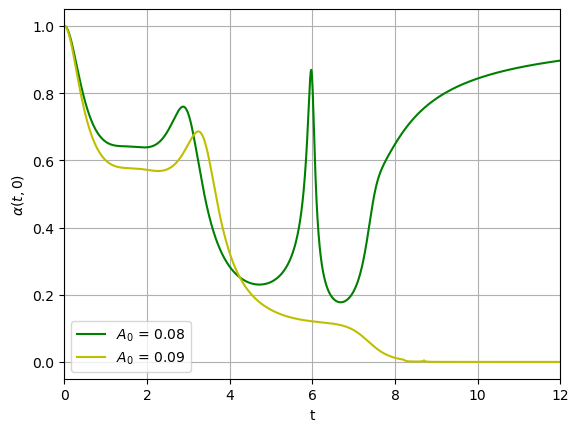

In [26]:
# Searching for critical amplitude:

#Alpha_origin_disp = Alpha_origin
Alpha_origin_collapse = Alpha_origin

plt.plot(t1, Alpha_origin_disp, color = "g", label = f"$A_0$ = 0.08")
plt.plot(t1, Alpha_origin_collapse, color = "y", label = f"$A_0$ = 0.09")
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.xlim(0,12)
plt.grid()
plt.legend()

In [27]:
# Phi origin

#phi_origin_disp = phi_origin
phi_origin_collapse = phi_origin

plt.plot(t1, phi_origin_disp, color = "b", label = f"$A_0$ = 0.08")
plt.plot(t1, phi_origin_collapse, color = "r", label = f"$A_0$ = 0.09")
plt.ylabel("$\phi(t,0)$")
plt.xlabel("t")  
plt.xlim(0, 12)
plt.grid()
plt.legend() 

NameError: name 'phi_origin_disp' is not defined

Text(0.5, 1.0, 'log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $')

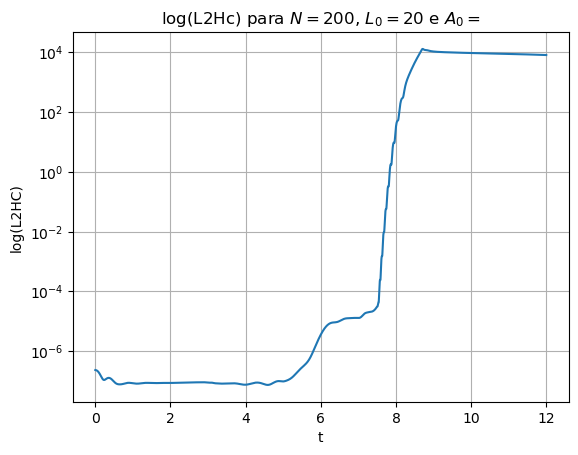

In [32]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")

Text(0.5, 1.0, 'log(L2MC) para $N = 50$, $L_0 = 2$')

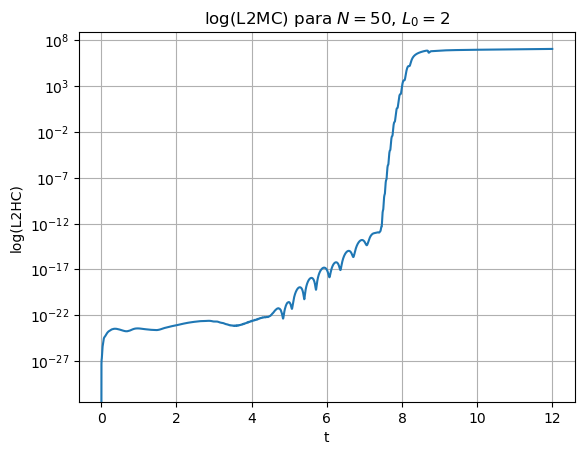

In [33]:
# Erro L2 of momentum constraint

plt.plot(t1,L2MC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2MC) para $N = 50$, $L_0 = 2$")

In [ ]:
# Mass ADM error

plt.plot(t1, Madm_error, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")  
#plt.yscale('log')
#plt.grid()
plt.legend() 

# Maximal slicing results: Dispersion


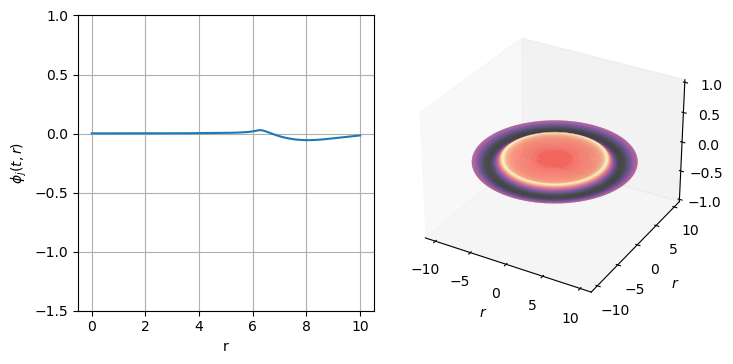

In [17]:
# Plot 3D from scalar field at t = constant: Dispersion case

#phi_set_disp = phi_set

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121, adjustable='box')  # Adjust proportions as needed
ax2 = fig.add_subplot(122, projection='3d')

M = 3000

y = phi_set_disp[75000]   # 7 plots from t = 0, 2, 4, ..., 15
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


#ax2.plot_surface(xn, yn, zn)

ax2.plot_surface(xn, yn, zn, rstride = 5, cstride = 5, cmap = 'magma', edgecolor = 'none')    
ax1.plot(x, y)
ax1.grid()
ax1.set_xlabel('r')
ax1.set_ylabel('$\phi_j(t,r)$')
ax1.set_ylim(-1.5, 1)
ax1.set_box_aspect(1)

ax2.set_xlabel('$r$')
ax2.set_ylabel('$r$')
ax2.set_zlim(-1, 1)





plt.subplots_adjust(wspace=0.1)

ax2.grid(False)
#plt.axis('off')
plt.show()

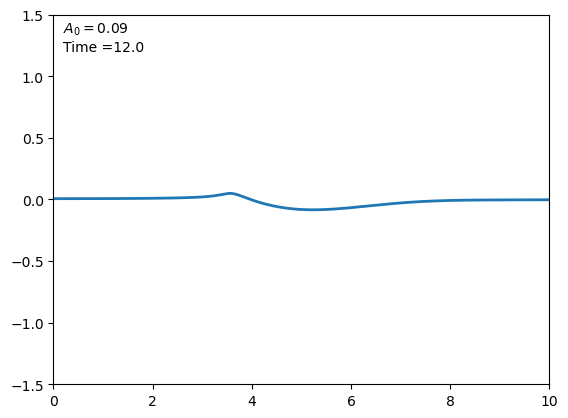

In [123]:
# Animation plot for Phi: Scalar Field dispersion
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl


#fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-1.5, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set_disp[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = 0.08$")
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)


anim.save("animation_MS_dispersion.mp4")
    
        

# Maximal slicing results: Collapse

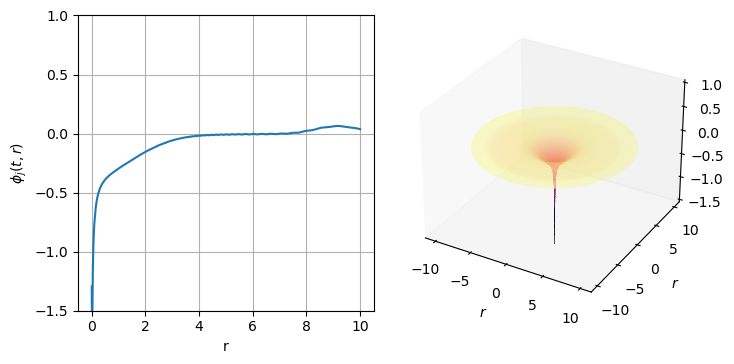

In [31]:
# Plot 3D from scalar field at t = constant: Collapse case

from mpl_toolkits.mplot3d import Axes3D

phi_set_collapse = phi_set

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121, adjustable='box')  # Adjust proportions as needed
ax2 = fig.add_subplot(122,projection='3d')

M = 3000

y = phi_set_collapse[75000] # 7 plots from t = 0, 2, 4, ..., 15
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


#ax2.plot_surface(xn, yn, zn)
ax2.plot_surface(xn, yn, zn, rstride = 5, cstride = 5, cmap = 'magma', edgecolor = 'none')    
ax1.plot(x, y)
ax1.grid()
ax1.set_xlabel('r')
ax1.set_ylim(-1.5, 1)
ax1.set_ylabel('$\phi_j(t,r)$')
#ax1.set_aspect('equal')
ax1.set_box_aspect(1)
ax2.set_xlabel('$r$')
ax2.set_ylabel('$r$')
ax2.set_zlim(-1.5, 1)
#ax2.set_zlabel('$\phi$')



#bbox = ax2.get_position()
#ax1.set_position([bbox.x0, bbox.y0, bbox.width, bbox.height])

plt.subplots_adjust(wspace=0.1)

ax2.grid(False)
#plt.axis('off')
plt.show()

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '800x400', '-pix_fmt', 'rgba', '-r', '5000.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'animation_MS_collapse.mp4']' returned non-zero exit status 255.

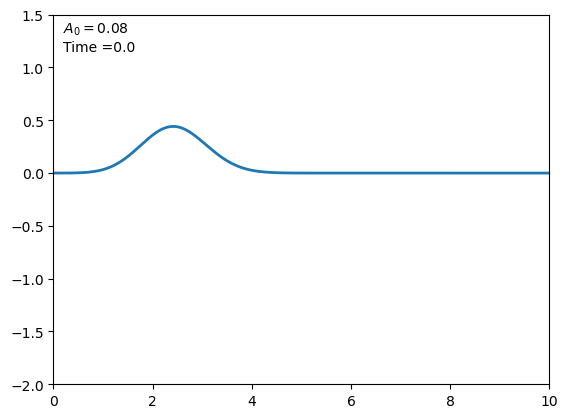

In [29]:
# Animation plot for Phi: Scalar Field collapse
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl


#fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-2, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set_collapse[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = 0.08$")
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

#HTML(anim.to_html5_video())

anim.save("animation_MS_collapse.mp4")

    
